# Prediction of Healthy Bank 

## Callista Ivana Mogie
## 2402225420

In [7]:
# import necessary module/package

## dataset Manipulation Module/package
import pandas as pd
import numpy as np

## Graph module/package|
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

## Model Creation module
from imblearn import under_sampling, over_sampling
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  
from sklearn import tree, svm
import graphviz 

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from ann_visualizer.visualize import ann_viz

## Evaluation Module 
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


# dataset Understanding

### 1. Import dataset and understand dataset

In [17]:
# Import and read dataset
# Get dataset shape
dataset = pd.read_csv("data.csv")
dataset.shape

# there is 6819 dataset with 96 attributes

(6819, 96)

In [9]:
dataset.tail(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6817                                           0.565302                   1   
6818                                           0.565167                   1   

       Equity to Liability  
6817              0.044009  
6818              0.233902  

[2 rows x 96 columns]

In [10]:
dataset.head(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    
1                                            0.51673    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   

    Equity to Liability  
0              0.016469  
1              0.020794  

[2 rows x 96 columns]

In [11]:
# displaying the list of column names

list_of_column_names = list(dataset.columns)
print(list_of_column_names)

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

In [12]:
dataset.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

### 2. Get dataset Correlation, to see connection between attributes

In [13]:
dataset_correlation = dataset.corr()
dataset_correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

### 3. Check If dataset Balance or Not

In [14]:
total_dataset = len(dataset)
bankrupt_dataset = dataset['Bankrupt?'].value_counts()

percentage_bankrupt_true = bankrupt_dataset[1] / total_dataset * 100
percentage_bankrupt_false = bankrupt_dataset[0] / total_dataset * 100

print('total dataset: {0} dataset'.format(total_dataset))
print('Percentage of Bankruptcy dataset: Yes = {0}% and {1}% not Bankruptcy'.format(percentage_bankrupt_true, percentage_bankrupt_false))

total dataset: 6819 dataset
Percentage of Bankruptcy dataset: Yes = 3.2262795131250916% and 96.77372048687491% not Bankruptcy


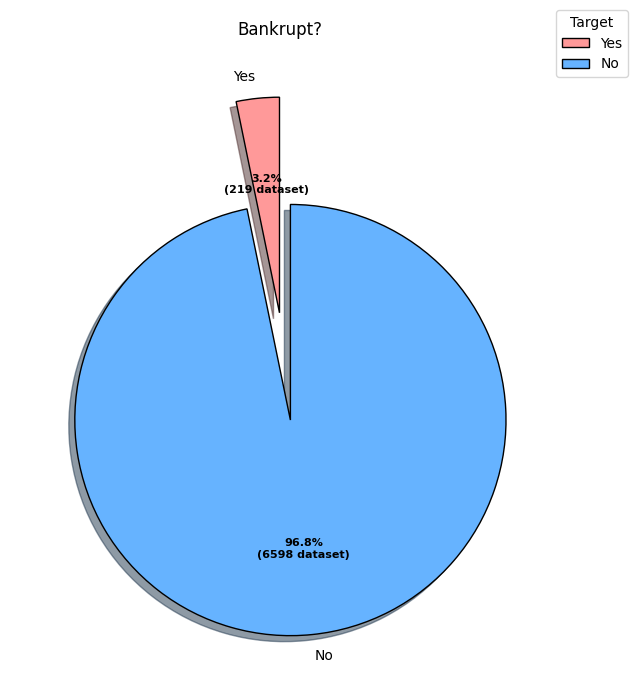

In [15]:
# Creating target
target = ['Yes', 'No']
 
# Creating target value
dataset = [bankrupt_dataset[1], bankrupt_dataset[0]]

# Creating explode dataset
explode = (0.0, 0.5)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# set color
colors = ['#ff9999','#66b3ff']
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} dataset)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(dataset,
                                  colors = colors,
                                  autopct = lambda pct: func(pct, dataset),
                                  explode = explode,
                                  labels = target,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
# Adding legend
ax.legend(wedges, target,
          title ="Target",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Bankrupt?")
 
# show plot
plt.show()

#### Note: Dari chart dapat disimpulkan bahwa, datasetset sangat tidak balance, dimana, dari 6819 terdapat 6598 (96.8%) dataset bank yang tidak bankrut dan hanya terdapat 219 (3.2%) dataset bank yang bangkrut. 

# dataset Preprocessing

## 1. Remove Useless Attributes

In [18]:
columns = [
' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax',
' ROA(B) before interest and depreciation after tax',' Realized Sales Gross Margin', ' Operating Profit Rate',
' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Net Value Per Share (B)', ' Net Value Per Share (A)',
' Net Value Per Share (C)', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
' Per Share Net profit before tax (Yuan ¥)', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate',
' Cash/Total Assets', ' Quick Assets/Current Liability', ' Cash/Current Liability',
' Inventory/Current Liability', ' Liability-Assets Flag', ' Gross Profit to Sales',
' Net Income Flag', ' Current Liability to Equity',
]


dataset = dataset.drop(columns,axis=1)

In [19]:
print(list(dataset.columns))

['Bankrupt?', ' Operating Gross Margin', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Ave

### New Dataset Correlation

In [20]:
dataset_correlation = dataset.corr()
dataset_correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 Operating Gross Margin                             -0.100043   
 Non-industry income and expenditure/revenue        -0.016593   
 Continuous interest rate (after tax)               -0.008395   
 Operating Expense Rate                             -0.006083   
...                                                       ...   
 Net Income to Stockholder's Equity                 -0.180987   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Equity to Liability                                -0.083048   

                                                     Operating Gross Margin  \
Bankrupt?                                                         -0.100043   
 Operating Gross Margin                                            1.000000   
 Non-industry income and expenditure/revenue                       0.051438   
 Continuous interest rate (after tax)                              0.029430   
 Operating Expense Rate                                           -0.206353   
...                                                                     ...   
 Net Income to Stockholder's Equity                                0.075304   
 Liability to Equity                                              -0.085434   
 Degree of Financial Leverage (DFL)                               -0.011806   
 Interest Coverage Ratio (Interest expense to E...                -0.001167   
 Equity to Liability                                               0.120029   

                                                     Non-industry income and expenditure/revenue  \
Bankrupt?                                                                              -0.016593   
 Operating Gross Margin                                                                 0.051438   
 Non-industry income and expenditure/revenue                                            1.000000   
 Continuous interest rate (after tax)                                                  -0.230698   
 Operating Expense Rate                                                                -0.003597   
...                                                                                          ...   
 Net Income to Stockholder's Equity                                                     0.007693   
 Liability to Equity                                                                   -0.011899   
 Degree of Financial Leverage (DFL)                                                    -0.000556   
 Interest Coverage Ratio (Interest expense to E...                                      0.001024   
 Equity to Liability                                                                    0.012293   

                                                     Continuous interest rate (after tax)  \
Bankrupt?                                                                       -0.008395   
 Operating Gross Margin                                                          0.029430   
 Non-industry income and expenditure/revenue                                    -0.230698   
 Continuous interest rate (after tax)                                            1.000000   
 Operating Expense Rate                                                          0.013168   
...                                                                                   ...   
 Net Income to Stockholder's Equity                                              0.011191   
 Liability to Equity                                                            -0.002996   
 Degree of Financial Leverage (DFL)                                              0.000774   
 Interest Coverage Ratio (Interest expense to E...                               0.000798   
 Equity to Liability                                                            -0.011299   

    

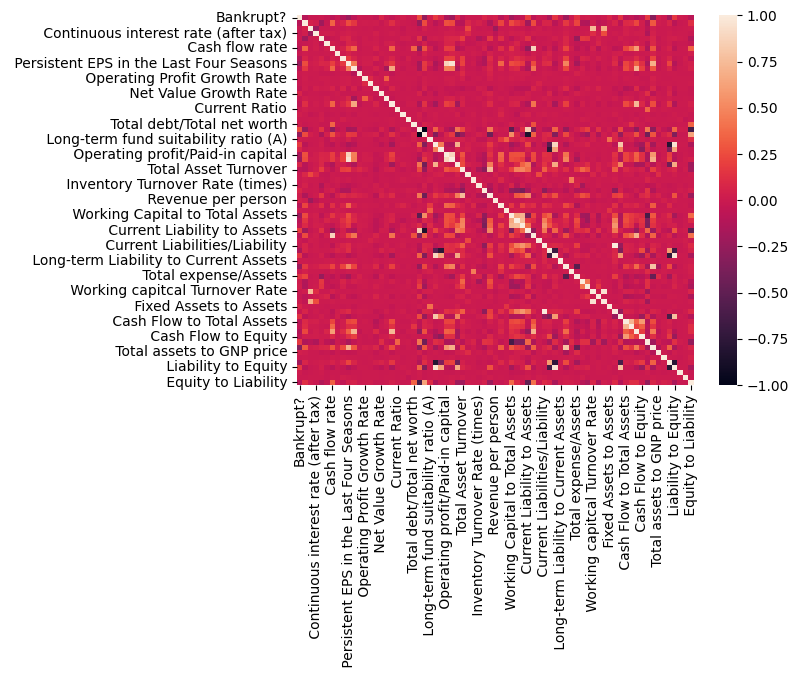

In [21]:
corr = dataset.corr()
sns.heatmap(corr);

<AxesSubplot: >

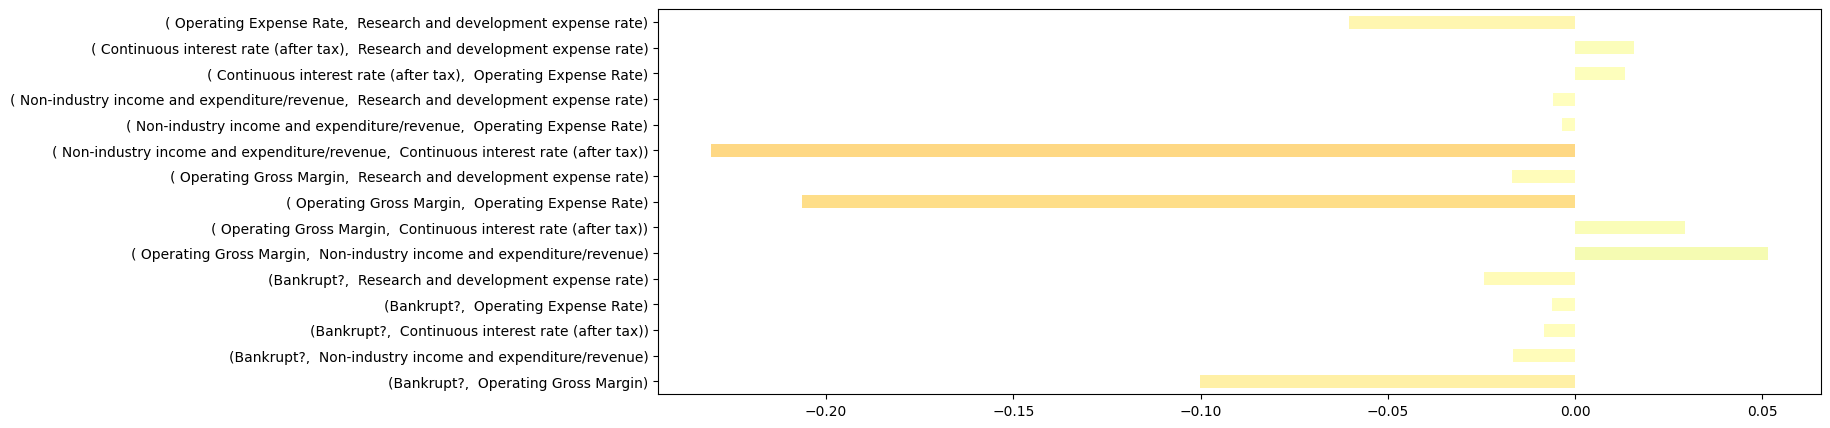

In [22]:
# Because the attributes is too much too handle 
# Choose variable columns manually to get data correlation for each feature and to label

df = dataset
columns=['Bankrupt?',  ' Operating Gross Margin', ' Non-industry income and expenditure/revenue', 
         ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', 
         ]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop)
    return au_corr

corrplot = get_correlations(df[columns])

fig, ax = plt.subplots(figsize =(15,5))

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

corrplot.plot.barh(color=colors) 

In [23]:
df = dataset
df.shape[1]
df[df.columns[0:df.shape[1]]].corr()['Bankrupt?']

Bankrupt?                                              1.000000
 Operating Gross Margin                               -0.100043
 Non-industry income and expenditure/revenue          -0.016593
 Continuous interest rate (after tax)                 -0.008395
 Operating Expense Rate                               -0.006083
                                                         ...   
 Net Income to Stockholder's Equity                   -0.180987
 Liability to Equity                                   0.166812
 Degree of Financial Leverage (DFL)                    0.010508
 Interest Coverage Ratio (Interest expense to EBIT)   -0.005509
 Equity to Liability                                  -0.083048
Name: Bankrupt?, Length: 73, dtype: float64

In [25]:
df_corr = df[df.columns[0:df.shape[1]]].corr()['Bankrupt?']
highest_corr = []
temp = 0.13

# for i in range(len(df_corr)):
#     dict = {df.columns[i]:df_corr[i]}
#     highest_corr.append(dict)
        
for i in range(len(df_corr)):
    if temp < df_corr[i]: 
        dict = {df.columns[i]:df_corr[i]}
        highest_corr.append(dict)

highest_corr

[{'Bankrupt?': 1.0},
 {' Debt ratio %': 0.25016096206661775},
 {' Borrowing dependency': 0.1765429361615994},
 {' Current Liability to Assets': 0.19449443585543952},
 {' Current Liabilities/Equity': 0.1538283619069691},
 {' Total expense/Assets': 0.13904921596620506},
 {' Equity to Long-term Liability': 0.139013572544475},
 {' Current Liability to Current Assets': 0.17130604352180528},
 {' Liability to Equity': 0.16681209778111403}]

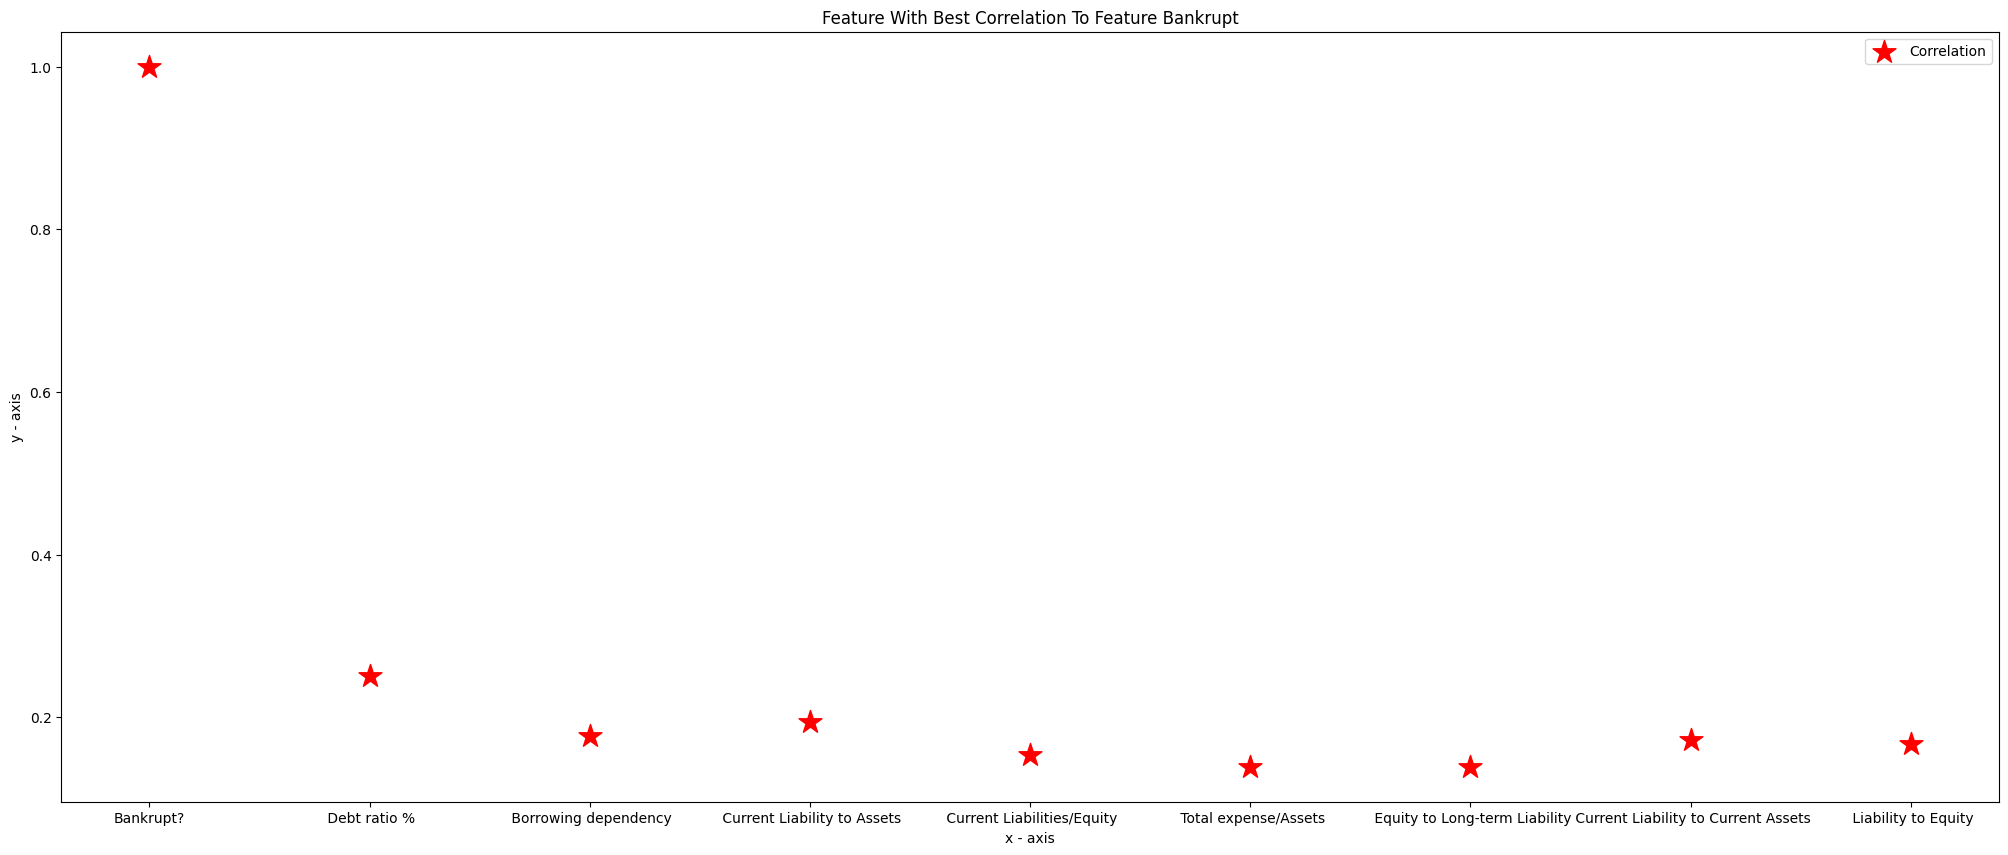

In [27]:
x = []
y = []
temp = 0.13

for i in range(len(df_corr)):
    if temp < df_corr[i]: 
        x.append(df.columns[i])
        y.append(df_corr[i])

# plotting points as a scatter plot
plt.scatter(x, y, label= "Correlation", color= "Red", 
            marker= "*", s=300)
plt.gcf().set_size_inches((25, 10))
  
# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('Feature With Best Correlation To Feature Bankrupt')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()


array([[<AxesSubplot: title={'center': 'Bankrupt?'}>,
        <AxesSubplot: title={'center': ' Operating Gross Margin'}>,
        <AxesSubplot: title={'center': ' Non-industry income and expenditure/revenue'}>,
        <AxesSubplot: title={'center': ' Continuous interest rate (after tax)'}>,
        <AxesSubplot: title={'center': ' Operating Expense Rate'}>,
        <AxesSubplot: title={'center': ' Research and development expense rate'}>,
        <AxesSubplot: title={'center': ' Cash flow rate'}>,
        <AxesSubplot: title={'center': ' Interest-bearing debt interest rate'}>,
        <AxesSubplot: title={'center': ' Tax rate (A)'}>],
       [<AxesSubplot: title={'center': ' Persistent EPS in the Last Four Seasons'}>,
        <AxesSubplot: title={'center': ' Cash Flow Per Share'}>,
        <AxesSubplot: title={'center': ' Realized Sales Gross Profit Growth Rate'}>,
        <AxesSubplot: title={'center': ' Operating Profit Growth Rate'}>,
        <AxesSubplot: title={'center': ' Contin

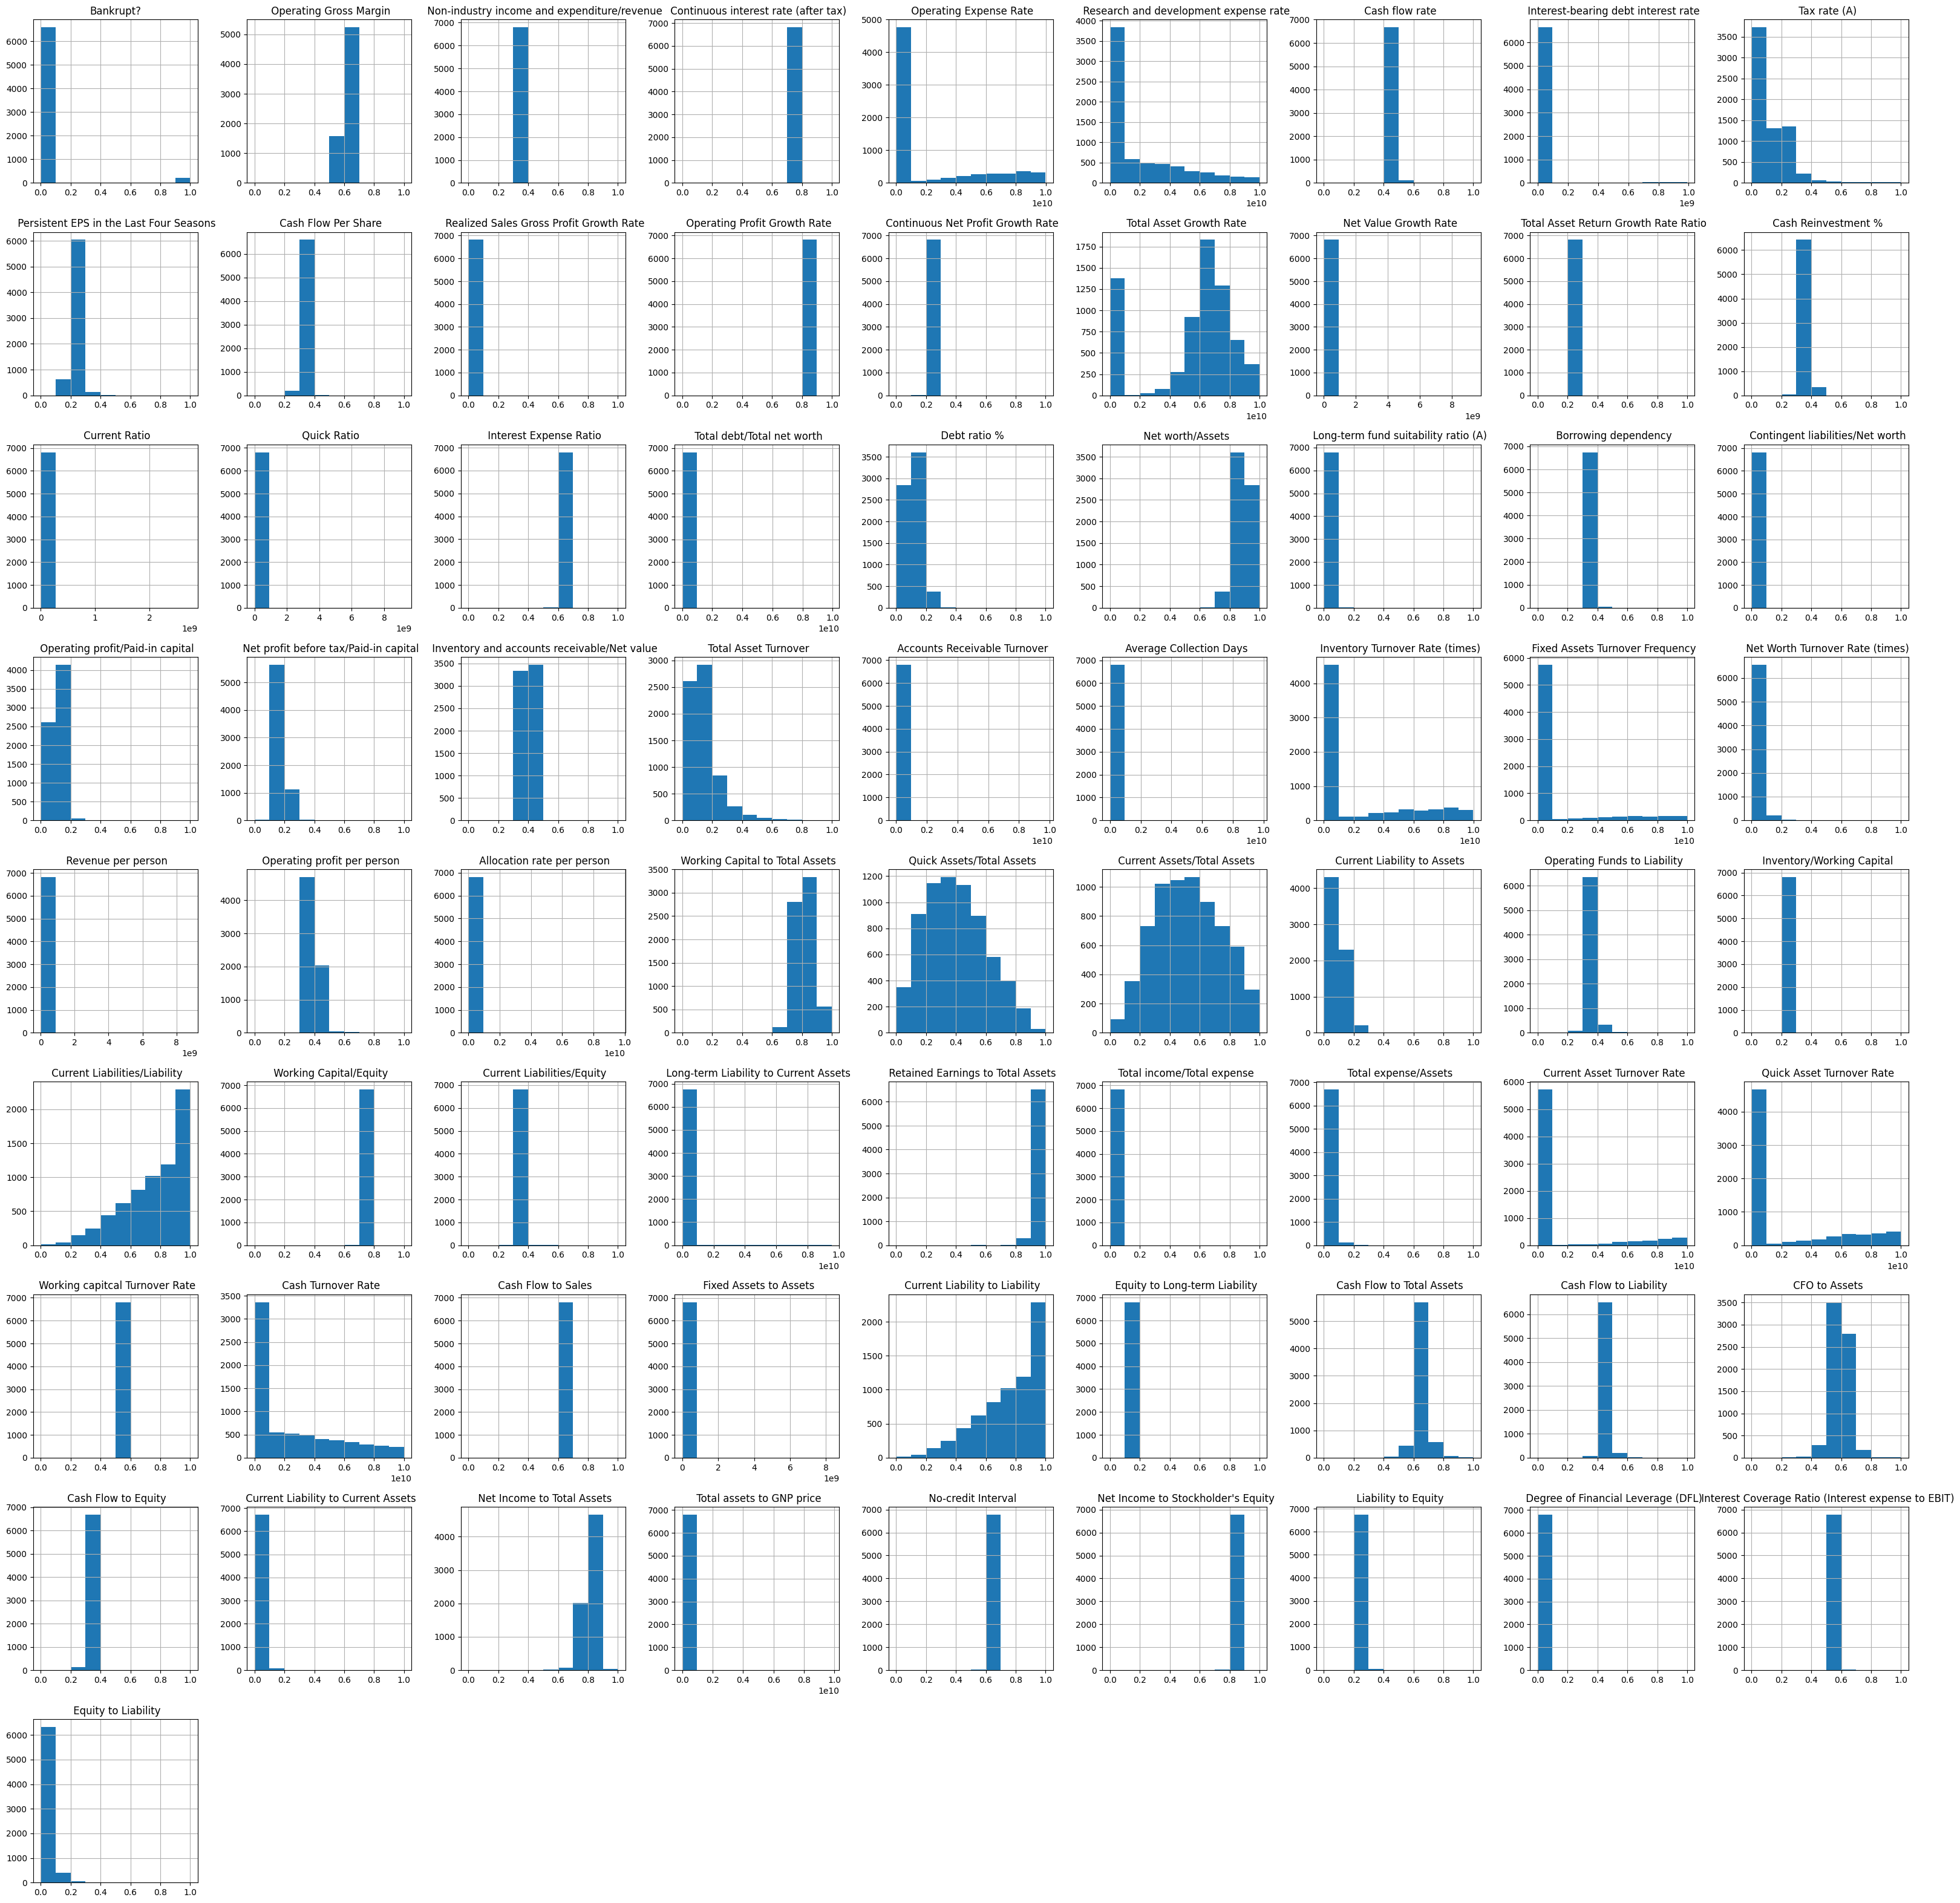

In [28]:
dataset.hist(figsize = (40,40))

## 2. Remove Null Values

In [29]:
dataset.isnull().sum()

Bankrupt?                                              0
 Operating Gross Margin                                0
 Non-industry income and expenditure/revenue           0
 Continuous interest rate (after tax)                  0
 Operating Expense Rate                                0
                                                      ..
 Net Income to Stockholder's Equity                    0
 Liability to Equity                                   0
 Degree of Financial Leverage (DFL)                    0
 Interest Coverage Ratio (Interest expense to EBIT)    0
 Equity to Liability                                   0
Length: 73, dtype: int64

In [30]:
dataset.isnull().any()

Bankrupt?                                              False
 Operating Gross Margin                                False
 Non-industry income and expenditure/revenue           False
 Continuous interest rate (after tax)                  False
 Operating Expense Rate                                False
                                                       ...  
 Net Income to Stockholder's Equity                    False
 Liability to Equity                                   False
 Degree of Financial Leverage (DFL)                    False
 Interest Coverage Ratio (Interest expense to EBIT)    False
 Equity to Liability                                   False
Length: 73, dtype: bool

<AxesSubplot: >

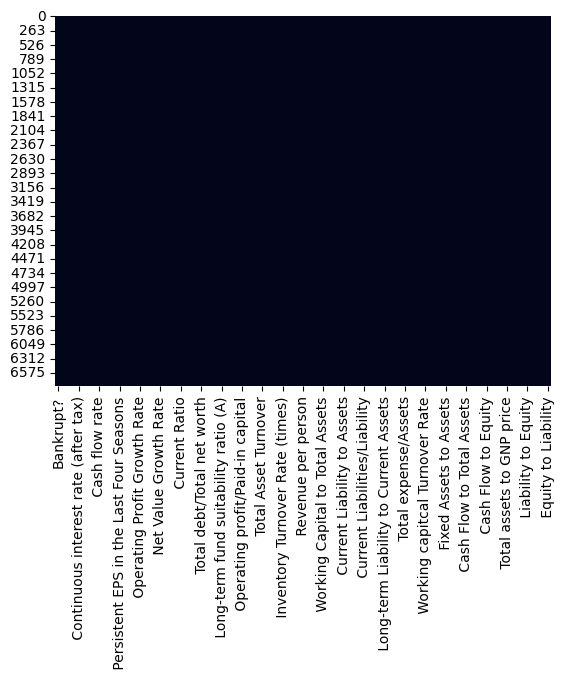

In [31]:
sns.heatmap(dataset.isnull(), cbar=False)

## Dataset Tidak Null, Akan tetapi terdapat incosistensi penulisan dataset
## Sehingga dilakukan perbaikan terhadap inconsistensi dataset

### Dataset dengan penulisan inconesitency yang pertama adalah tax rate (A)

In [32]:
dataset[' Tax rate (A)'].value_counts()

0.000000    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

In [33]:
std = dataset[' Tax rate (A)'].std()
std

0.13866749672835132

In [34]:
# define list
dataset[' Tax rate (A)'] = dataset[' Tax rate (A)']
  
for i in range(len(dataset[' Tax rate (A)'])):
    if dataset[' Tax rate (A)'][i] == 0.0:
        dataset[' Tax rate (A)'][i] = std
        
# print list
dataset[' Tax rate (A)'].value_counts()


C:\Users\User\AppData\Local\Temp\ipykernel_200\2692420800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Tax rate (A)'][i] = std


0.138667    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

#### Dataset dengan inconsistency yang kedua adalah Long-term liability to current assets

In [35]:
dataset[' Long-term Liability to Current Assets'].value_counts()

0.000000e+00    2569
5.790000e+08       2
2.790000e+08       2
2.559237e-02       1
2.268326e-02       1
                ... 
3.255339e-03       1
2.278838e-03       1
3.893648e-03       1
1.029732e-03       1
3.200000e+09       1
Name:  Long-term Liability to Current Assets, Length: 4249, dtype: int64

In [36]:
# for i in dataset[' Long-term Liability to Current Assets']:
#     print(i)

In [37]:
def converting_number(number): 
    len_number = len(number) - 2
    float_number = int(len_number) * '0'
    float_number = '10' + float_number
    int_number = int(float(number))
    x = int_number * (1 / int(float_number))
    return x

In [38]:
dataset[' Long-term Liability to Current Assets'] = dataset[' Long-term Liability to Current Assets']

for i in range(len(dataset[' Long-term Liability to Current Assets'])):
    if str(dataset[' Long-term Liability to Current Assets'][i]).startswith('0') == False:
        temp = dataset[' Long-term Liability to Current Assets'][i]
        dataset[' Long-term Liability to Current Assets'][i] = converting_number(str(temp))

C:\Users\User\AppData\Local\Temp\ipykernel_200\3840535893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Long-term Liability to Current Assets'][i] = converting_number(str(temp))


In [39]:
std = dataset[' Long-term Liability to Current Assets'].std()
std

0.016903218472478467

In [40]:
for i in range(len(dataset[' Long-term Liability to Current Assets'])):
    if dataset[' Long-term Liability to Current Assets'][i] == 0.0:
        dataset[' Long-term Liability to Current Assets'][i] = std
        
# print list
dataset[' Tax rate (A)'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_200\3861313832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Long-term Liability to Current Assets'][i] = std


0.138667    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

#### Dataset dengan inconsistency yang ketiga adalah Operating Expense Rate

In [41]:
dataset[' Operating Expense Rate'].value_counts()

5.530000e+09    10
9.860000e+09    10
1.716046e-04    10
8.480000e+09     9
4.720000e+09     9
                ..
1.546985e-03     1
7.916474e-04     1
3.529226e-04     1
2.622636e-04     1
1.431695e-03     1
Name:  Operating Expense Rate, Length: 2966, dtype: int64

In [42]:
# for i in dataset[' Operating Expense Rate']:
#     print(i)

In [43]:
dataset[' Operating Expense Rate'] = dataset[' Operating Expense Rate']

for i in range(len(dataset[' Operating Expense Rate'])):
    if str(dataset[' Operating Expense Rate'][i]).startswith('0') == False:
        temp = dataset[' Operating Expense Rate'][i]
        dataset[' Operating Expense Rate'][i] = converting_number(str(temp))


C:\Users\User\AppData\Local\Temp\ipykernel_200\2079548125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Operating Expense Rate'][i] = converting_number(str(temp))


In [44]:
dataset[' Operating Expense Rate'].value_counts()

0.098600    10
0.000172    10
0.055300    10
0.047200     9
0.084000     9
            ..
0.000349     1
0.000370     1
0.000121     1
0.000470     1
0.001432     1
Name:  Operating Expense Rate, Length: 2964, dtype: int64

#### Note: Tidak terdapat Null Values pada datasetset, sehingga step ini langsung selesai 

### 3. Balancing dataset

In [45]:
x= dataset.drop('Bankrupt?', axis=1) 
x

Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                    0.601457                                      0.302646   
1                    0.610235                                      0.303556   
2                    0.601450                                      0.302035   
3                    0.583541                                      0.303350   
4                    0.598783                                      0.303475   
...                       ...                                           ...   
6814                 0.604455                                      0.303510   
6815                 0.598308                                      0.303520   
6816                 0.610444                                      0.303512   
6817                 0.607850                                      0.303498   
6818                 0.627409                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
0                                  0.780985                 0.000126   
1                                  0.781506                 0.000290   
2                                  0.780284                 0.000236   
3                                  0.781241                 0.000108   
4                                  0.781550                 0.078900   
...                                     ...                      ...   
6814                               0.781588                 0.000151   
6815                               0.781586                 0.052200   
6816                               0.781546                 0.000251   
6817                               0.781663                 0.000124   
6818                               0.786079                 0.001432   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.138667   
1                             6.470647e-04       0.138667   
2                             7.900790e-04       0.138667   
3                             4.490449e-04       0.138667   
4                             6.860686e-04       0.138667   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.138667   

       Persistent EPS in the Last Four Seasons   Cash Flow Per Share  ...  \
0                                     0.169141              0.311664  ...   
1                                     0.208944              0.318137  ...   
2                                     0.180581              0.307102  ...   
3                                     0.193722              0.321674  ...   
4                                     0.212537              0.319162  ...   
...                                        ...                   ...  ...   
6814                                  0.216602              0.320966  ...   
6815                                  0.216697              0.3

In [46]:
y = dataset['Bankrupt?']
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [47]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state= None) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5455, 72), (1364, 72), (5455,), (1364,))

In [48]:
y_train.value_counts()

0    5293
1     162
Name: Bankrupt?, dtype: int64

### A. Oversampling with random sampling

In [49]:
# Define random over sampling to var ros
ros = over_sampling.RandomOverSampler(random_state = 0)
ros

RandomOverSampler(random_state=0)

### Oversampling training dataset

In [50]:
y_train.value_counts()

0    5293
1     162
Name: Bankrupt?, dtype: int64

In [51]:
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
y_train_ros.value_counts()

0    5293
1    5293
Name: Bankrupt?, dtype: int64

### Oversampling Test Dataset

In [52]:
y_test.value_counts()

0    1306
1      58
Name: Bankrupt?, dtype: int64

In [53]:
x_test_ros, y_test_ros = ros.fit_resample(x_test, y_test)
y_test_ros.value_counts()

0    1306
1    1306
Name: Bankrupt?, dtype: int64

### B. Oversampling with SMOTE method

In [54]:
sm = over_sampling.SMOTE()
sm

SMOTE()

### Oversampling Training Dataset

In [55]:
y_train.value_counts()

0    5293
1     162
Name: Bankrupt?, dtype: int64

In [56]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
y_train_sm.value_counts()

0    5293
1    5293
Name: Bankrupt?, dtype: int64

### Oversampling Testing Dataset

In [57]:
y_test.value_counts()

0    1306
1      58
Name: Bankrupt?, dtype: int64

In [58]:
x_test_sm, y_test_sm = sm.fit_resample(x_test, y_test)
y_test_sm.value_counts()

0    1306
1    1306
Name: Bankrupt?, dtype: int64

### 4. Model Creation

### A. Without Balancing datasetset

In [59]:
classifier= RandomForestClassifier(n_estimators = 20, criterion="entropy", max_features= 8, max_depth = None)  
classifier= classifier.fit(x_train, y_train) 
classifier

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)

In [60]:
y_pred= classifier.predict(x_test) 

In [61]:
confusion_matrix, classification_report
print(classifier)
print(accuracy_score(y_test, y_pred))

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)
0.9618768328445748


#### Note: Disini saya mencoba membuat model tanpa melakukan balancing datasetset, dan terlihat bahwa akurasinya mencapai 0.97 

#### Akan tetapi dikarenakan datasetset yang tidak balance, maka walaupun akurasinya tinggi tetapi model tersebut tidak lah baik, karena kemungkinan untuk terjadi OVERFITTING sangat tinggi.

#### OVERFITTING sangat mungkin terjadi karena kemungkinan besar model hanya bisa mengenali bank yang tidak bangkrut saja

### B. With OVERSAMPLING method RANDOM SAMPLING

#### B(a). Random Forest Algorithm

In [65]:
classifier= RandomForestClassifier(n_estimators = 78, criterion="entropy", max_features= 73, max_depth = None)
classifier

RandomForestClassifier(criterion='entropy', max_features=73, n_estimators=78)

In [66]:
classifier_ros= classifier.fit(x_train_ros, y_train_ros) 
classifier_ros

RandomForestClassifier(criterion='entropy', max_features=73, n_estimators=78)

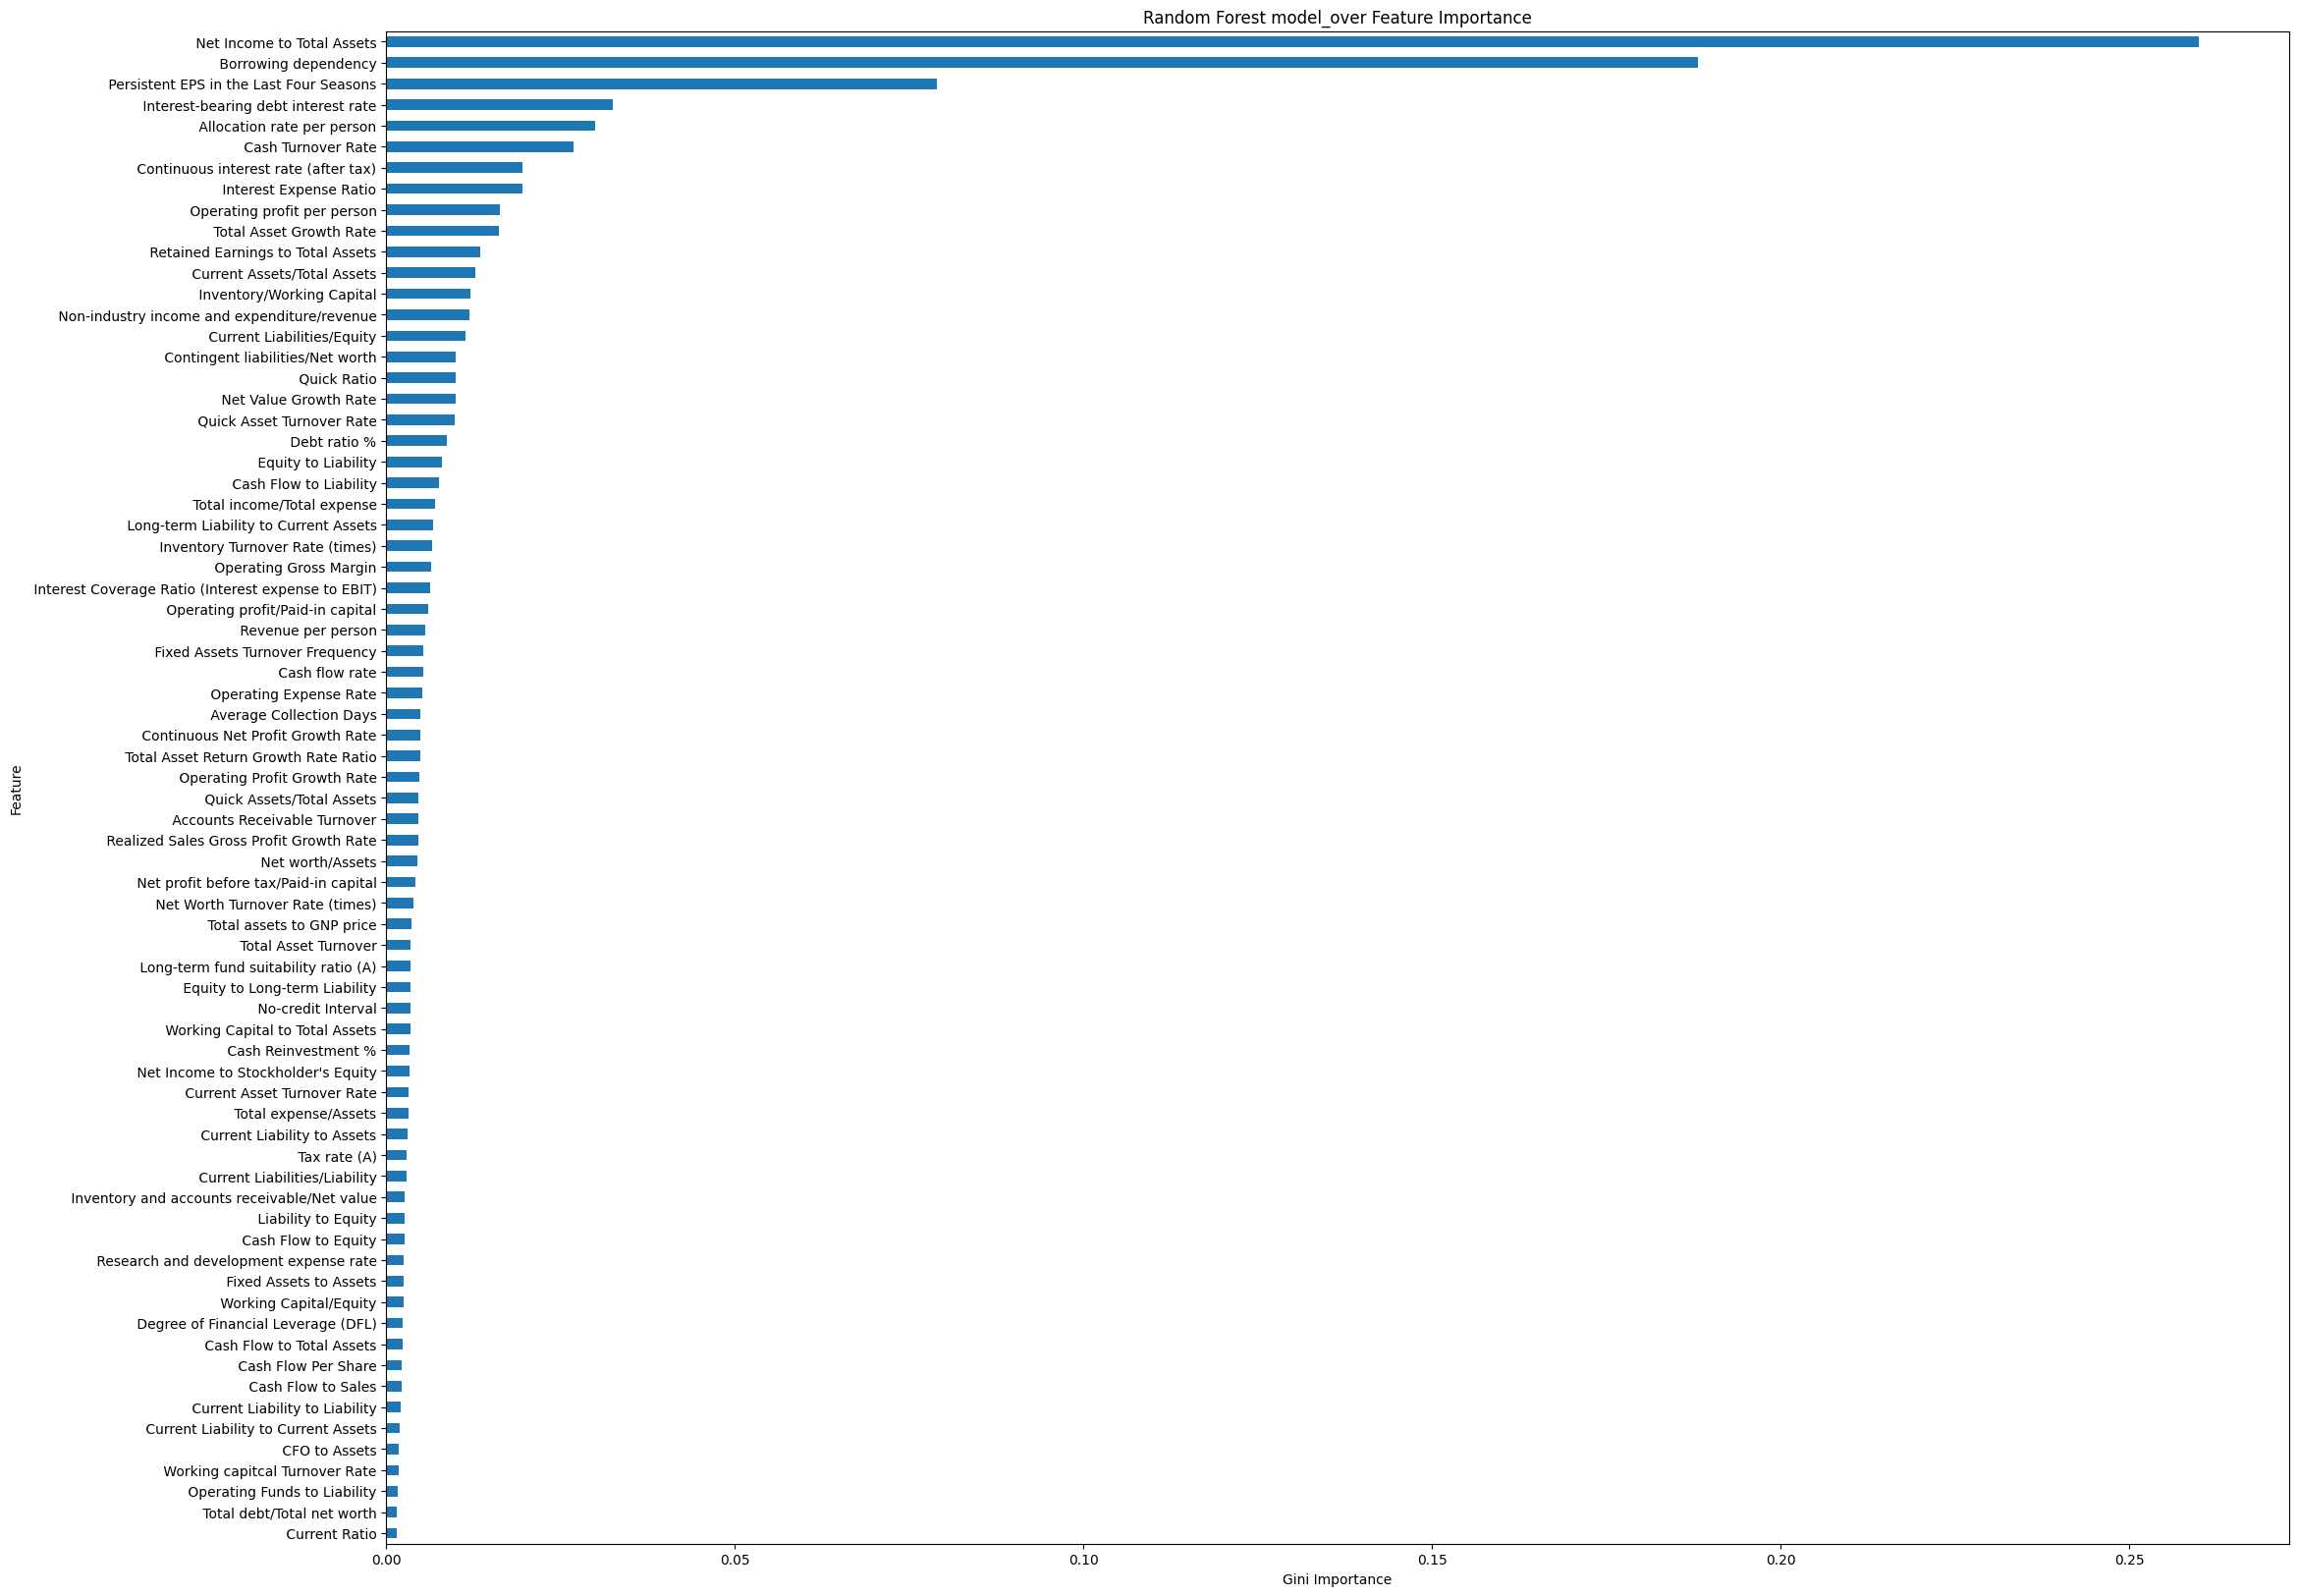

In [67]:
# sorted_idx = classifier_ros.feature_importances_.argsort()
# plt.barh(df.columns[sorted_idx], classifier_ros.feature_importances_[sorted_idx])
# plt.gcf().set_size_inches((25, 20))
# plt.xlabel("Random Forest Feature Importance")

importances = classifier_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Model Evaluation

In [68]:
# Model Accuracy
y_pred= classifier_ros.predict(x_test_ros) 
print(classifier_ros)
print(accuracy_score(y_test_ros, y_pred))

RandomForestClassifier(criterion='entropy', max_features=73, n_estimators=78)
0.6684532924961715


In [69]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1290,   16],
       [ 850,  456]], dtype=int64)

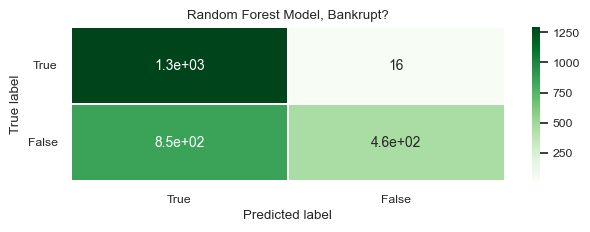

In [70]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [71]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      1306
           1       0.97      0.35      0.51      1306

    accuracy                           0.67      2612
   macro avg       0.78      0.67      0.63      2612
weighted avg       0.78      0.67      0.63      2612



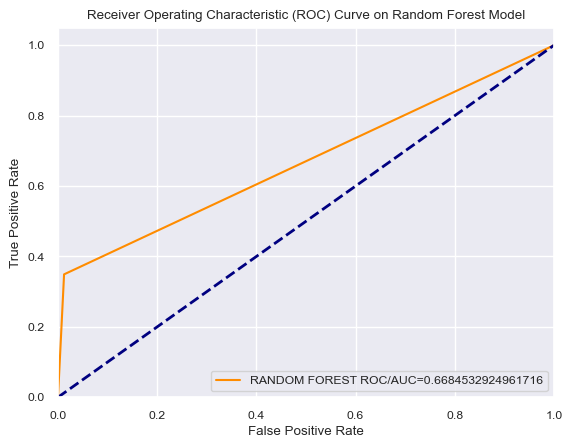

In [72]:
fpr_random_forest, tpr_random_forest, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_random_forest = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_random_forest,tpr_random_forest,label="RANDOM FOREST ROC/AUC="+str(auc_random_forest),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(b). Decision Tree Algorithm

[Text(0.6433823529411765, 0.99, 'X[64] <= 0.802\ngini = 0.5\nsamples = 10586\nvalue = [5293, 5293]'),
 Text(0.41911764705882354, 0.97, 'X[21] <= 0.157\ngini = 0.381\nsamples = 6578\nvalue = [1686, 4892]'),
 Text(0.24019607843137256, 0.95, 'X[8] <= 0.202\ngini = 0.498\nsamples = 2344\nvalue = [1253, 1091]'),
 Text(0.13725490196078433, 0.93, 'X[46] <= 0.328\ngini = 0.391\nsamples = 1045\nvalue = [279, 766]'),
 Text(0.09803921568627451, 0.91, 'X[60] <= 0.134\ngini = 0.425\nsamples = 121\nvalue = [84, 37]'),
 Text(0.0784313725490196, 0.89, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.11764705882352941, 0.89, 'gini = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.17647058823529413, 0.91, 'X[46] <= 0.333\ngini = 0.333\nsamples = 924\nvalue = [195, 729]'),
 Text(0.1568627450980392, 0.89, 'X[52] <= 0.0\ngini = 0.301\nsamples = 894\nvalue = [165, 729]'),
 Text(0.13725490196078433, 0.87, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.17647058823529413, 0.87, 'X[44] <= 0.989\ngini 

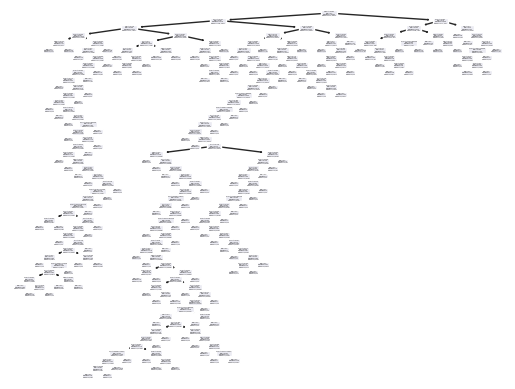

In [73]:
clf = tree.DecisionTreeClassifier()
clf_ros = clf.fit(x_train_ros, y_train_ros)
tree.plot_tree(clf_ros)

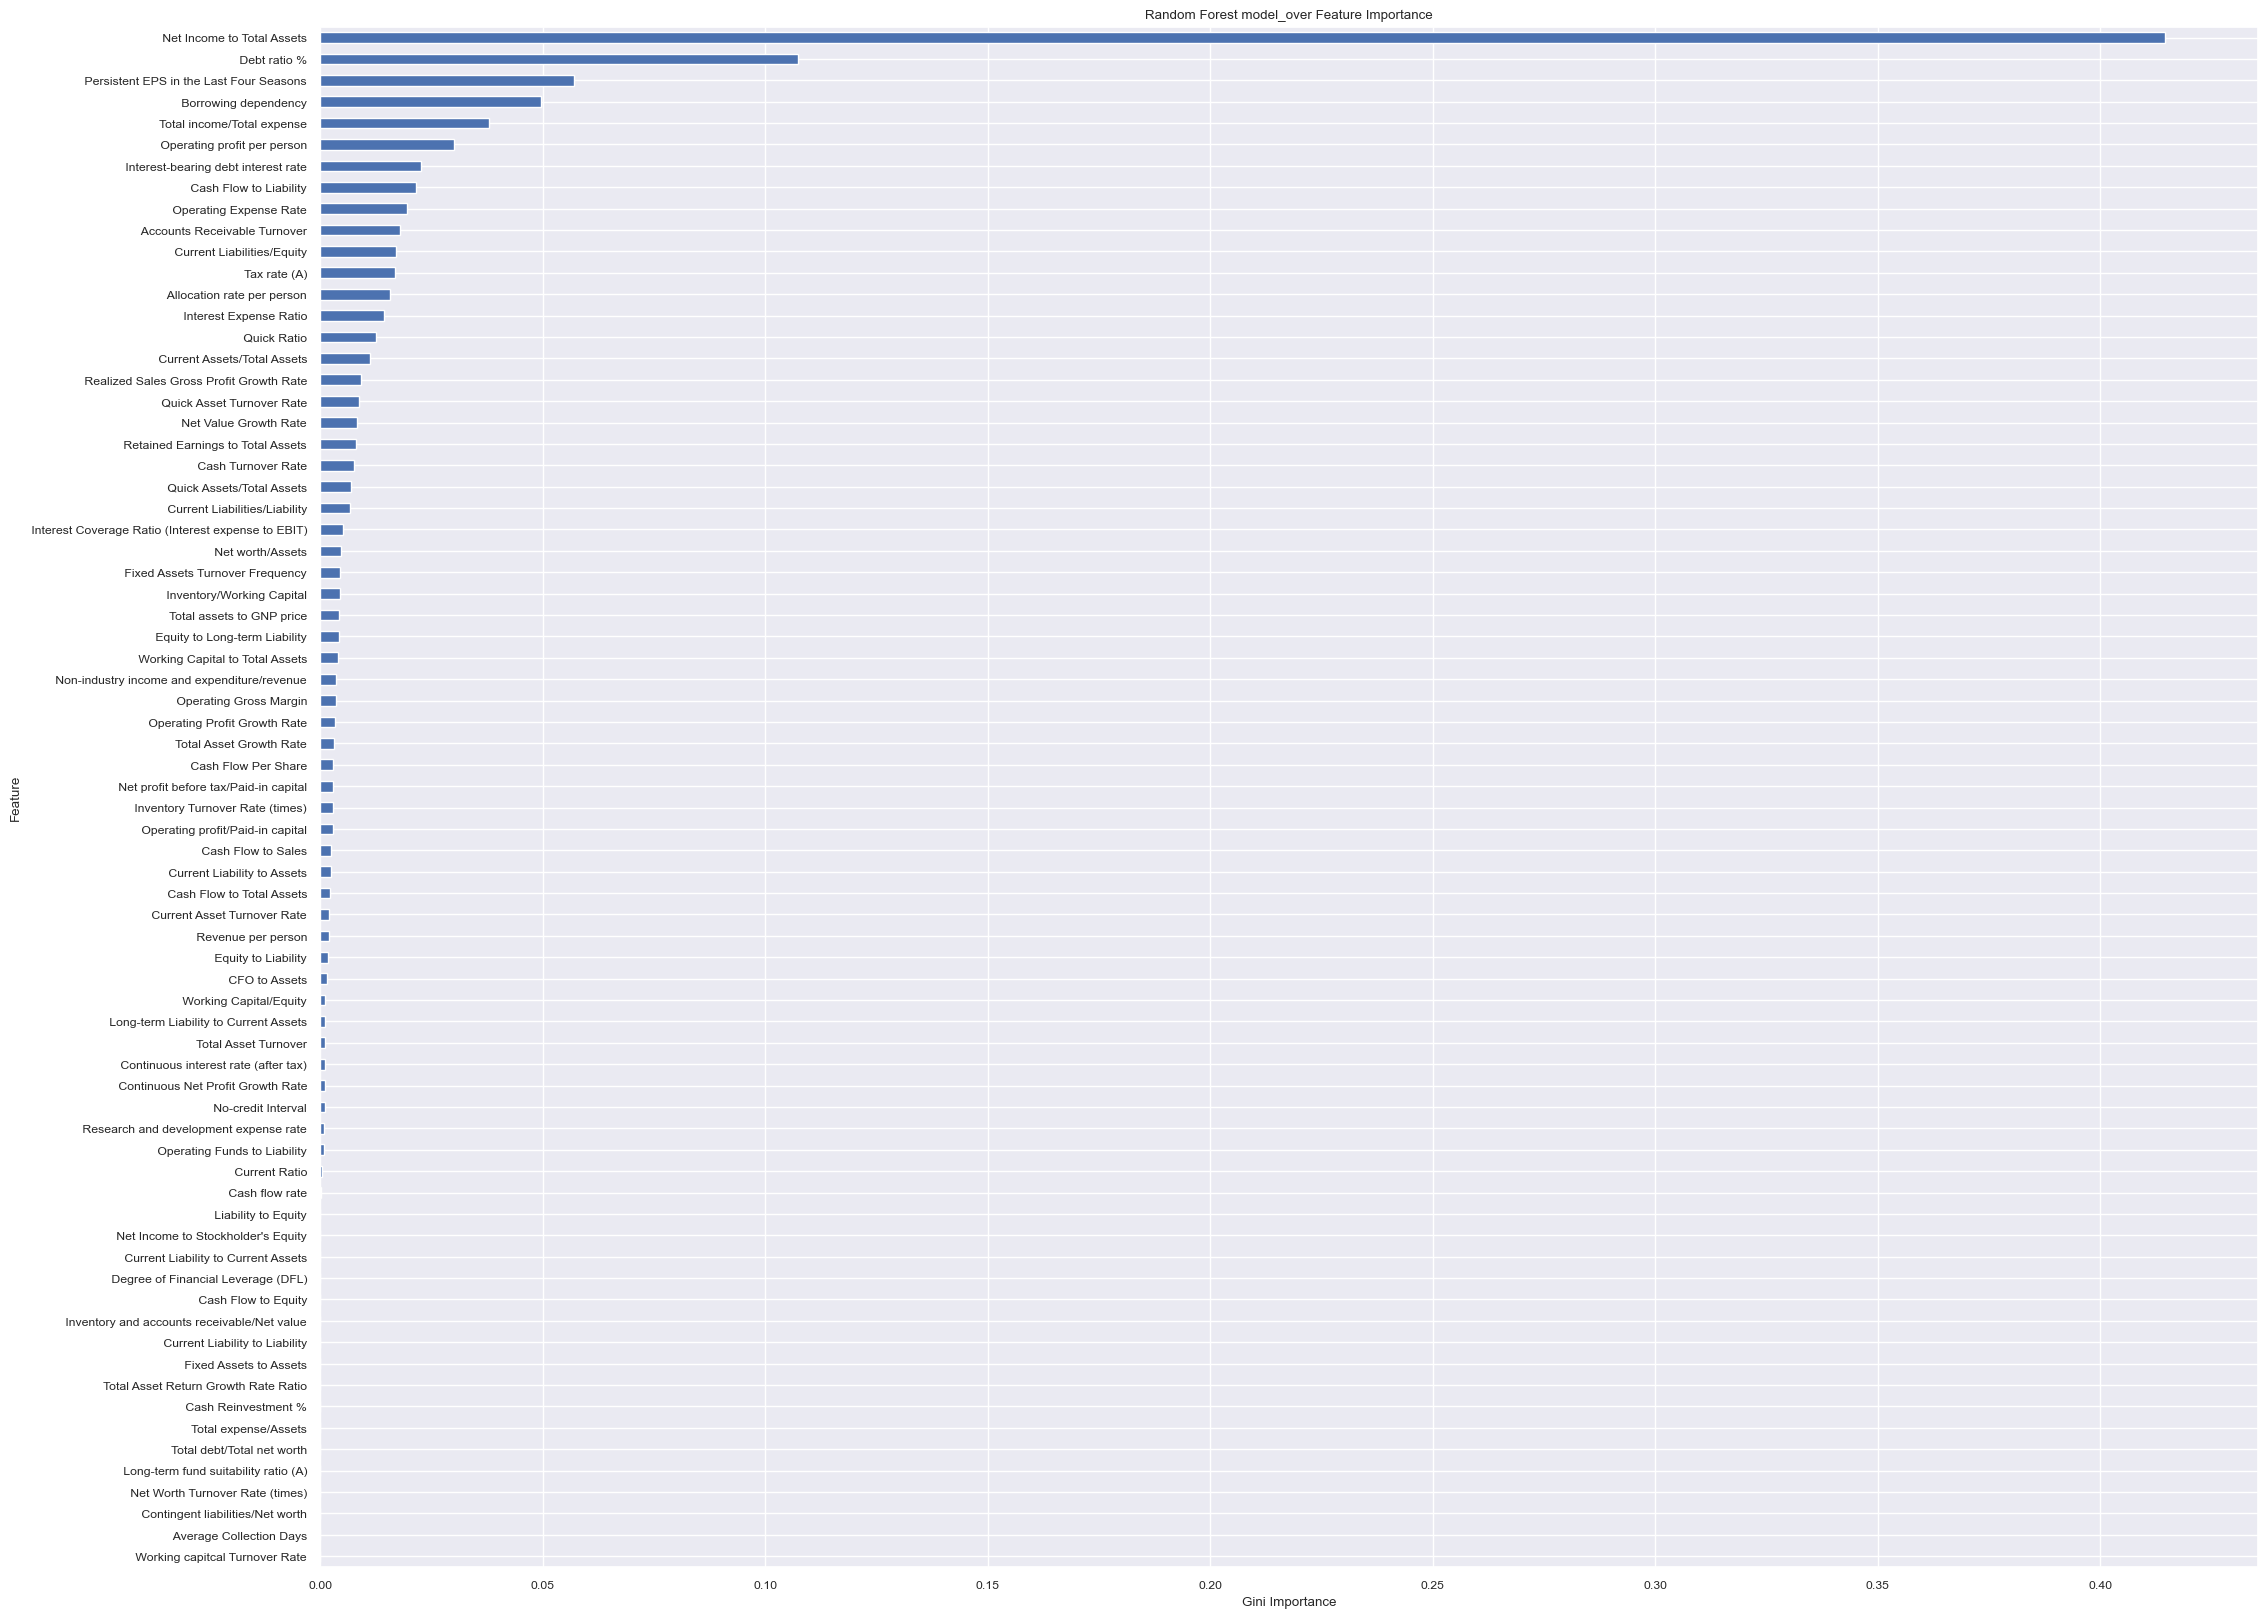

In [74]:
importances = clf_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Decision Tree Model Evaluation

In [75]:
y_pred= clf_ros.predict(x_test_ros) 
print(clf_ros)
print(accuracy_score(y_test_ros, y_pred))

DecisionTreeClassifier()
0.6183001531393568


In [76]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1281,   25],
       [ 972,  334]], dtype=int64)

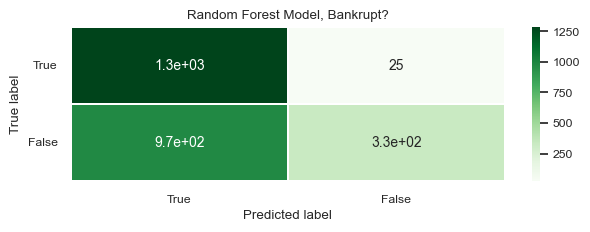

In [77]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [78]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72      1306
           1       0.93      0.26      0.40      1306

    accuracy                           0.62      2612
   macro avg       0.75      0.62      0.56      2612
weighted avg       0.75      0.62      0.56      2612



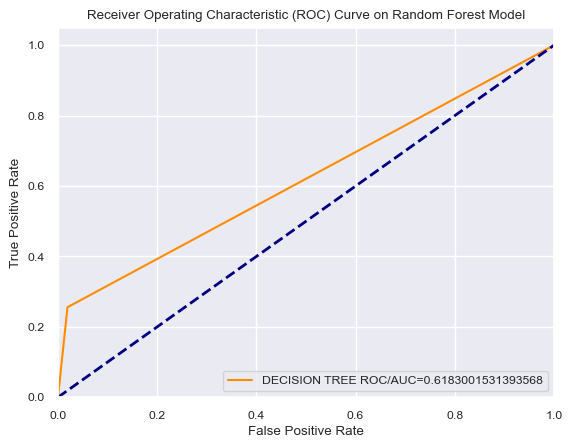

In [79]:
fpr_decision_tree, tpr_decision_tree, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_decision_tree = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_decision_tree,tpr_decision_tree,label="DECISION TREE ROC/AUC="+str(auc_decision_tree),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### From the Features Importances Random Forest and Decision Tree Algorithm 

### Fitur - fitur yang paling berpengaruh dalam bangkrut atau tidak-nya bank adalah sebagai berikut

### 1x Fitur yang pertama adalah fitur Net Income To Total Assets

Text(0.5, 1.0, 'Relationship between bankrupt events and Debt ratio %')

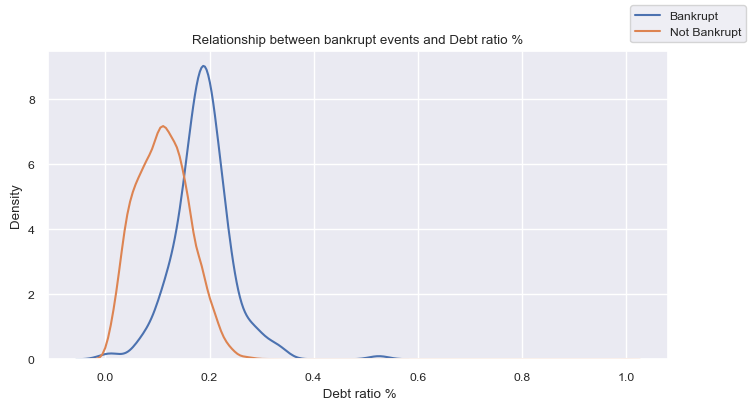

In [80]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Debt ratio %'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Debt ratio %'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Debt ratio %')

### 2x. Fitur yang ke-dua adalah fitur Equity to Liability

Text(0.5, 1.0, 'Relationship between bankrupt events and Borrowing dependency')

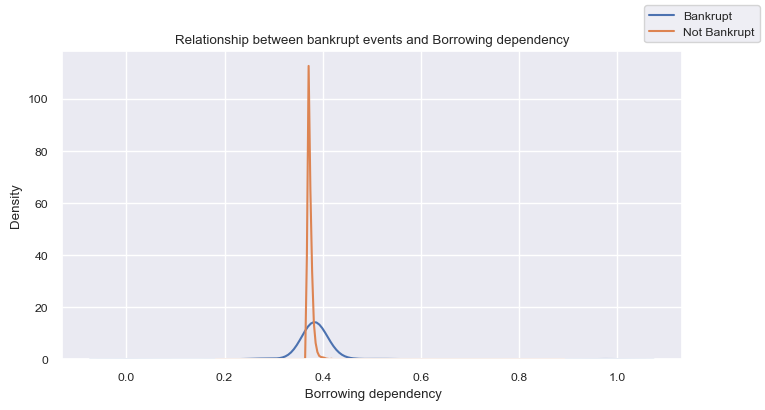

In [81]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Borrowing dependency'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Borrowing dependency'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Borrowing dependency')

### 3x. Fitur yang ke-tiga adalah fitur Continuous interest rate (after tax)

Text(0.5, 1.0, 'Relationship between bankrupt events and Current Liabilities/Equity')

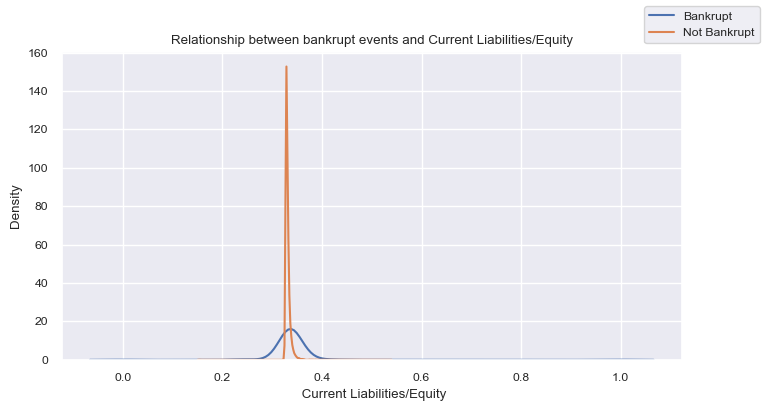

In [82]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Current Liabilities/Equity'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Current Liabilities/Equity'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Current Liabilities/Equity')

### 4x. Fitur yang ke empat adalah fitur Total debt/Total net worth

Text(0.5, 1.0, 'Relationship between bankrupt events and Total expense/Assets')

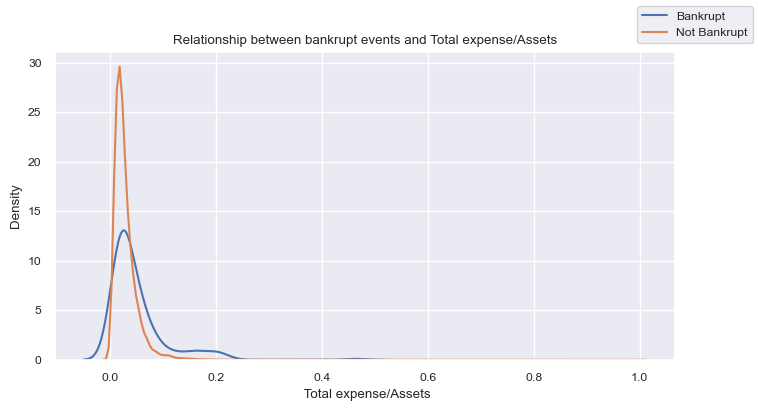

In [83]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Total expense/Assets'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Total expense/Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total expense/Assets')

### 5x. Fitur yang ke-lima adalah Debt Ratio

Text(0.5, 1.0, 'Relationship between bankrupt events and Equity to Long-term Liability')

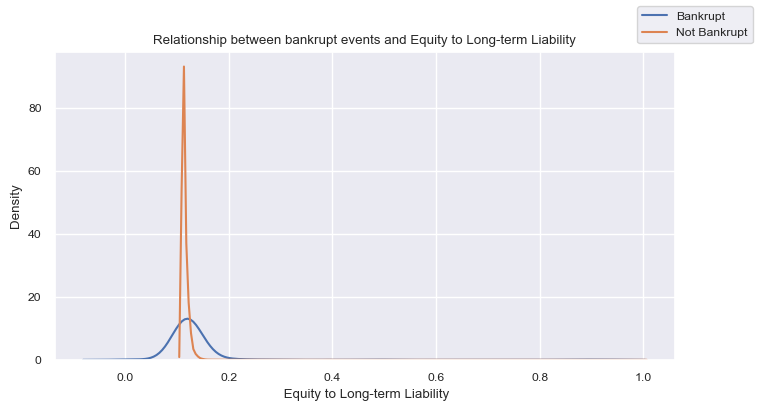

In [84]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Equity to Long-term Liability'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Equity to Long-term Liability'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Equity to Long-term Liability')

Text(0.5, 1.0, 'Relationship between bankrupt events and Current Liability to Current Assets')

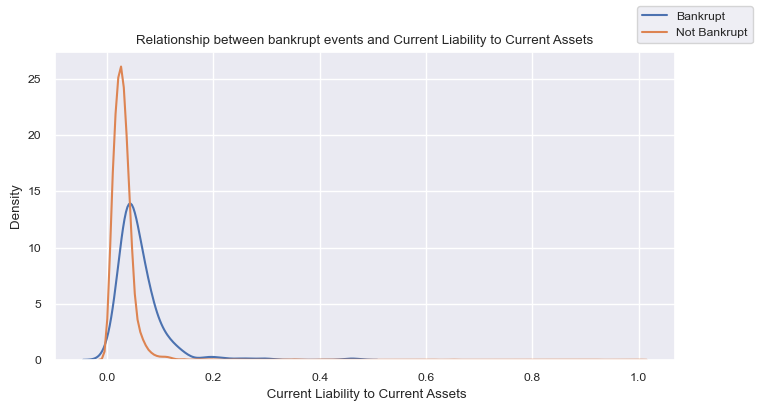

In [85]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Current Liability to Current Assets'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Current Liability to Current Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Current Liability to Current Assets')

Text(0.5, 1.0, 'Relationship between bankrupt events and Liability to Equity')

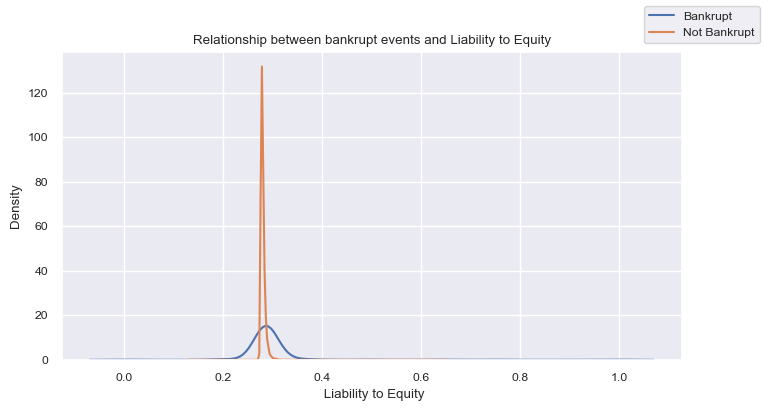

In [86]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Liability to Equity'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Liability to Equity'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Liability to Equity')

### B(c). Support Vectore Machine (SVM) Algorithm

#### Used Support Vectore Classifier

In [87]:
svmC = svm.SVC()
svm_ros = svmC.fit(x_train_ros, y_train_ros)

In [88]:
y_pred= svm_ros.predict(x_test_ros) 
print(svm_ros)
print(accuracy_score(y_test_ros, y_pred))

SVC()
0.6470137825421133


### Support Vector Machine Classifier Model Evaluation

In [89]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[960, 346],
       [576, 730]], dtype=int64)

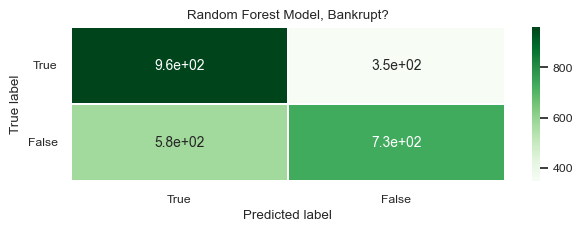

In [90]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [91]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68      1306
           1       0.68      0.56      0.61      1306

    accuracy                           0.65      2612
   macro avg       0.65      0.65      0.64      2612
weighted avg       0.65      0.65      0.64      2612



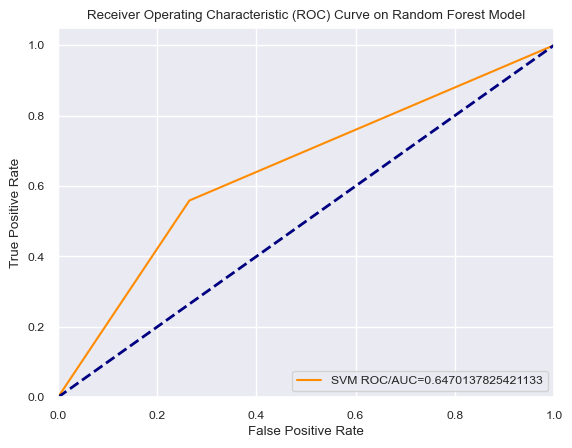

In [92]:
fpr_svmc, tpr_svmc, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_svmc = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_svmc,tpr_svmc,label="SVM ROC/AUC="+str(auc_svmc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

#### Used Support Vector Regression

In [93]:
svmR = svm.SVR()
svm_ros = svmR.fit(x_train_ros, y_train_ros)

In [94]:
y_pred= svm_ros.predict(x_test_ros) 
print(svm_ros)
print('Regression Max Error: {0}'.format(mt.max_error(y_test_ros, y_pred)))
print('Mean Squared Error (MSE): {0}'.format(mt.mean_squared_error(y_test_ros, y_pred)))
print('Mean Absolute Error (MAE): {0}'.format(mt.mean_absolute_error(y_test_ros, y_pred)))

SVR()
Regression Max Error: 1.4995565532656672
Mean Squared Error (MSE): 0.2470094953448324
Mean Absolute Error (MAE): 0.40153948665257927


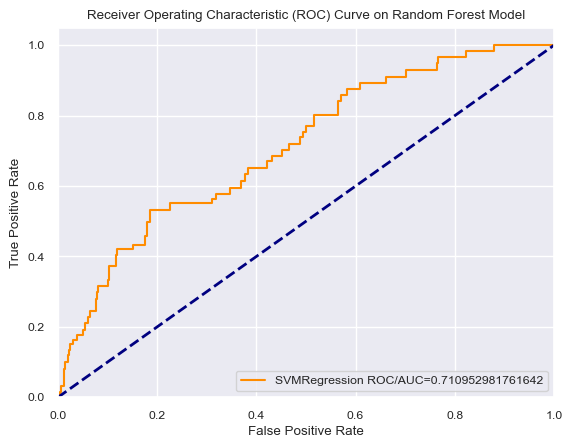

In [95]:
fpr_svmr, tpr_svmr, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_svmr = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_svmr,tpr_svmr,label="SVMRegression ROC/AUC="+str(auc_svmr),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(d). Artificial Neural Network (ANN) Algorithm

In [153]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
## 1. units:- number of neurons that will be present in the respective layer
## 2. activation:- specify which activation function to be used
ann.add(tf.keras.layers.Dense(units=144,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=144,activation="relu"))

#Adding Output Layer
## Because This is a binary classification (output either 0 or 1) than I only need 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
## 1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
## 2. loss:- specifies which loss function should be used.
## 3. metrics:- which performance metrics to be used in order to compute performance.
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN to build a model from splitting datasetset
## 3.batch_size: how many observations should be there in the batch
## 4. epochs: How many times neural networks will be trained.
ann_ros = ann.fit(x_train_ros, y_train_ros,batch_size=90,epochs = 100,validation_data=(x_train_sm, y_train_sm))

Epoch 1/100
118/118 [==============================] - 0s 1ms/step - loss: 25173290.0000 - accuracy: 0.6590
Epoch 2/100
118/118 [==============================] - 0s 1ms/step - loss: 8448260.0000 - accuracy: 0.7363
Epoch 3/100
118/118 [==============================] - 0s 1ms/step - loss: 5852483.5000 - accuracy: 0.7765
Epoch 4/100
118/118 [==============================] - 0s 1ms/step - loss: 6035323.0000 - accuracy: 0.7809
Epoch 5/100
118/118 [==============================] - 0s 1ms/step - loss: 7854278.5000 - accuracy: 0.7671
Epoch 6/100
118/118 [==============================] - 0s 1ms/step - loss: 5855535.0000 - accuracy: 0.7946
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 3655646.7500 - accuracy: 0.8186
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 4485702.5000 - accuracy: 0.8137
Epoch 9/100
118/118 [==============================] - 0s 1ms/step - loss: 5370001.5000 - accuracy: 0.8115
Epoch 10/100
118/118 [==============

118/118 [==============================] - 0s 1ms/step - loss: 509434.1875 - accuracy: 0.8930
Epoch 78/100
118/118 [==============================] - 0s 1ms/step - loss: 479812.6250 - accuracy: 0.8975
Epoch 79/100
118/118 [==============================] - 0s 1ms/step - loss: 431533.1875 - accuracy: 0.8991
Epoch 80/100
118/118 [==============================] - 0s 1ms/step - loss: 517211.1562 - accuracy: 0.8937
Epoch 81/100
118/118 [==============================] - 0s 1ms/step - loss: 403349.0000 - accuracy: 0.9029
Epoch 82/100
118/118 [==============================] - 0s 1ms/step - loss: 405067.7188 - accuracy: 0.9005
Epoch 83/100
118/118 [==============================] - 0s 1ms/step - loss: 596176.3750 - accuracy: 0.8831
Epoch 84/100
118/118 [==============================] - 0s 1ms/step - loss: 593222.1250 - accuracy: 0.8835
Epoch 85/100
118/118 [==============================] - 0s 1ms/step - loss: 487719.0312 - accuracy: 0.8926
Epoch 86/100
118/118 [============================

In [125]:
# evaluate the model
print('Test loss:', ann_ros.history['loss'][-1])
print("\n%s: %.2f%%" % (ann.metrics_names[1], ann_ros.history['accuracy'][-1]*100))

Test loss: 463100.46875

accuracy: 90.03%


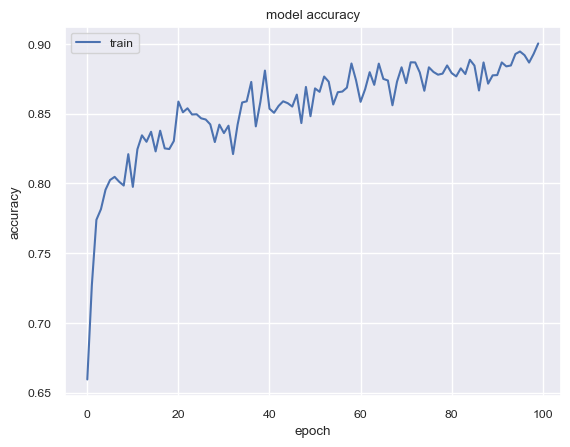

In [126]:
# summarize history for accuracy
plt.plot(ann_ros.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

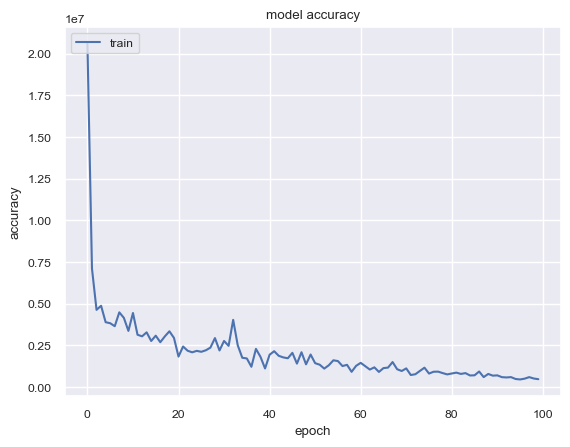

In [127]:
# summarize history for accuracy
plt.plot(ann_ros.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Perbandingan ROC/AUC Dari algoritma yang dipilih 
## Dengan metode oversampling Random Over Sampler

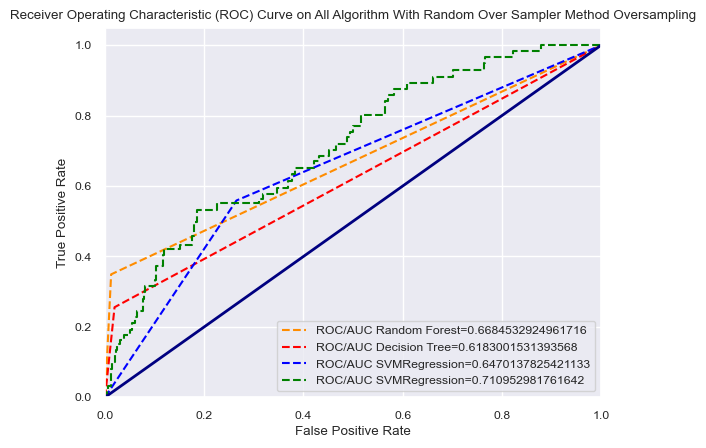

In [128]:
lw = 2

#create ROC curve
plt.plot(fpr_random_forest,tpr_random_forest,label="ROC/AUC Random Forest="+str(auc_random_forest),color="darkorange",linestyle='--')
plt.plot(fpr_decision_tree,tpr_decision_tree,label="ROC/AUC Decision Tree="+str(auc_decision_tree),color="red",linestyle='--')
plt.plot(fpr_svmc,tpr_svmc,label="ROC/AUC SVMRegression="+str(auc_svmc),color="Blue",linestyle='--')
plt.plot(fpr_svmr,tpr_svmr,label="ROC/AUC SVMRegression="+str(auc_svmr),color="Green",linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on All Algorithm With Random Over Sampler Method Oversampling")
plt.show()

### C. With OVERSAMPLING method SMOTE

### C(a). Random Forest Algorithm

In [132]:
classifier= RandomForestClassifier(n_estimators = 80, criterion="entropy", max_features= dataset.shape[1], max_depth = None)  
classifier_sm= classifier.fit(x_train_sm, y_train_sm) 
classifier_sm

RandomForestClassifier(criterion='entropy', max_features=73, n_estimators=80)

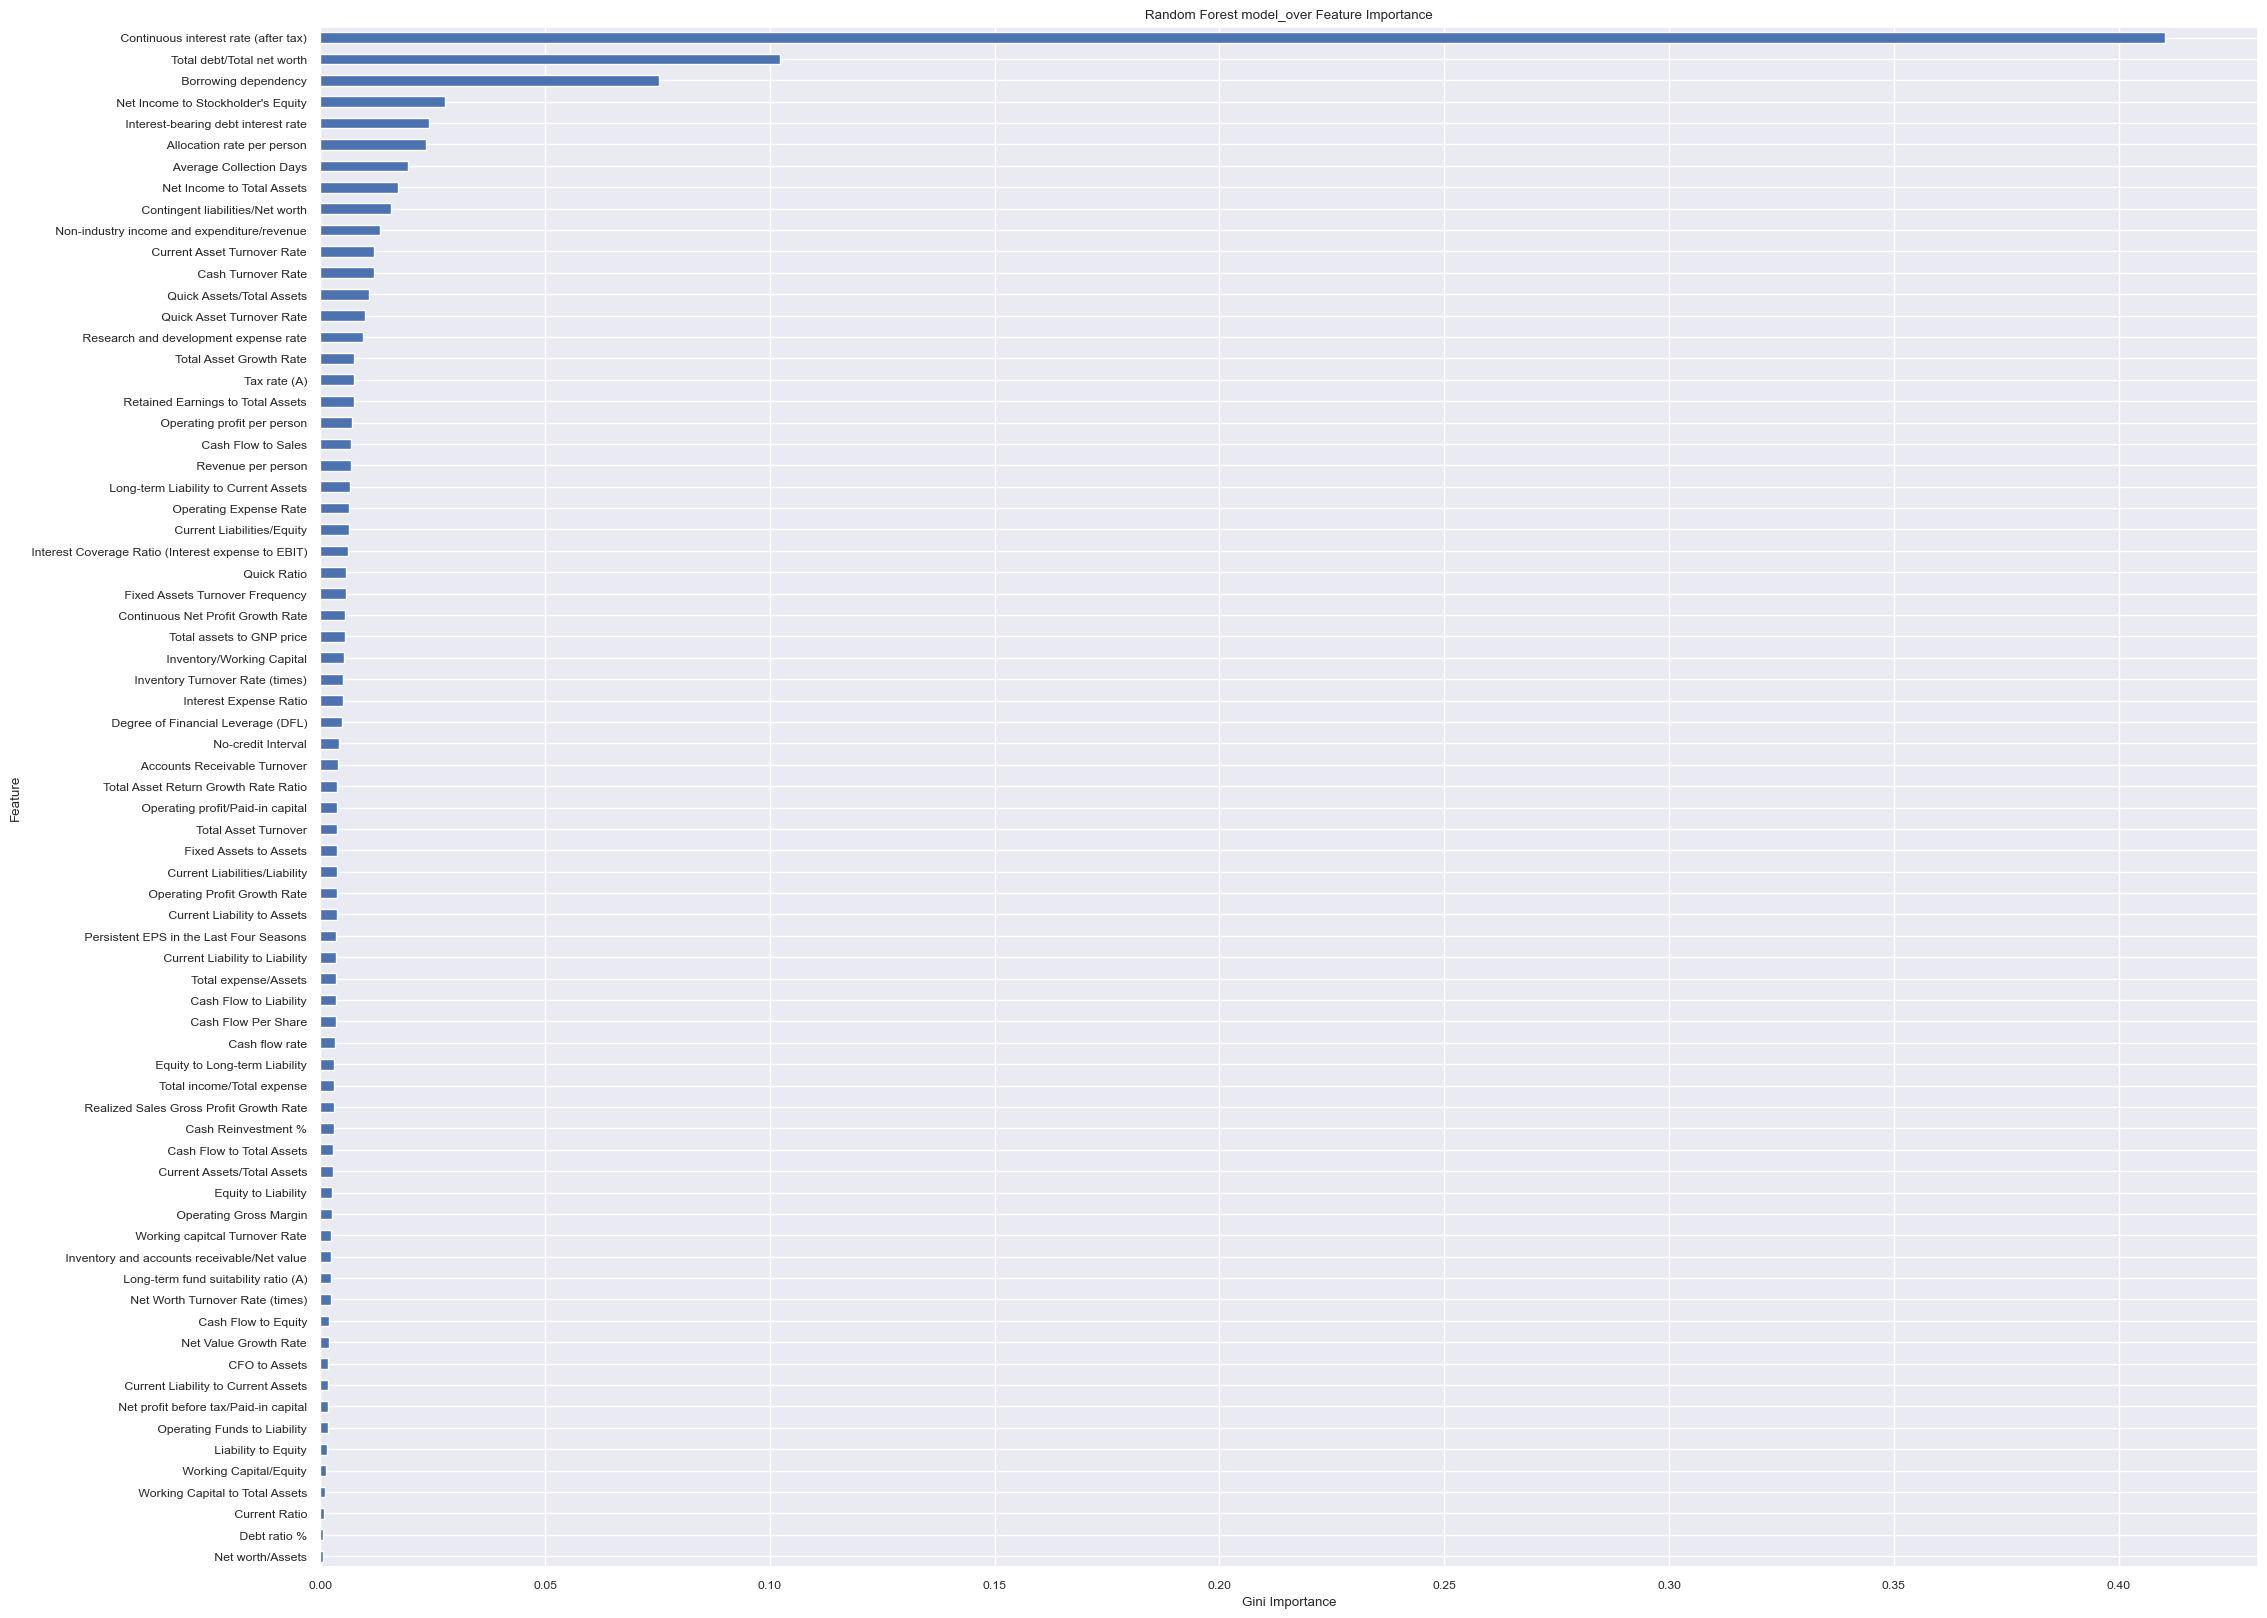

In [133]:
importances = classifier_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Model Evaluation

In [134]:
# Model Accuracy
y_pred= classifier_sm.predict(x_test_sm) 
print(classifier_sm)
print(accuracy_score(y_test_sm, y_pred))

RandomForestClassifier(criterion='entropy', max_features=73, n_estimators=80)
0.9000765696784073


In [135]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1265,   41],
       [ 220, 1086]], dtype=int64)

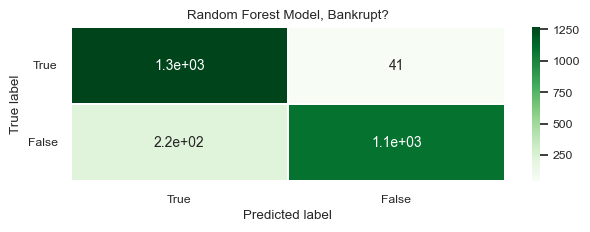

In [136]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [137]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1306
           1       0.96      0.83      0.89      1306

    accuracy                           0.90      2612
   macro avg       0.91      0.90      0.90      2612
weighted avg       0.91      0.90      0.90      2612



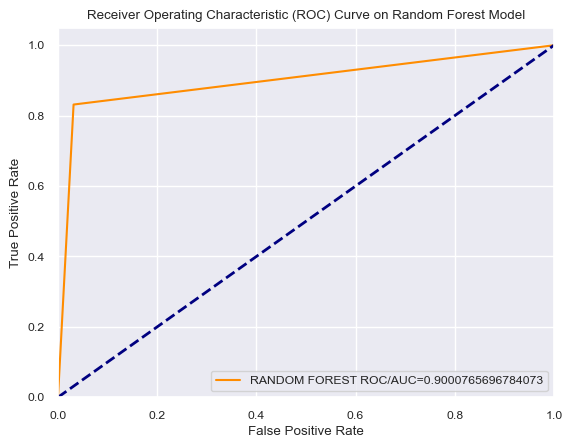

In [138]:
fpr_random_forest_sm, tpr_random_forest_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_random_forest_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_random_forest_sm,tpr_random_forest_sm,label="RANDOM FOREST ROC/AUC="+str(auc_random_forest_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(b). Decision Tree Algorithm

[Text(0.5553946654544921, 0.9897959183673469, 'X[2] <= 0.782\ngini = 0.5\nsamples = 10586\nvalue = [5293, 5293]'),
 Text(0.29522193058345675, 0.9693877551020408, 'X[20] <= 0.01\ngini = 0.308\nsamples = 5983\nvalue = [1140, 4843]'),
 Text(0.14428787190052347, 0.9489795918367347, 'X[67] <= 0.837\ngini = 0.494\nsamples = 1438\nvalue = [799, 639]'),
 Text(0.07132278545977096, 0.9285714285714286, 'X[57] <= 0.984\ngini = 0.389\nsamples = 619\nvalue = [164, 455]'),
 Text(0.04504596976406587, 0.9081632653061225, 'X[47] <= 0.006\ngini = 0.348\nsamples = 580\nvalue = [130, 450]'),
 Text(0.015015323254688623, 0.8877551020408163, 'X[24] <= 0.375\ngini = 0.454\nsamples = 69\nvalue = [45, 24]'),
 Text(0.007507661627344312, 0.8673469387755102, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.022522984882032936, 0.8673469387755102, 'X[60] <= 0.459\ngini = 0.456\nsamples = 37\nvalue = [13, 24]'),
 Text(0.015015323254688623, 0.8469387755102041, 'X[28] <= 0.399\ngini = 0.285\nsamples = 29\nvalue = [

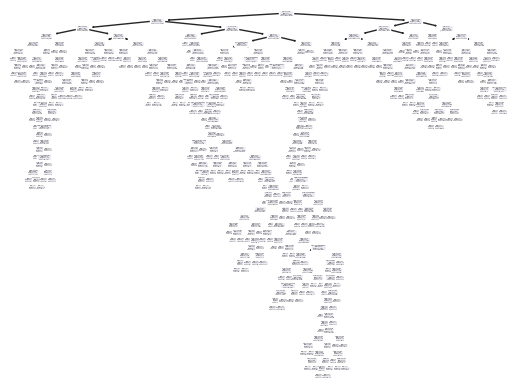

In [139]:
clf = tree.DecisionTreeClassifier()
clf_sm = clf.fit(x_train_sm, y_train_sm)
tree.plot_tree(clf_sm)

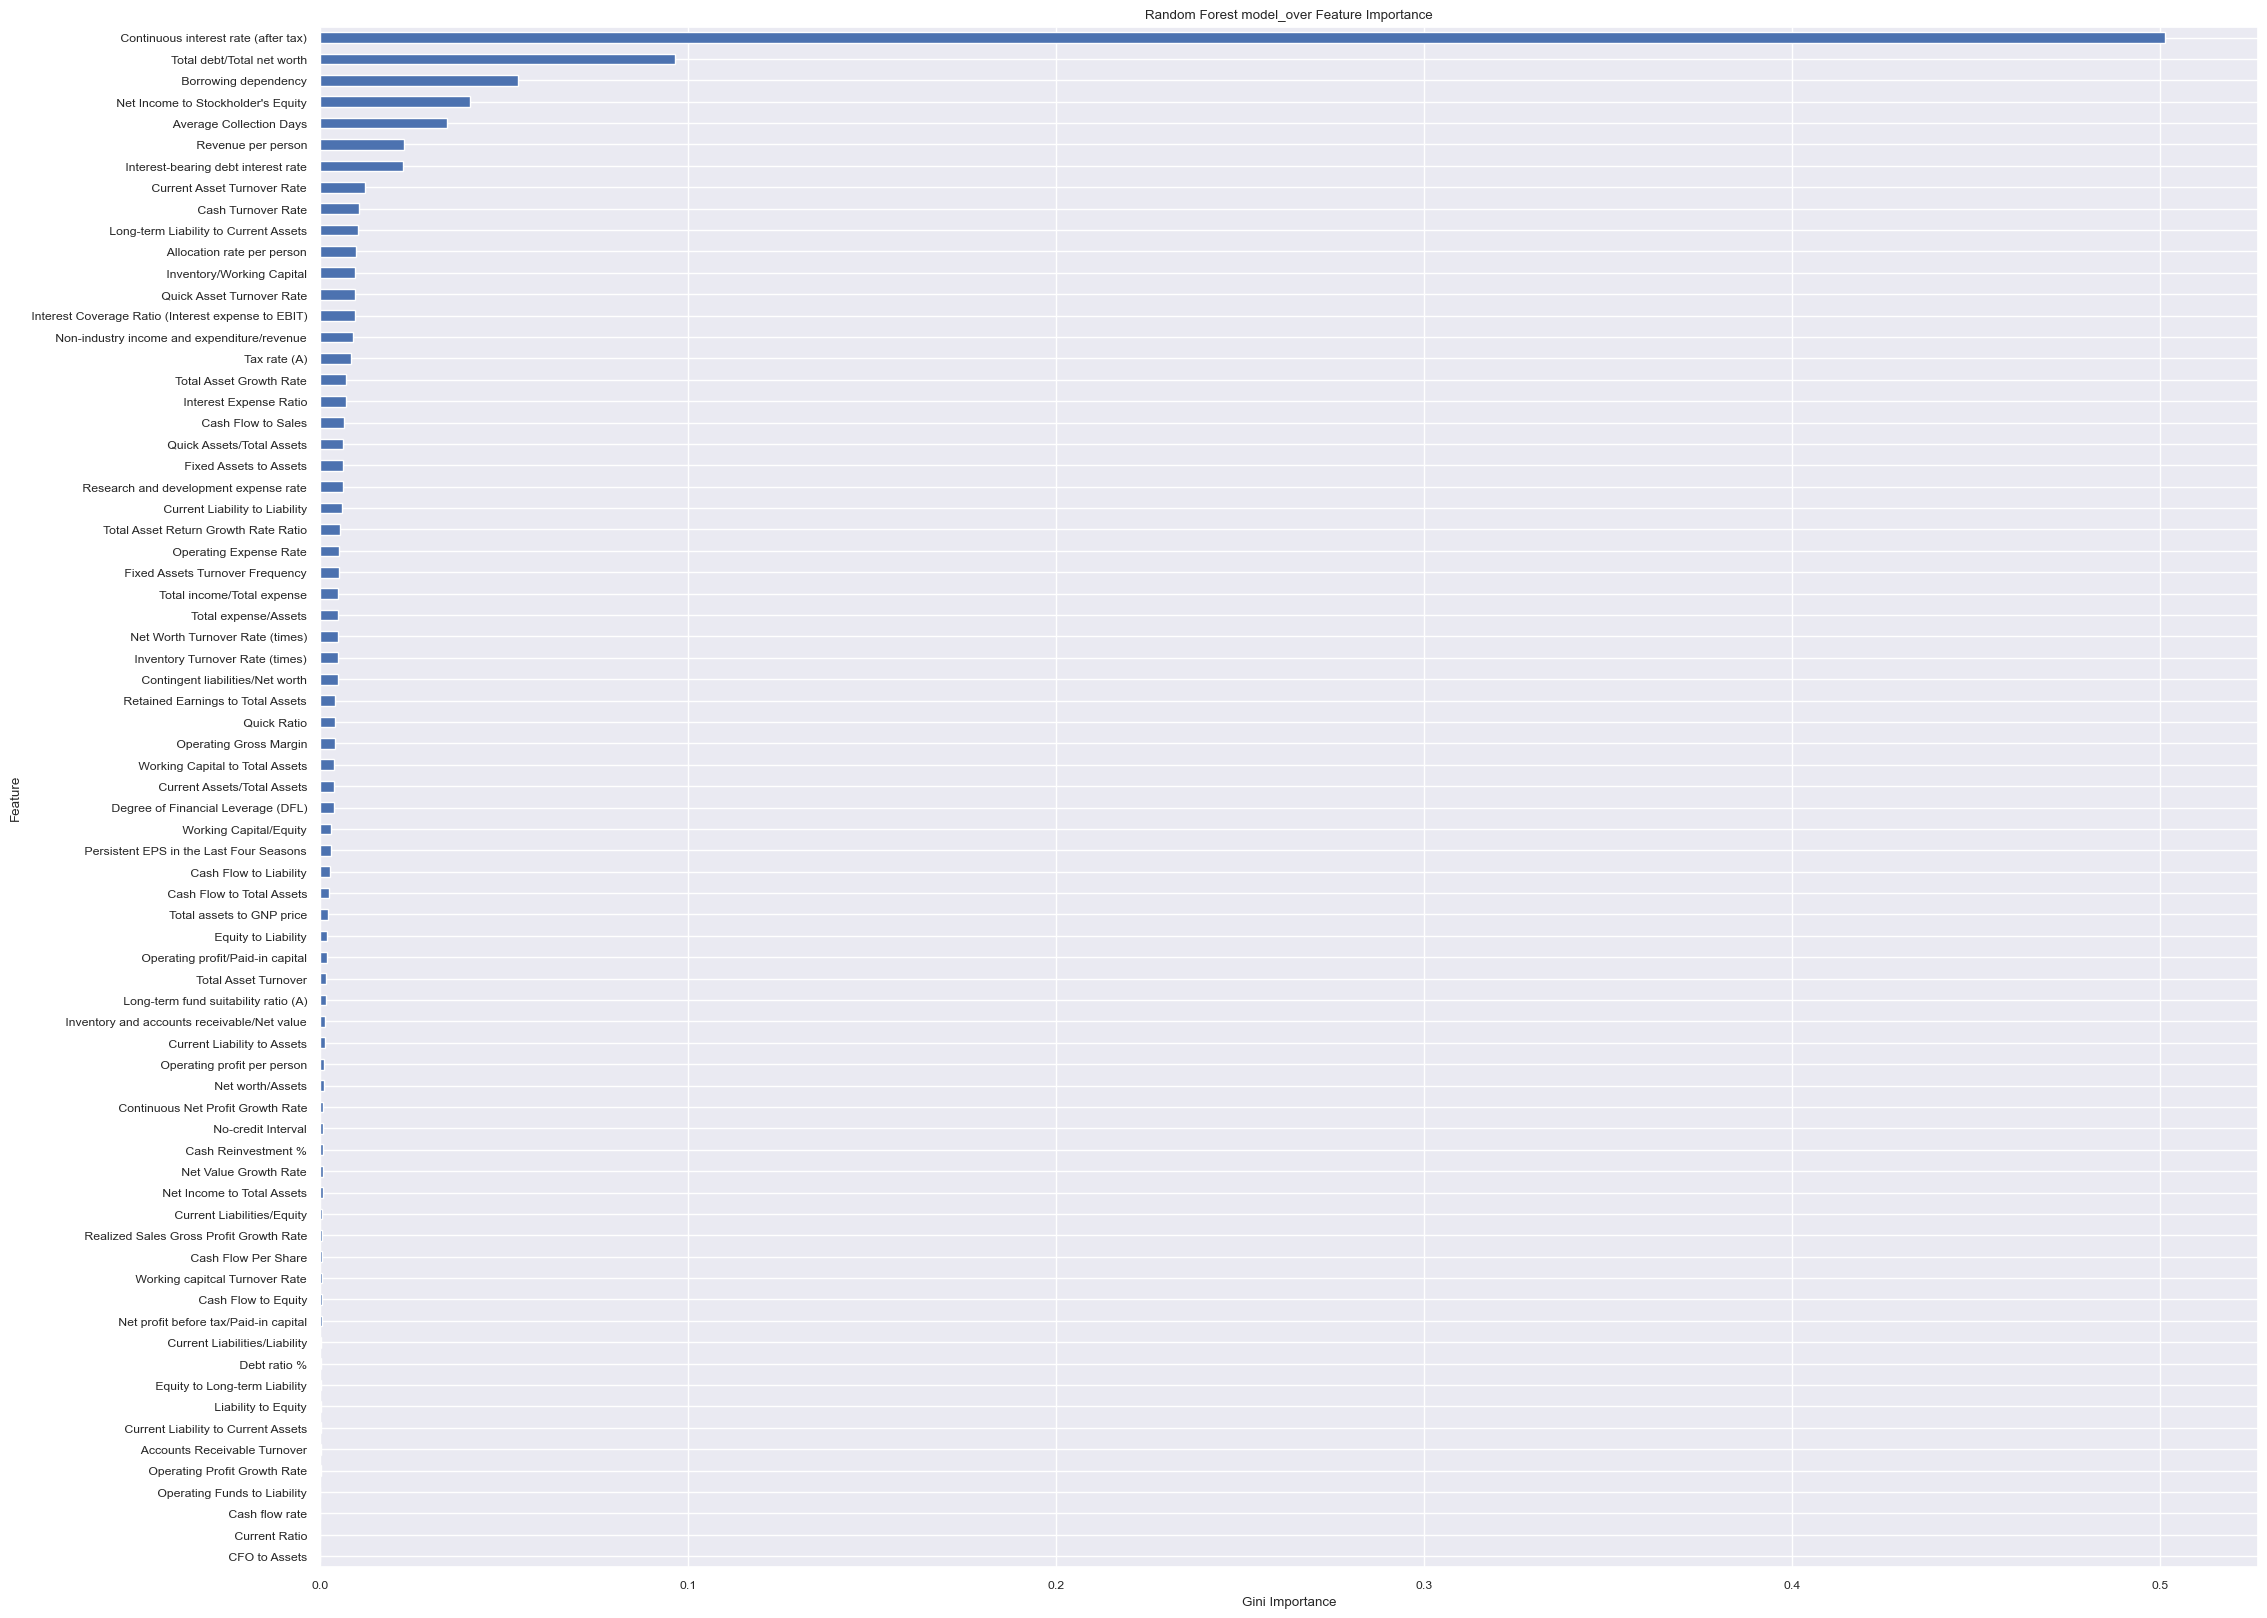

In [140]:
importances = clf_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Decision Tree Model Evaluation

In [141]:
y_pred= clf_ros.predict(x_test_sm) 
print(clf_sm)
print(accuracy_score(y_test_sm, y_pred))

DecisionTreeClassifier()
0.7021439509954058


In [142]:
matrix = confusion_matrix(y_test_sm, y_pred)  
matrix

array([[1281,   25],
       [ 753,  553]], dtype=int64)

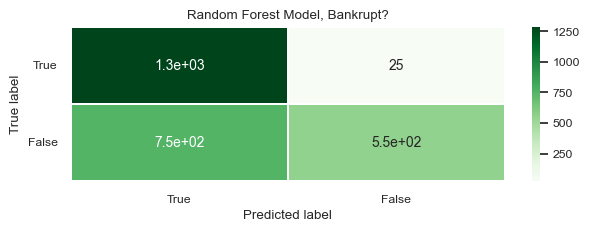

In [143]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [144]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      1306
           1       0.96      0.42      0.59      1306

    accuracy                           0.70      2612
   macro avg       0.79      0.70      0.68      2612
weighted avg       0.79      0.70      0.68      2612



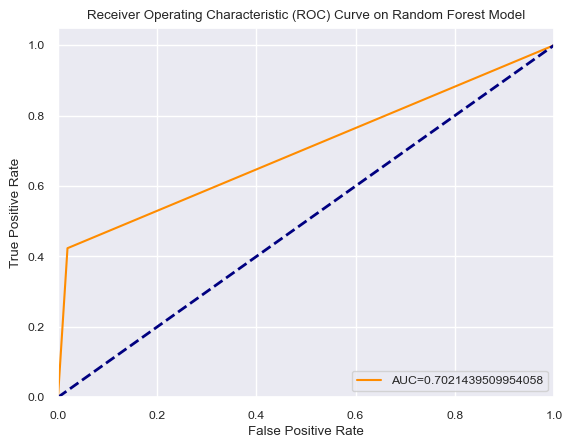

In [145]:
fpr_decision_tree_sm, tpr_decision_tree_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_decision_tree_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_decision_tree_sm,tpr_decision_tree_sm,label="AUC="+str(auc_decision_tree_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(c). Support Vectore Machine (SVM) Algorithm

#### Used Support Vectore Classifier

In [146]:
svmC = svm.SVC()
svm_sm = svmC.fit(x_train_sm, y_train_sm)

In [147]:
y_pred= svm_sm.predict(x_test_sm) 
print(svm_sm)
print(accuracy_score(y_test_sm, y_pred))

SVC()
0.7477029096477795


### Support Vector Machine Classifier Model Evaluation

In [148]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1009,  297],
       [ 362,  944]], dtype=int64)

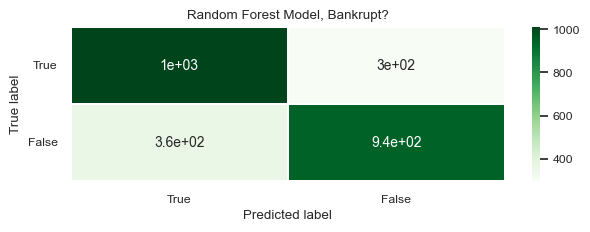

In [149]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [150]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1306
           1       0.76      0.72      0.74      1306

    accuracy                           0.75      2612
   macro avg       0.75      0.75      0.75      2612
weighted avg       0.75      0.75      0.75      2612



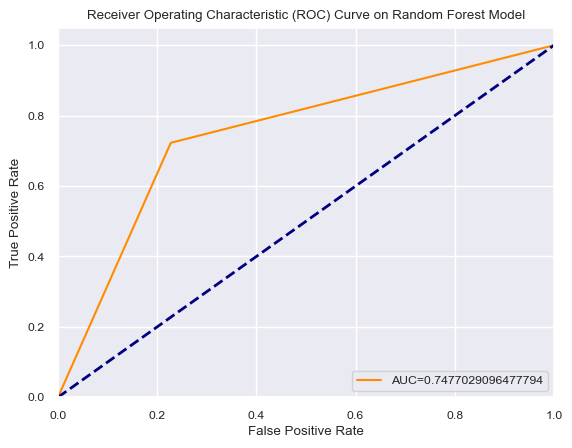

In [151]:
fpr_svmc_sm, tpr_svmc_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_svmc_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_svmc_sm,tpr_svmc_sm,label="AUC="+str(auc_svmc_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(d). Artificial Neural Network Algorithm

In [225]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
## 1. units:- number of neurons that will be present in the respective layer
## 2. activation:- specify which activation function to be used
ann.add(tf.keras.layers.Dense(units=x.shape[1],activation="relu"))


#Adding Output Layer
## Because This is a binary classification (output either 0 or 1) than I only need 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
## 1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
## 2. loss:- specifies which loss function should be used.
## 3. metrics:- which performance metrics to be used in order to compute performance.
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN to build a model from splitting datasetset
## 3.batch_size: how many observations should be there in the batch
## 4. epochs: How many times neural networks will be trained.
ann_ros = ann.fit(x_train_sm, y_train_sm,batch_size=1000,epochs = 4000, validation_data=(x_test_sm, y_test_sm))

Epoch 1/4000
11/11 [==============================] - 0s 13ms/step - loss: 312691424.0000 - accuracy: 0.5241 - val_loss: 189673424.0000 - val_accuracy: 0.6007
Epoch 2/4000
11/11 [==============================] - 0s 4ms/step - loss: 159283456.0000 - accuracy: 0.5401 - val_loss: 121819520.0000 - val_accuracy: 0.5306
Epoch 3/4000
11/11 [==============================] - 0s 4ms/step - loss: 81218232.0000 - accuracy: 0.5392 - val_loss: 77197504.0000 - val_accuracy: 0.5142
Epoch 4/4000
11/11 [==============================] - 0s 4ms/step - loss: 46402912.0000 - accuracy: 0.5486 - val_loss: 52759784.0000 - val_accuracy: 0.5371
Epoch 5/4000
11/11 [==============================] - 0s 4ms/step - loss: 28761102.0000 - accuracy: 0.5490 - val_loss: 44965664.0000 - val_accuracy: 0.5777
Epoch 6/4000
11/11 [==============================] - 0s 4ms/step - loss: 20265170.0000 - accuracy: 0.6109 - val_loss: 39397732.0000 - val_accuracy: 0.5961
Epoch 7/4000
11/11 [==============================] - 0s 4m

11/11 [==============================] - 0s 4ms/step - loss: 2480378.0000 - accuracy: 0.7747 - val_loss: 21216522.0000 - val_accuracy: 0.5850
Epoch 54/4000
11/11 [==============================] - 0s 6ms/step - loss: 2443313.0000 - accuracy: 0.7927 - val_loss: 22293976.0000 - val_accuracy: 0.5877
Epoch 55/4000
11/11 [==============================] - 0s 6ms/step - loss: 2330683.2500 - accuracy: 0.7858 - val_loss: 19763340.0000 - val_accuracy: 0.5781
Epoch 56/4000
11/11 [==============================] - 0s 4ms/step - loss: 2415316.2500 - accuracy: 0.7858 - val_loss: 23260742.0000 - val_accuracy: 0.5632
Epoch 57/4000
11/11 [==============================] - 0s 3ms/step - loss: 2262900.2500 - accuracy: 0.7848 - val_loss: 21010718.0000 - val_accuracy: 0.5750
Epoch 58/4000
11/11 [==============================] - 0s 3ms/step - loss: 2340876.7500 - accuracy: 0.7825 - val_loss: 20855832.0000 - val_accuracy: 0.5624
Epoch 59/4000
11/11 [==============================] - 0s 3ms/step - loss: 231

11/11 [==============================] - 0s 5ms/step - loss: 1667199.8750 - accuracy: 0.7990 - val_loss: 19042794.0000 - val_accuracy: 0.6053
Epoch 106/4000
11/11 [==============================] - 0s 4ms/step - loss: 1627037.1250 - accuracy: 0.8040 - val_loss: 19295270.0000 - val_accuracy: 0.5930
Epoch 107/4000
11/11 [==============================] - 0s 4ms/step - loss: 1477507.0000 - accuracy: 0.8176 - val_loss: 18792438.0000 - val_accuracy: 0.6083
Epoch 108/4000
11/11 [==============================] - 0s 4ms/step - loss: 1637580.6250 - accuracy: 0.8016 - val_loss: 19875202.0000 - val_accuracy: 0.5946
Epoch 109/4000
11/11 [==============================] - 0s 4ms/step - loss: 1636573.5000 - accuracy: 0.8061 - val_loss: 17502840.0000 - val_accuracy: 0.5689
Epoch 110/4000
11/11 [==============================] - 0s 4ms/step - loss: 1630686.3750 - accuracy: 0.8072 - val_loss: 18463762.0000 - val_accuracy: 0.6076
Epoch 111/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 1113563.7500 - accuracy: 0.8319 - val_loss: 20505272.0000 - val_accuracy: 0.6022
Epoch 158/4000
11/11 [==============================] - 0s 4ms/step - loss: 1179432.2500 - accuracy: 0.8296 - val_loss: 20734166.0000 - val_accuracy: 0.5949
Epoch 159/4000
11/11 [==============================] - 0s 4ms/step - loss: 1096901.5000 - accuracy: 0.8349 - val_loss: 18964236.0000 - val_accuracy: 0.5946
Epoch 160/4000
11/11 [==============================] - 0s 4ms/step - loss: 1154172.2500 - accuracy: 0.8251 - val_loss: 19028608.0000 - val_accuracy: 0.5789
Epoch 161/4000
11/11 [==============================] - 0s 3ms/step - loss: 1224620.3750 - accuracy: 0.8317 - val_loss: 20302656.0000 - val_accuracy: 0.6076
Epoch 162/4000
11/11 [==============================] - 0s 4ms/step - loss: 1401655.6250 - accuracy: 0.8075 - val_loss: 18039336.0000 - val_accuracy: 0.6114
Epoch 163/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 5ms/step - loss: 961728.5000 - accuracy: 0.8297 - val_loss: 20073528.0000 - val_accuracy: 0.5969
Epoch 210/4000
11/11 [==============================] - 0s 4ms/step - loss: 1000567.1875 - accuracy: 0.8373 - val_loss: 22414526.0000 - val_accuracy: 0.6229
Epoch 211/4000
11/11 [==============================] - 0s 4ms/step - loss: 1157513.7500 - accuracy: 0.8131 - val_loss: 19050982.0000 - val_accuracy: 0.5953
Epoch 212/4000
11/11 [==============================] - 0s 4ms/step - loss: 1145212.6250 - accuracy: 0.8262 - val_loss: 23180388.0000 - val_accuracy: 0.5639
Epoch 213/4000
11/11 [==============================] - 0s 4ms/step - loss: 1216600.7500 - accuracy: 0.8176 - val_loss: 20011172.0000 - val_accuracy: 0.5471
Epoch 214/4000
11/11 [==============================] - 0s 4ms/step - loss: 1252526.3750 - accuracy: 0.8150 - val_loss: 18925340.0000 - val_accuracy: 0.5938
Epoch 215/4000
11/11 [==============================] - 0s 4ms/step - loss

11/11 [==============================] - 0s 6ms/step - loss: 1008026.1250 - accuracy: 0.8329 - val_loss: 24322292.0000 - val_accuracy: 0.5720
Epoch 262/4000
11/11 [==============================] - 0s 4ms/step - loss: 889318.1875 - accuracy: 0.8461 - val_loss: 21983200.0000 - val_accuracy: 0.6060
Epoch 263/4000
11/11 [==============================] - 0s 4ms/step - loss: 843274.1875 - accuracy: 0.8491 - val_loss: 21555846.0000 - val_accuracy: 0.6141
Epoch 264/4000
11/11 [==============================] - 0s 4ms/step - loss: 859545.7500 - accuracy: 0.8446 - val_loss: 20832682.0000 - val_accuracy: 0.5926
Epoch 265/4000
11/11 [==============================] - 0s 4ms/step - loss: 911103.4375 - accuracy: 0.8397 - val_loss: 23775530.0000 - val_accuracy: 0.6122
Epoch 266/4000
11/11 [==============================] - 0s 4ms/step - loss: 959370.9375 - accuracy: 0.8328 - val_loss: 22118478.0000 - val_accuracy: 0.6060
Epoch 267/4000
11/11 [==============================] - 0s 4ms/step - loss: 86

11/11 [==============================] - 0s 4ms/step - loss: 741439.5000 - accuracy: 0.8507 - val_loss: 22247982.0000 - val_accuracy: 0.5884
Epoch 314/4000
11/11 [==============================] - 0s 4ms/step - loss: 830253.6875 - accuracy: 0.8462 - val_loss: 22776830.0000 - val_accuracy: 0.6149
Epoch 315/4000
11/11 [==============================] - 0s 4ms/step - loss: 1125943.1250 - accuracy: 0.8165 - val_loss: 23379318.0000 - val_accuracy: 0.6183
Epoch 316/4000
11/11 [==============================] - 0s 4ms/step - loss: 1257869.6250 - accuracy: 0.8159 - val_loss: 23278596.0000 - val_accuracy: 0.5685
Epoch 317/4000
11/11 [==============================] - 0s 4ms/step - loss: 1595654.3750 - accuracy: 0.8071 - val_loss: 25406642.0000 - val_accuracy: 0.6072
Epoch 318/4000
11/11 [==============================] - 0s 4ms/step - loss: 1418365.8750 - accuracy: 0.8172 - val_loss: 23096376.0000 - val_accuracy: 0.5915
Epoch 319/4000
11/11 [==============================] - 0s 4ms/step - loss:

11/11 [==============================] - 0s 4ms/step - loss: 816492.7500 - accuracy: 0.8471 - val_loss: 22482264.0000 - val_accuracy: 0.6045
Epoch 366/4000
11/11 [==============================] - 0s 4ms/step - loss: 807822.6250 - accuracy: 0.8484 - val_loss: 22728796.0000 - val_accuracy: 0.5888
Epoch 367/4000
11/11 [==============================] - 0s 4ms/step - loss: 733725.1875 - accuracy: 0.8548 - val_loss: 22559072.0000 - val_accuracy: 0.6041
Epoch 368/4000
11/11 [==============================] - 0s 4ms/step - loss: 811852.9375 - accuracy: 0.8463 - val_loss: 27258024.0000 - val_accuracy: 0.5624
Epoch 369/4000
11/11 [==============================] - 0s 4ms/step - loss: 1099884.8750 - accuracy: 0.8185 - val_loss: 21050292.0000 - val_accuracy: 0.6080
Epoch 370/4000
11/11 [==============================] - 0s 4ms/step - loss: 1427002.3750 - accuracy: 0.7989 - val_loss: 20634058.0000 - val_accuracy: 0.6099
Epoch 371/4000
11/11 [==============================] - 0s 4ms/step - loss: 1

11/11 [==============================] - 0s 4ms/step - loss: 771534.2500 - accuracy: 0.8503 - val_loss: 23436404.0000 - val_accuracy: 0.5938
Epoch 418/4000
11/11 [==============================] - 0s 4ms/step - loss: 857675.4375 - accuracy: 0.8409 - val_loss: 23398730.0000 - val_accuracy: 0.6057
Epoch 419/4000
11/11 [==============================] - 0s 4ms/step - loss: 812596.4375 - accuracy: 0.8465 - val_loss: 25467370.0000 - val_accuracy: 0.5976
Epoch 420/4000
11/11 [==============================] - 0s 4ms/step - loss: 832247.8125 - accuracy: 0.8458 - val_loss: 25052776.0000 - val_accuracy: 0.5942
Epoch 421/4000
11/11 [==============================] - 0s 4ms/step - loss: 809407.5625 - accuracy: 0.8455 - val_loss: 25016212.0000 - val_accuracy: 0.5923
Epoch 422/4000
11/11 [==============================] - 0s 4ms/step - loss: 822226.5625 - accuracy: 0.8391 - val_loss: 22646480.0000 - val_accuracy: 0.5980
Epoch 423/4000
11/11 [==============================] - 0s 4ms/step - loss: 714

11/11 [==============================] - 0s 4ms/step - loss: 677613.8125 - accuracy: 0.8575 - val_loss: 26622552.0000 - val_accuracy: 0.5873
Epoch 470/4000
11/11 [==============================] - 0s 4ms/step - loss: 983606.9375 - accuracy: 0.8251 - val_loss: 23030126.0000 - val_accuracy: 0.5639
Epoch 471/4000
11/11 [==============================] - 0s 4ms/step - loss: 953247.3750 - accuracy: 0.8404 - val_loss: 23627098.0000 - val_accuracy: 0.5919
Epoch 472/4000
11/11 [==============================] - 0s 4ms/step - loss: 791560.6875 - accuracy: 0.8414 - val_loss: 25686994.0000 - val_accuracy: 0.5789
Epoch 473/4000
11/11 [==============================] - 0s 4ms/step - loss: 755653.7500 - accuracy: 0.8473 - val_loss: 24845354.0000 - val_accuracy: 0.5942
Epoch 474/4000
11/11 [==============================] - 0s 4ms/step - loss: 804193.1875 - accuracy: 0.8448 - val_loss: 23606152.0000 - val_accuracy: 0.6034
Epoch 475/4000
11/11 [==============================] - 0s 4ms/step - loss: 892

11/11 [==============================] - 0s 4ms/step - loss: 952844.8750 - accuracy: 0.8308 - val_loss: 27537710.0000 - val_accuracy: 0.5651
Epoch 522/4000
11/11 [==============================] - 0s 4ms/step - loss: 1200004.7500 - accuracy: 0.8141 - val_loss: 24337002.0000 - val_accuracy: 0.6172
Epoch 523/4000
11/11 [==============================] - 0s 4ms/step - loss: 991565.5000 - accuracy: 0.8411 - val_loss: 23891538.0000 - val_accuracy: 0.6011
Epoch 524/4000
11/11 [==============================] - 0s 4ms/step - loss: 980720.7500 - accuracy: 0.8353 - val_loss: 21895768.0000 - val_accuracy: 0.6405
Epoch 525/4000
11/11 [==============================] - 0s 4ms/step - loss: 817098.8750 - accuracy: 0.8533 - val_loss: 25871852.0000 - val_accuracy: 0.5995
Epoch 526/4000
11/11 [==============================] - 0s 4ms/step - loss: 755570.3125 - accuracy: 0.8471 - val_loss: 26070660.0000 - val_accuracy: 0.5972
Epoch 527/4000
11/11 [==============================] - 0s 4ms/step - loss: 11

11/11 [==============================] - 0s 4ms/step - loss: 791143.6875 - accuracy: 0.8394 - val_loss: 22910776.0000 - val_accuracy: 0.6018
Epoch 574/4000
11/11 [==============================] - 0s 4ms/step - loss: 840619.9375 - accuracy: 0.8418 - val_loss: 22693202.0000 - val_accuracy: 0.6007
Epoch 575/4000
11/11 [==============================] - 0s 4ms/step - loss: 1107807.8750 - accuracy: 0.8235 - val_loss: 22867732.0000 - val_accuracy: 0.6313
Epoch 576/4000
11/11 [==============================] - 0s 4ms/step - loss: 740871.5000 - accuracy: 0.8630 - val_loss: 24714496.0000 - val_accuracy: 0.6133
Epoch 577/4000
11/11 [==============================] - 0s 4ms/step - loss: 683515.9375 - accuracy: 0.8575 - val_loss: 24816200.0000 - val_accuracy: 0.5926
Epoch 578/4000
11/11 [==============================] - 0s 4ms/step - loss: 728764.5000 - accuracy: 0.8467 - val_loss: 24050202.0000 - val_accuracy: 0.5984
Epoch 579/4000
11/11 [==============================] - 0s 4ms/step - loss: 74

11/11 [==============================] - 0s 5ms/step - loss: 843888.1875 - accuracy: 0.8354 - val_loss: 25929520.0000 - val_accuracy: 0.6175
Epoch 626/4000
11/11 [==============================] - 0s 5ms/step - loss: 720899.7500 - accuracy: 0.8622 - val_loss: 26165642.0000 - val_accuracy: 0.6049
Epoch 627/4000
11/11 [==============================] - 0s 3ms/step - loss: 624722.7500 - accuracy: 0.8657 - val_loss: 24515522.0000 - val_accuracy: 0.5984
Epoch 628/4000
11/11 [==============================] - 0s 3ms/step - loss: 641032.0625 - accuracy: 0.8517 - val_loss: 26201020.0000 - val_accuracy: 0.5831
Epoch 629/4000
11/11 [==============================] - 0s 4ms/step - loss: 1045173.8750 - accuracy: 0.8250 - val_loss: 27458956.0000 - val_accuracy: 0.5846
Epoch 630/4000
11/11 [==============================] - 0s 4ms/step - loss: 834773.5000 - accuracy: 0.8476 - val_loss: 26862080.0000 - val_accuracy: 0.5965
Epoch 631/4000
11/11 [==============================] - 0s 5ms/step - loss: 72

11/11 [==============================] - 0s 4ms/step - loss: 806100.4375 - accuracy: 0.8403 - val_loss: 25313342.0000 - val_accuracy: 0.6221
Epoch 678/4000
11/11 [==============================] - 0s 4ms/step - loss: 827646.6250 - accuracy: 0.8454 - val_loss: 27499710.0000 - val_accuracy: 0.5992
Epoch 679/4000
11/11 [==============================] - 0s 4ms/step - loss: 870973.2500 - accuracy: 0.8409 - val_loss: 26592832.0000 - val_accuracy: 0.5992
Epoch 680/4000
11/11 [==============================] - 0s 4ms/step - loss: 808723.5000 - accuracy: 0.8514 - val_loss: 26987468.0000 - val_accuracy: 0.5815
Epoch 681/4000
11/11 [==============================] - 0s 4ms/step - loss: 804373.1875 - accuracy: 0.8483 - val_loss: 26370428.0000 - val_accuracy: 0.6179
Epoch 682/4000
11/11 [==============================] - 0s 6ms/step - loss: 688427.3125 - accuracy: 0.8575 - val_loss: 26534240.0000 - val_accuracy: 0.6210
Epoch 683/4000
11/11 [==============================] - 0s 5ms/step - loss: 647

11/11 [==============================] - 0s 3ms/step - loss: 858774.5000 - accuracy: 0.8342 - val_loss: 26112090.0000 - val_accuracy: 0.6003
Epoch 730/4000
11/11 [==============================] - 0s 3ms/step - loss: 642183.0625 - accuracy: 0.8615 - val_loss: 27734906.0000 - val_accuracy: 0.5892
Epoch 731/4000
11/11 [==============================] - 0s 4ms/step - loss: 642809.6250 - accuracy: 0.8545 - val_loss: 25436204.0000 - val_accuracy: 0.6122
Epoch 732/4000
11/11 [==============================] - 0s 4ms/step - loss: 957558.3125 - accuracy: 0.8228 - val_loss: 30976600.0000 - val_accuracy: 0.5578
Epoch 733/4000
11/11 [==============================] - 0s 4ms/step - loss: 1168792.3750 - accuracy: 0.8208 - val_loss: 28525366.0000 - val_accuracy: 0.5865
Epoch 734/4000
11/11 [==============================] - 0s 4ms/step - loss: 871494.8750 - accuracy: 0.8330 - val_loss: 29322816.0000 - val_accuracy: 0.5724
Epoch 735/4000
11/11 [==============================] - 0s 4ms/step - loss: 82

11/11 [==============================] - 0s 5ms/step - loss: 811718.3125 - accuracy: 0.8454 - val_loss: 26034262.0000 - val_accuracy: 0.5900
Epoch 782/4000
11/11 [==============================] - 0s 5ms/step - loss: 690371.8750 - accuracy: 0.8493 - val_loss: 25429816.0000 - val_accuracy: 0.6011
Epoch 783/4000
11/11 [==============================] - 0s 5ms/step - loss: 701570.5000 - accuracy: 0.8571 - val_loss: 25868812.0000 - val_accuracy: 0.6030
Epoch 784/4000
11/11 [==============================] - 0s 4ms/step - loss: 579973.3750 - accuracy: 0.8620 - val_loss: 26706026.0000 - val_accuracy: 0.5976
Epoch 785/4000
11/11 [==============================] - 0s 4ms/step - loss: 574949.5625 - accuracy: 0.8616 - val_loss: 25292740.0000 - val_accuracy: 0.5808
Epoch 786/4000
11/11 [==============================] - 0s 4ms/step - loss: 558084.9375 - accuracy: 0.8615 - val_loss: 26617044.0000 - val_accuracy: 0.5911
Epoch 787/4000
11/11 [==============================] - 0s 4ms/step - loss: 529

11/11 [==============================] - 0s 4ms/step - loss: 586521.1875 - accuracy: 0.8677 - val_loss: 25932658.0000 - val_accuracy: 0.5850
Epoch 834/4000
11/11 [==============================] - 0s 3ms/step - loss: 600204.0625 - accuracy: 0.8524 - val_loss: 27274088.0000 - val_accuracy: 0.5938
Epoch 835/4000
11/11 [==============================] - 0s 4ms/step - loss: 632790.0625 - accuracy: 0.8600 - val_loss: 28903640.0000 - val_accuracy: 0.5915
Epoch 836/4000
11/11 [==============================] - 0s 4ms/step - loss: 785669.6875 - accuracy: 0.8360 - val_loss: 26128018.0000 - val_accuracy: 0.5969
Epoch 837/4000
11/11 [==============================] - 0s 3ms/step - loss: 615009.6250 - accuracy: 0.8622 - val_loss: 27291912.0000 - val_accuracy: 0.6003
Epoch 838/4000
11/11 [==============================] - 0s 4ms/step - loss: 580713.0625 - accuracy: 0.8585 - val_loss: 27817152.0000 - val_accuracy: 0.6072
Epoch 839/4000
11/11 [==============================] - 0s 4ms/step - loss: 598

11/11 [==============================] - 0s 4ms/step - loss: 613506.6875 - accuracy: 0.8561 - val_loss: 26045232.0000 - val_accuracy: 0.6034
Epoch 886/4000
11/11 [==============================] - 0s 4ms/step - loss: 571176.9375 - accuracy: 0.8572 - val_loss: 25399060.0000 - val_accuracy: 0.5777
Epoch 887/4000
11/11 [==============================] - 0s 4ms/step - loss: 1042994.3125 - accuracy: 0.8160 - val_loss: 24772734.0000 - val_accuracy: 0.6064
Epoch 888/4000
11/11 [==============================] - 0s 4ms/step - loss: 760168.6875 - accuracy: 0.8464 - val_loss: 28304580.0000 - val_accuracy: 0.5946
Epoch 889/4000
11/11 [==============================] - 0s 4ms/step - loss: 763024.6875 - accuracy: 0.8474 - val_loss: 26761714.0000 - val_accuracy: 0.5731
Epoch 890/4000
11/11 [==============================] - 0s 4ms/step - loss: 712983.4375 - accuracy: 0.8454 - val_loss: 25533876.0000 - val_accuracy: 0.6038
Epoch 891/4000
11/11 [==============================] - 0s 4ms/step - loss: 81

11/11 [==============================] - 0s 4ms/step - loss: 608545.8750 - accuracy: 0.8532 - val_loss: 26764108.0000 - val_accuracy: 0.6164
Epoch 938/4000
11/11 [==============================] - 0s 4ms/step - loss: 685943.1875 - accuracy: 0.8456 - val_loss: 26050926.0000 - val_accuracy: 0.6053
Epoch 939/4000
11/11 [==============================] - 0s 4ms/step - loss: 805259.8750 - accuracy: 0.8437 - val_loss: 27000346.0000 - val_accuracy: 0.6091
Epoch 940/4000
11/11 [==============================] - 0s 4ms/step - loss: 598355.0625 - accuracy: 0.8626 - val_loss: 27550656.0000 - val_accuracy: 0.6149
Epoch 941/4000
11/11 [==============================] - 0s 4ms/step - loss: 601797.4375 - accuracy: 0.8559 - val_loss: 26142118.0000 - val_accuracy: 0.6041
Epoch 942/4000
11/11 [==============================] - 0s 4ms/step - loss: 841389.5625 - accuracy: 0.8336 - val_loss: 24275090.0000 - val_accuracy: 0.6459
Epoch 943/4000
11/11 [==============================] - 0s 4ms/step - loss: 771

11/11 [==============================] - 0s 4ms/step - loss: 533668.4375 - accuracy: 0.8674 - val_loss: 28430500.0000 - val_accuracy: 0.5969
Epoch 990/4000
11/11 [==============================] - 0s 4ms/step - loss: 577140.9375 - accuracy: 0.8546 - val_loss: 26723634.0000 - val_accuracy: 0.5984
Epoch 991/4000
11/11 [==============================] - 0s 4ms/step - loss: 631591.8125 - accuracy: 0.8467 - val_loss: 26363120.0000 - val_accuracy: 0.6095
Epoch 992/4000
11/11 [==============================] - 0s 4ms/step - loss: 828063.3125 - accuracy: 0.8347 - val_loss: 27893898.0000 - val_accuracy: 0.6129
Epoch 993/4000
11/11 [==============================] - 0s 4ms/step - loss: 833434.8125 - accuracy: 0.8398 - val_loss: 27762330.0000 - val_accuracy: 0.6103
Epoch 994/4000
11/11 [==============================] - 0s 3ms/step - loss: 691335.5000 - accuracy: 0.8520 - val_loss: 28067654.0000 - val_accuracy: 0.5923
Epoch 995/4000
11/11 [==============================] - 0s 4ms/step - loss: 581

11/11 [==============================] - 0s 4ms/step - loss: 715936.7500 - accuracy: 0.8519 - val_loss: 27362052.0000 - val_accuracy: 0.5953
Epoch 1042/4000
11/11 [==============================] - 0s 3ms/step - loss: 479461.8438 - accuracy: 0.8738 - val_loss: 28621816.0000 - val_accuracy: 0.5815
Epoch 1043/4000
11/11 [==============================] - 0s 4ms/step - loss: 529354.0000 - accuracy: 0.8597 - val_loss: 26588542.0000 - val_accuracy: 0.6049
Epoch 1044/4000
11/11 [==============================] - 0s 4ms/step - loss: 497508.9375 - accuracy: 0.8687 - val_loss: 26577102.0000 - val_accuracy: 0.6179
Epoch 1045/4000
11/11 [==============================] - 0s 4ms/step - loss: 653025.2500 - accuracy: 0.8377 - val_loss: 25212342.0000 - val_accuracy: 0.5965
Epoch 1046/4000
11/11 [==============================] - 0s 4ms/step - loss: 798979.1250 - accuracy: 0.8390 - val_loss: 28499680.0000 - val_accuracy: 0.6110
Epoch 1047/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 480667.8438 - accuracy: 0.8740 - val_loss: 27103104.0000 - val_accuracy: 0.6038
Epoch 1094/4000
11/11 [==============================] - 0s 4ms/step - loss: 575480.1875 - accuracy: 0.8557 - val_loss: 27260626.0000 - val_accuracy: 0.5992
Epoch 1095/4000
11/11 [==============================] - 0s 4ms/step - loss: 566457.0625 - accuracy: 0.8562 - val_loss: 26287920.0000 - val_accuracy: 0.6053
Epoch 1096/4000
11/11 [==============================] - 0s 4ms/step - loss: 580826.4375 - accuracy: 0.8635 - val_loss: 30817414.0000 - val_accuracy: 0.5689
Epoch 1097/4000
11/11 [==============================] - 0s 4ms/step - loss: 1257604.6250 - accuracy: 0.7975 - val_loss: 27324362.0000 - val_accuracy: 0.5850
Epoch 1098/4000
11/11 [==============================] - 0s 4ms/step - loss: 936010.3750 - accuracy: 0.8430 - val_loss: 27516308.0000 - val_accuracy: 0.5777
Epoch 1099/4000
11/11 [==============================] - 0s 4ms/step - lo

11/11 [==============================] - 0s 4ms/step - loss: 866631.4375 - accuracy: 0.8336 - val_loss: 30802592.0000 - val_accuracy: 0.6041
Epoch 1146/4000
11/11 [==============================] - 0s 4ms/step - loss: 734230.1250 - accuracy: 0.8520 - val_loss: 26815132.0000 - val_accuracy: 0.6198
Epoch 1147/4000
11/11 [==============================] - 0s 4ms/step - loss: 623227.3750 - accuracy: 0.8564 - val_loss: 27676004.0000 - val_accuracy: 0.6099
Epoch 1148/4000
11/11 [==============================] - 0s 4ms/step - loss: 556901.5625 - accuracy: 0.8653 - val_loss: 28724386.0000 - val_accuracy: 0.5609
Epoch 1149/4000
11/11 [==============================] - 0s 4ms/step - loss: 536497.6250 - accuracy: 0.8632 - val_loss: 27056452.0000 - val_accuracy: 0.5919
Epoch 1150/4000
11/11 [==============================] - 0s 4ms/step - loss: 546780.9375 - accuracy: 0.8685 - val_loss: 27361430.0000 - val_accuracy: 0.5670
Epoch 1151/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 499865.7500 - accuracy: 0.8654 - val_loss: 26362916.0000 - val_accuracy: 0.6168
Epoch 1198/4000
11/11 [==============================] - 0s 4ms/step - loss: 591906.1875 - accuracy: 0.8507 - val_loss: 27692224.0000 - val_accuracy: 0.5819
Epoch 1199/4000
11/11 [==============================] - 0s 4ms/step - loss: 513391.2812 - accuracy: 0.8643 - val_loss: 26388156.0000 - val_accuracy: 0.6122
Epoch 1200/4000
11/11 [==============================] - 0s 4ms/step - loss: 521452.4688 - accuracy: 0.8620 - val_loss: 28558084.0000 - val_accuracy: 0.6068
Epoch 1201/4000
11/11 [==============================] - 0s 4ms/step - loss: 629293.0000 - accuracy: 0.8467 - val_loss: 27282512.0000 - val_accuracy: 0.5969
Epoch 1202/4000
11/11 [==============================] - 0s 4ms/step - loss: 734905.4375 - accuracy: 0.8389 - val_loss: 27944668.0000 - val_accuracy: 0.6030
Epoch 1203/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 590028.0000 - accuracy: 0.8552 - val_loss: 27331516.0000 - val_accuracy: 0.6041
Epoch 1250/4000
11/11 [==============================] - 0s 4ms/step - loss: 620904.6250 - accuracy: 0.8513 - val_loss: 27017178.0000 - val_accuracy: 0.5969
Epoch 1251/4000
11/11 [==============================] - 0s 4ms/step - loss: 690712.5625 - accuracy: 0.8496 - val_loss: 26011610.0000 - val_accuracy: 0.6126
Epoch 1252/4000
11/11 [==============================] - 0s 4ms/step - loss: 548704.5625 - accuracy: 0.8658 - val_loss: 26348068.0000 - val_accuracy: 0.5904
Epoch 1253/4000
11/11 [==============================] - 0s 4ms/step - loss: 509196.6562 - accuracy: 0.8641 - val_loss: 27032202.0000 - val_accuracy: 0.5992
Epoch 1254/4000
11/11 [==============================] - 0s 4ms/step - loss: 538174.9375 - accuracy: 0.8674 - val_loss: 24680182.0000 - val_accuracy: 0.6003
Epoch 1255/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 1081339.2500 - accuracy: 0.8268 - val_loss: 24824166.0000 - val_accuracy: 0.6244
Epoch 1302/4000
11/11 [==============================] - 0s 4ms/step - loss: 906409.0000 - accuracy: 0.8387 - val_loss: 29055192.0000 - val_accuracy: 0.6018
Epoch 1303/4000
11/11 [==============================] - 0s 4ms/step - loss: 712354.3125 - accuracy: 0.8568 - val_loss: 28055270.0000 - val_accuracy: 0.6053
Epoch 1304/4000
11/11 [==============================] - 0s 4ms/step - loss: 736106.6250 - accuracy: 0.8448 - val_loss: 29051896.0000 - val_accuracy: 0.5536
Epoch 1305/4000
11/11 [==============================] - 0s 4ms/step - loss: 1047666.5000 - accuracy: 0.8179 - val_loss: 28515032.0000 - val_accuracy: 0.5942
Epoch 1306/4000
11/11 [==============================] - 0s 4ms/step - loss: 756306.9375 - accuracy: 0.8472 - val_loss: 27285052.0000 - val_accuracy: 0.6018
Epoch 1307/4000
11/11 [==============================] - 0s 4ms/step - l

11/11 [==============================] - 0s 4ms/step - loss: 1222078.7500 - accuracy: 0.8034 - val_loss: 27720366.0000 - val_accuracy: 0.5789
Epoch 1354/4000
11/11 [==============================] - 0s 4ms/step - loss: 891465.6250 - accuracy: 0.8290 - val_loss: 28226044.0000 - val_accuracy: 0.6045
Epoch 1355/4000
11/11 [==============================] - 0s 4ms/step - loss: 807208.9375 - accuracy: 0.8345 - val_loss: 27845398.0000 - val_accuracy: 0.5869
Epoch 1356/4000
11/11 [==============================] - 0s 4ms/step - loss: 598254.6875 - accuracy: 0.8648 - val_loss: 27632186.0000 - val_accuracy: 0.5995
Epoch 1357/4000
11/11 [==============================] - 0s 4ms/step - loss: 504303.7500 - accuracy: 0.8681 - val_loss: 25874908.0000 - val_accuracy: 0.6267
Epoch 1358/4000
11/11 [==============================] - 0s 4ms/step - loss: 578607.3125 - accuracy: 0.8549 - val_loss: 25635344.0000 - val_accuracy: 0.6202
Epoch 1359/4000
11/11 [==============================] - 0s 4ms/step - lo

11/11 [==============================] - 0s 4ms/step - loss: 490323.4375 - accuracy: 0.8677 - val_loss: 25699158.0000 - val_accuracy: 0.6003
Epoch 1406/4000
11/11 [==============================] - 0s 3ms/step - loss: 458435.5938 - accuracy: 0.8657 - val_loss: 26747000.0000 - val_accuracy: 0.5892
Epoch 1407/4000
11/11 [==============================] - 0s 4ms/step - loss: 434906.2812 - accuracy: 0.8717 - val_loss: 25120022.0000 - val_accuracy: 0.6026
Epoch 1408/4000
11/11 [==============================] - 0s 4ms/step - loss: 559577.6875 - accuracy: 0.8521 - val_loss: 25594060.0000 - val_accuracy: 0.6129
Epoch 1409/4000
11/11 [==============================] - 0s 4ms/step - loss: 665126.1875 - accuracy: 0.8455 - val_loss: 23762702.0000 - val_accuracy: 0.6007
Epoch 1410/4000
11/11 [==============================] - 0s 4ms/step - loss: 772977.3125 - accuracy: 0.8372 - val_loss: 25151914.0000 - val_accuracy: 0.6064
Epoch 1411/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 676148.3750 - accuracy: 0.8448 - val_loss: 24475268.0000 - val_accuracy: 0.6087
Epoch 1458/4000
11/11 [==============================] - 0s 4ms/step - loss: 648374.5000 - accuracy: 0.8538 - val_loss: 25892302.0000 - val_accuracy: 0.6026
Epoch 1459/4000
11/11 [==============================] - 0s 4ms/step - loss: 519846.4375 - accuracy: 0.8624 - val_loss: 25031262.0000 - val_accuracy: 0.6041
Epoch 1460/4000
11/11 [==============================] - 0s 4ms/step - loss: 568989.7500 - accuracy: 0.8521 - val_loss: 25968432.0000 - val_accuracy: 0.5800
Epoch 1461/4000
11/11 [==============================] - 0s 4ms/step - loss: 545742.5625 - accuracy: 0.8507 - val_loss: 26107392.0000 - val_accuracy: 0.5827
Epoch 1462/4000
11/11 [==============================] - 0s 4ms/step - loss: 434685.8750 - accuracy: 0.8734 - val_loss: 25192830.0000 - val_accuracy: 0.6007
Epoch 1463/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 612746.5625 - accuracy: 0.8526 - val_loss: 25416470.0000 - val_accuracy: 0.5892
Epoch 1510/4000
11/11 [==============================] - 0s 4ms/step - loss: 514913.3125 - accuracy: 0.8639 - val_loss: 24980246.0000 - val_accuracy: 0.6110
Epoch 1511/4000
11/11 [==============================] - 0s 4ms/step - loss: 688849.8125 - accuracy: 0.8430 - val_loss: 26309060.0000 - val_accuracy: 0.6172
Epoch 1512/4000
11/11 [==============================] - 0s 4ms/step - loss: 475498.2500 - accuracy: 0.8720 - val_loss: 26547186.0000 - val_accuracy: 0.5961
Epoch 1513/4000
11/11 [==============================] - 0s 4ms/step - loss: 553425.3750 - accuracy: 0.8528 - val_loss: 24880610.0000 - val_accuracy: 0.5873
Epoch 1514/4000
11/11 [==============================] - 0s 4ms/step - loss: 626803.6250 - accuracy: 0.8513 - val_loss: 28501396.0000 - val_accuracy: 0.5789
Epoch 1515/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 870367.3750 - accuracy: 0.8253 - val_loss: 24122988.0000 - val_accuracy: 0.6240
Epoch 1562/4000
11/11 [==============================] - 0s 4ms/step - loss: 795067.3750 - accuracy: 0.8399 - val_loss: 25827350.0000 - val_accuracy: 0.5555
Epoch 1563/4000
11/11 [==============================] - 0s 4ms/step - loss: 878899.1250 - accuracy: 0.8340 - val_loss: 25091082.0000 - val_accuracy: 0.6041
Epoch 1564/4000
11/11 [==============================] - 0s 4ms/step - loss: 814119.4375 - accuracy: 0.8351 - val_loss: 24895078.0000 - val_accuracy: 0.5678
Epoch 1565/4000
11/11 [==============================] - 0s 4ms/step - loss: 623643.8125 - accuracy: 0.8559 - val_loss: 23876208.0000 - val_accuracy: 0.6110
Epoch 1566/4000
11/11 [==============================] - 0s 5ms/step - loss: 894753.0625 - accuracy: 0.8248 - val_loss: 24102006.0000 - val_accuracy: 0.6026
Epoch 1567/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 451586.1875 - accuracy: 0.8618 - val_loss: 27012332.0000 - val_accuracy: 0.5930
Epoch 1614/4000
11/11 [==============================] - 0s 4ms/step - loss: 547078.2500 - accuracy: 0.8461 - val_loss: 26272726.0000 - val_accuracy: 0.5980
Epoch 1615/4000
11/11 [==============================] - 0s 4ms/step - loss: 934348.6250 - accuracy: 0.8166 - val_loss: 27203452.0000 - val_accuracy: 0.5835
Epoch 1616/4000
11/11 [==============================] - 0s 4ms/step - loss: 908974.1875 - accuracy: 0.8286 - val_loss: 25358056.0000 - val_accuracy: 0.6290
Epoch 1617/4000
11/11 [==============================] - 0s 4ms/step - loss: 597496.0000 - accuracy: 0.8598 - val_loss: 26082462.0000 - val_accuracy: 0.6095
Epoch 1618/4000
11/11 [==============================] - 0s 4ms/step - loss: 506473.2812 - accuracy: 0.8652 - val_loss: 24686626.0000 - val_accuracy: 0.6248
Epoch 1619/4000
11/11 [==============================] - 0s 5ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 723963.3750 - accuracy: 0.8369 - val_loss: 24442676.0000 - val_accuracy: 0.6225
Epoch 1666/4000
11/11 [==============================] - 0s 4ms/step - loss: 704532.6250 - accuracy: 0.8381 - val_loss: 28452770.0000 - val_accuracy: 0.6072
Epoch 1667/4000
11/11 [==============================] - 0s 4ms/step - loss: 662009.0000 - accuracy: 0.8496 - val_loss: 25408342.0000 - val_accuracy: 0.5969
Epoch 1668/4000
11/11 [==============================] - 0s 4ms/step - loss: 576481.2500 - accuracy: 0.8538 - val_loss: 26435490.0000 - val_accuracy: 0.5999
Epoch 1669/4000
11/11 [==============================] - 0s 4ms/step - loss: 490409.3750 - accuracy: 0.8609 - val_loss: 25681394.0000 - val_accuracy: 0.5842
Epoch 1670/4000
11/11 [==============================] - 0s 4ms/step - loss: 546814.6250 - accuracy: 0.8564 - val_loss: 26280956.0000 - val_accuracy: 0.5926
Epoch 1671/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 763981.8125 - accuracy: 0.8295 - val_loss: 25568774.0000 - val_accuracy: 0.6045
Epoch 1718/4000
11/11 [==============================] - 0s 4ms/step - loss: 584525.8750 - accuracy: 0.8522 - val_loss: 26884322.0000 - val_accuracy: 0.5915
Epoch 1719/4000
11/11 [==============================] - 0s 4ms/step - loss: 599291.1875 - accuracy: 0.8480 - val_loss: 27061680.0000 - val_accuracy: 0.5949
Epoch 1720/4000
11/11 [==============================] - 0s 4ms/step - loss: 666092.8750 - accuracy: 0.8390 - val_loss: 25660426.0000 - val_accuracy: 0.6145
Epoch 1721/4000
11/11 [==============================] - 0s 4ms/step - loss: 662640.0000 - accuracy: 0.8453 - val_loss: 26494610.0000 - val_accuracy: 0.6172
Epoch 1722/4000
11/11 [==============================] - 0s 4ms/step - loss: 767058.9375 - accuracy: 0.8312 - val_loss: 26250026.0000 - val_accuracy: 0.6003
Epoch 1723/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 521363.8125 - accuracy: 0.8591 - val_loss: 27636064.0000 - val_accuracy: 0.6003
Epoch 1770/4000
11/11 [==============================] - 0s 4ms/step - loss: 575007.5625 - accuracy: 0.8590 - val_loss: 25173514.0000 - val_accuracy: 0.6072
Epoch 1771/4000
11/11 [==============================] - 0s 4ms/step - loss: 571167.6875 - accuracy: 0.8485 - val_loss: 26775514.0000 - val_accuracy: 0.5949
Epoch 1772/4000
11/11 [==============================] - 0s 4ms/step - loss: 495555.9688 - accuracy: 0.8614 - val_loss: 25105724.0000 - val_accuracy: 0.6068
Epoch 1773/4000
11/11 [==============================] - 0s 4ms/step - loss: 498110.8125 - accuracy: 0.8571 - val_loss: 25721700.0000 - val_accuracy: 0.6057
Epoch 1774/4000
11/11 [==============================] - 0s 4ms/step - loss: 486299.6562 - accuracy: 0.8632 - val_loss: 24472424.0000 - val_accuracy: 0.6233
Epoch 1775/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 432074.5625 - accuracy: 0.8575 - val_loss: 26499194.0000 - val_accuracy: 0.5854
Epoch 1822/4000
11/11 [==============================] - 0s 4ms/step - loss: 655028.8125 - accuracy: 0.8408 - val_loss: 24711106.0000 - val_accuracy: 0.6091
Epoch 1823/4000
11/11 [==============================] - 0s 4ms/step - loss: 567059.2500 - accuracy: 0.8499 - val_loss: 26147186.0000 - val_accuracy: 0.6007
Epoch 1824/4000
11/11 [==============================] - 0s 4ms/step - loss: 558975.8125 - accuracy: 0.8497 - val_loss: 25782060.0000 - val_accuracy: 0.5969
Epoch 1825/4000
11/11 [==============================] - 0s 4ms/step - loss: 415073.6562 - accuracy: 0.8739 - val_loss: 25423838.0000 - val_accuracy: 0.6068
Epoch 1826/4000
11/11 [==============================] - 0s 4ms/step - loss: 485950.2812 - accuracy: 0.8569 - val_loss: 24807540.0000 - val_accuracy: 0.6091
Epoch 1827/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 546413.5000 - accuracy: 0.8558 - val_loss: 24406314.0000 - val_accuracy: 0.6103
Epoch 1874/4000
11/11 [==============================] - 0s 5ms/step - loss: 460578.9062 - accuracy: 0.8720 - val_loss: 23487458.0000 - val_accuracy: 0.6240
Epoch 1875/4000
11/11 [==============================] - 0s 4ms/step - loss: 546818.6875 - accuracy: 0.8537 - val_loss: 24533692.0000 - val_accuracy: 0.6168
Epoch 1876/4000
11/11 [==============================] - 0s 4ms/step - loss: 522722.4062 - accuracy: 0.8536 - val_loss: 24017228.0000 - val_accuracy: 0.6091
Epoch 1877/4000
11/11 [==============================] - 0s 4ms/step - loss: 521232.4375 - accuracy: 0.8553 - val_loss: 25283856.0000 - val_accuracy: 0.6038
Epoch 1878/4000
11/11 [==============================] - 0s 4ms/step - loss: 420611.7812 - accuracy: 0.8696 - val_loss: 25214864.0000 - val_accuracy: 0.5884
Epoch 1879/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 359154.6562 - accuracy: 0.8749 - val_loss: 23425218.0000 - val_accuracy: 0.6256
Epoch 1926/4000
11/11 [==============================] - 0s 4ms/step - loss: 461781.0000 - accuracy: 0.8620 - val_loss: 24259712.0000 - val_accuracy: 0.5926
Epoch 1927/4000
11/11 [==============================] - 0s 4ms/step - loss: 468862.3750 - accuracy: 0.8569 - val_loss: 24542614.0000 - val_accuracy: 0.6141
Epoch 1928/4000
11/11 [==============================] - 0s 4ms/step - loss: 496213.2812 - accuracy: 0.8513 - val_loss: 24306554.0000 - val_accuracy: 0.5938
Epoch 1929/4000
11/11 [==============================] - 0s 4ms/step - loss: 628156.8750 - accuracy: 0.8420 - val_loss: 24448962.0000 - val_accuracy: 0.6244
Epoch 1930/4000
11/11 [==============================] - 0s 4ms/step - loss: 452992.4688 - accuracy: 0.8647 - val_loss: 24514720.0000 - val_accuracy: 0.6045
Epoch 1931/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 892168.9375 - accuracy: 0.8171 - val_loss: 25318084.0000 - val_accuracy: 0.5701
Epoch 1978/4000
11/11 [==============================] - 0s 4ms/step - loss: 678650.2500 - accuracy: 0.8384 - val_loss: 25312322.0000 - val_accuracy: 0.5919
Epoch 1979/4000
11/11 [==============================] - 0s 4ms/step - loss: 449783.0000 - accuracy: 0.8695 - val_loss: 23540938.0000 - val_accuracy: 0.6191
Epoch 1980/4000
11/11 [==============================] - 0s 4ms/step - loss: 410460.3750 - accuracy: 0.8695 - val_loss: 25296138.0000 - val_accuracy: 0.5919
Epoch 1981/4000
11/11 [==============================] - 0s 4ms/step - loss: 535394.6875 - accuracy: 0.8520 - val_loss: 23036460.0000 - val_accuracy: 0.5873
Epoch 1982/4000
11/11 [==============================] - 0s 4ms/step - loss: 618406.3125 - accuracy: 0.8449 - val_loss: 24406834.0000 - val_accuracy: 0.6060
Epoch 1983/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 5ms/step - loss: 433673.3438 - accuracy: 0.8644 - val_loss: 24819454.0000 - val_accuracy: 0.5984
Epoch 2030/4000
11/11 [==============================] - 0s 4ms/step - loss: 591971.6250 - accuracy: 0.8363 - val_loss: 22555848.0000 - val_accuracy: 0.6279
Epoch 2031/4000
11/11 [==============================] - 0s 4ms/step - loss: 838662.1875 - accuracy: 0.8293 - val_loss: 23010126.0000 - val_accuracy: 0.6225
Epoch 2032/4000
11/11 [==============================] - 0s 4ms/step - loss: 739352.3750 - accuracy: 0.8393 - val_loss: 22955824.0000 - val_accuracy: 0.6221
Epoch 2033/4000
11/11 [==============================] - 0s 4ms/step - loss: 696232.5000 - accuracy: 0.8394 - val_loss: 23627424.0000 - val_accuracy: 0.5701
Epoch 2034/4000
11/11 [==============================] - 0s 4ms/step - loss: 748249.8125 - accuracy: 0.8395 - val_loss: 23418380.0000 - val_accuracy: 0.6126
Epoch 2035/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 389652.9062 - accuracy: 0.8668 - val_loss: 22375096.0000 - val_accuracy: 0.6283
Epoch 2082/4000
11/11 [==============================] - 0s 4ms/step - loss: 447651.1875 - accuracy: 0.8604 - val_loss: 25242882.0000 - val_accuracy: 0.6103
Epoch 2083/4000
11/11 [==============================] - 0s 4ms/step - loss: 486052.5312 - accuracy: 0.8544 - val_loss: 24908542.0000 - val_accuracy: 0.5865
Epoch 2084/4000
11/11 [==============================] - 0s 4ms/step - loss: 406563.8438 - accuracy: 0.8626 - val_loss: 24046458.0000 - val_accuracy: 0.6015
Epoch 2085/4000
11/11 [==============================] - 0s 4ms/step - loss: 431177.8125 - accuracy: 0.8606 - val_loss: 23735682.0000 - val_accuracy: 0.6057
Epoch 2086/4000
11/11 [==============================] - 0s 4ms/step - loss: 408513.8125 - accuracy: 0.8664 - val_loss: 24220562.0000 - val_accuracy: 0.6133
Epoch 2087/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 863113.5000 - accuracy: 0.8142 - val_loss: 22893576.0000 - val_accuracy: 0.6237
Epoch 2134/4000
11/11 [==============================] - 0s 4ms/step - loss: 887285.5625 - accuracy: 0.8180 - val_loss: 22209372.0000 - val_accuracy: 0.6191
Epoch 2135/4000
11/11 [==============================] - 0s 4ms/step - loss: 621580.1875 - accuracy: 0.8532 - val_loss: 23731496.0000 - val_accuracy: 0.6225
Epoch 2136/4000
11/11 [==============================] - 0s 4ms/step - loss: 654135.5000 - accuracy: 0.8422 - val_loss: 23096352.0000 - val_accuracy: 0.6279
Epoch 2137/4000
11/11 [==============================] - 0s 3ms/step - loss: 562790.6250 - accuracy: 0.8564 - val_loss: 23366076.0000 - val_accuracy: 0.6172
Epoch 2138/4000
11/11 [==============================] - 0s 4ms/step - loss: 418688.4688 - accuracy: 0.8641 - val_loss: 24795322.0000 - val_accuracy: 0.5938
Epoch 2139/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 1128159.5000 - accuracy: 0.8028 - val_loss: 24414074.0000 - val_accuracy: 0.6064
Epoch 2186/4000
11/11 [==============================] - 0s 4ms/step - loss: 861608.8750 - accuracy: 0.8268 - val_loss: 23365090.0000 - val_accuracy: 0.5846
Epoch 2187/4000
11/11 [==============================] - 0s 4ms/step - loss: 588768.2500 - accuracy: 0.8515 - val_loss: 23814612.0000 - val_accuracy: 0.6141
Epoch 2188/4000
11/11 [==============================] - 0s 4ms/step - loss: 409552.4062 - accuracy: 0.8770 - val_loss: 24778964.0000 - val_accuracy: 0.5796
Epoch 2189/4000
11/11 [==============================] - 0s 4ms/step - loss: 503964.9375 - accuracy: 0.8469 - val_loss: 25091844.0000 - val_accuracy: 0.6156
Epoch 2190/4000
11/11 [==============================] - 0s 4ms/step - loss: 481330.0625 - accuracy: 0.8624 - val_loss: 22084256.0000 - val_accuracy: 0.6099
Epoch 2191/4000
11/11 [==============================] - 0s 4ms/step - lo

11/11 [==============================] - 0s 4ms/step - loss: 618602.6875 - accuracy: 0.8456 - val_loss: 22428974.0000 - val_accuracy: 0.6256
Epoch 2238/4000
11/11 [==============================] - 0s 4ms/step - loss: 747457.0000 - accuracy: 0.8266 - val_loss: 23206290.0000 - val_accuracy: 0.6015
Epoch 2239/4000
11/11 [==============================] - 0s 4ms/step - loss: 607356.3750 - accuracy: 0.8438 - val_loss: 23866060.0000 - val_accuracy: 0.6306
Epoch 2240/4000
11/11 [==============================] - 0s 4ms/step - loss: 486916.9688 - accuracy: 0.8631 - val_loss: 23809628.0000 - val_accuracy: 0.6022
Epoch 2241/4000
11/11 [==============================] - 0s 4ms/step - loss: 611635.0000 - accuracy: 0.8392 - val_loss: 23483448.0000 - val_accuracy: 0.6179
Epoch 2242/4000
11/11 [==============================] - 0s 4ms/step - loss: 425667.9375 - accuracy: 0.8658 - val_loss: 22462058.0000 - val_accuracy: 0.6164
Epoch 2243/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 772280.5625 - accuracy: 0.8142 - val_loss: 21360236.0000 - val_accuracy: 0.6263
Epoch 2290/4000
11/11 [==============================] - 0s 4ms/step - loss: 569625.1875 - accuracy: 0.8621 - val_loss: 23910980.0000 - val_accuracy: 0.5789
Epoch 2291/4000
11/11 [==============================] - 0s 4ms/step - loss: 520098.1250 - accuracy: 0.8419 - val_loss: 21260692.0000 - val_accuracy: 0.6198
Epoch 2292/4000
11/11 [==============================] - 0s 4ms/step - loss: 444596.7500 - accuracy: 0.8638 - val_loss: 23281696.0000 - val_accuracy: 0.6256
Epoch 2293/4000
11/11 [==============================] - 0s 4ms/step - loss: 387038.4688 - accuracy: 0.8650 - val_loss: 21637418.0000 - val_accuracy: 0.5800
Epoch 2294/4000
11/11 [==============================] - 0s 4ms/step - loss: 621508.0000 - accuracy: 0.8328 - val_loss: 22723216.0000 - val_accuracy: 0.5995
Epoch 2295/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 761775.0625 - accuracy: 0.8226 - val_loss: 21004760.0000 - val_accuracy: 0.6443
Epoch 2342/4000
11/11 [==============================] - 0s 4ms/step - loss: 583057.3125 - accuracy: 0.8481 - val_loss: 22247558.0000 - val_accuracy: 0.6072
Epoch 2343/4000
11/11 [==============================] - 0s 4ms/step - loss: 461776.1562 - accuracy: 0.8638 - val_loss: 21969378.0000 - val_accuracy: 0.6309
Epoch 2344/4000
11/11 [==============================] - 0s 4ms/step - loss: 384234.6250 - accuracy: 0.8674 - val_loss: 22944154.0000 - val_accuracy: 0.6118
Epoch 2345/4000
11/11 [==============================] - 0s 4ms/step - loss: 630540.1875 - accuracy: 0.8375 - val_loss: 22170244.0000 - val_accuracy: 0.6183
Epoch 2346/4000
11/11 [==============================] - 0s 4ms/step - loss: 493699.1250 - accuracy: 0.8567 - val_loss: 21194188.0000 - val_accuracy: 0.6114
Epoch 2347/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 401363.8438 - accuracy: 0.8629 - val_loss: 21311538.0000 - val_accuracy: 0.6110
Epoch 2394/4000
11/11 [==============================] - 0s 4ms/step - loss: 490571.5938 - accuracy: 0.8609 - val_loss: 23293294.0000 - val_accuracy: 0.5953
Epoch 2395/4000
11/11 [==============================] - 0s 4ms/step - loss: 665352.2500 - accuracy: 0.8312 - val_loss: 21321442.0000 - val_accuracy: 0.6267
Epoch 2396/4000
11/11 [==============================] - 0s 4ms/step - loss: 409606.3750 - accuracy: 0.8661 - val_loss: 23600498.0000 - val_accuracy: 0.5911
Epoch 2397/4000
11/11 [==============================] - 0s 4ms/step - loss: 472973.6250 - accuracy: 0.8557 - val_loss: 23606314.0000 - val_accuracy: 0.5972
Epoch 2398/4000
11/11 [==============================] - 0s 4ms/step - loss: 393016.3750 - accuracy: 0.8620 - val_loss: 22360038.0000 - val_accuracy: 0.6172
Epoch 2399/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 594468.2500 - accuracy: 0.8318 - val_loss: 20865380.0000 - val_accuracy: 0.6371
Epoch 2446/4000
11/11 [==============================] - 0s 4ms/step - loss: 681972.4375 - accuracy: 0.8333 - val_loss: 21574986.0000 - val_accuracy: 0.6091
Epoch 2447/4000
11/11 [==============================] - 0s 4ms/step - loss: 782741.0625 - accuracy: 0.8264 - val_loss: 20270010.0000 - val_accuracy: 0.6505
Epoch 2448/4000
11/11 [==============================] - 0s 4ms/step - loss: 686332.6250 - accuracy: 0.8330 - val_loss: 22267652.0000 - val_accuracy: 0.6095
Epoch 2449/4000
11/11 [==============================] - 0s 4ms/step - loss: 532666.6250 - accuracy: 0.8553 - val_loss: 21308596.0000 - val_accuracy: 0.6424
Epoch 2450/4000
11/11 [==============================] - 0s 4ms/step - loss: 413165.1250 - accuracy: 0.8709 - val_loss: 23235166.0000 - val_accuracy: 0.5861
Epoch 2451/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 373840.4062 - accuracy: 0.8705 - val_loss: 22461076.0000 - val_accuracy: 0.6026
Epoch 2498/4000
11/11 [==============================] - 0s 4ms/step - loss: 528364.5000 - accuracy: 0.8414 - val_loss: 20303534.0000 - val_accuracy: 0.6149
Epoch 2499/4000
11/11 [==============================] - 0s 4ms/step - loss: 528596.2500 - accuracy: 0.8515 - val_loss: 21250154.0000 - val_accuracy: 0.5785
Epoch 2500/4000
11/11 [==============================] - 0s 4ms/step - loss: 766345.1250 - accuracy: 0.8200 - val_loss: 20179500.0000 - val_accuracy: 0.6149
Epoch 2501/4000
11/11 [==============================] - 0s 4ms/step - loss: 720052.9375 - accuracy: 0.8288 - val_loss: 22580546.0000 - val_accuracy: 0.6018
Epoch 2502/4000
11/11 [==============================] - 0s 4ms/step - loss: 455262.9062 - accuracy: 0.8572 - val_loss: 23330346.0000 - val_accuracy: 0.6118
Epoch 2503/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 490571.1250 - accuracy: 0.8534 - val_loss: 19798850.0000 - val_accuracy: 0.5953
Epoch 2550/4000
11/11 [==============================] - 0s 4ms/step - loss: 784677.0625 - accuracy: 0.8139 - val_loss: 21070390.0000 - val_accuracy: 0.6145
Epoch 2551/4000
11/11 [==============================] - 0s 4ms/step - loss: 1064084.8750 - accuracy: 0.8001 - val_loss: 20181932.0000 - val_accuracy: 0.5976
Epoch 2552/4000
11/11 [==============================] - 0s 4ms/step - loss: 667932.7500 - accuracy: 0.8415 - val_loss: 21078434.0000 - val_accuracy: 0.5881
Epoch 2553/4000
11/11 [==============================] - 0s 4ms/step - loss: 510027.5625 - accuracy: 0.8591 - val_loss: 19242578.0000 - val_accuracy: 0.6168
Epoch 2554/4000
11/11 [==============================] - 0s 4ms/step - loss: 449085.5312 - accuracy: 0.8611 - val_loss: 20871084.0000 - val_accuracy: 0.5961
Epoch 2555/4000
11/11 [==============================] - 0s 4ms/step - lo

11/11 [==============================] - 0s 4ms/step - loss: 470540.2812 - accuracy: 0.8527 - val_loss: 21713146.0000 - val_accuracy: 0.6126
Epoch 2602/4000
11/11 [==============================] - 0s 4ms/step - loss: 506963.7812 - accuracy: 0.8421 - val_loss: 20915082.0000 - val_accuracy: 0.6317
Epoch 2603/4000
11/11 [==============================] - 0s 4ms/step - loss: 642607.6875 - accuracy: 0.8372 - val_loss: 20895274.0000 - val_accuracy: 0.6083
Epoch 2604/4000
11/11 [==============================] - 0s 4ms/step - loss: 454365.5625 - accuracy: 0.8608 - val_loss: 21667254.0000 - val_accuracy: 0.6237
Epoch 2605/4000
11/11 [==============================] - 0s 4ms/step - loss: 401530.4688 - accuracy: 0.8651 - val_loss: 23359690.0000 - val_accuracy: 0.5884
Epoch 2606/4000
11/11 [==============================] - 0s 4ms/step - loss: 341753.3125 - accuracy: 0.8708 - val_loss: 22020144.0000 - val_accuracy: 0.6267
Epoch 2607/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 447851.8125 - accuracy: 0.8511 - val_loss: 20886072.0000 - val_accuracy: 0.6187
Epoch 2654/4000
11/11 [==============================] - 0s 4ms/step - loss: 352151.7500 - accuracy: 0.8741 - val_loss: 22851610.0000 - val_accuracy: 0.5999
Epoch 2655/4000
11/11 [==============================] - 0s 4ms/step - loss: 339285.5000 - accuracy: 0.8701 - val_loss: 21598096.0000 - val_accuracy: 0.6103
Epoch 2656/4000
11/11 [==============================] - 0s 4ms/step - loss: 442479.2500 - accuracy: 0.8528 - val_loss: 23066120.0000 - val_accuracy: 0.5735
Epoch 2657/4000
11/11 [==============================] - 0s 4ms/step - loss: 680430.8125 - accuracy: 0.8173 - val_loss: 20823004.0000 - val_accuracy: 0.6271
Epoch 2658/4000
11/11 [==============================] - 0s 4ms/step - loss: 396927.6250 - accuracy: 0.8654 - val_loss: 22225082.0000 - val_accuracy: 0.5915
Epoch 2659/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 337346.9375 - accuracy: 0.8695 - val_loss: 21634292.0000 - val_accuracy: 0.6003
Epoch 2706/4000
11/11 [==============================] - 0s 4ms/step - loss: 366476.7812 - accuracy: 0.8600 - val_loss: 22302446.0000 - val_accuracy: 0.5930
Epoch 2707/4000
11/11 [==============================] - 0s 4ms/step - loss: 631652.2500 - accuracy: 0.8273 - val_loss: 20150828.0000 - val_accuracy: 0.6417
Epoch 2708/4000
11/11 [==============================] - 0s 4ms/step - loss: 497096.2812 - accuracy: 0.8590 - val_loss: 22763166.0000 - val_accuracy: 0.5812
Epoch 2709/4000
11/11 [==============================] - 0s 4ms/step - loss: 335097.6250 - accuracy: 0.8751 - val_loss: 22843766.0000 - val_accuracy: 0.5972
Epoch 2710/4000
11/11 [==============================] - 0s 4ms/step - loss: 289894.3125 - accuracy: 0.8739 - val_loss: 23339704.0000 - val_accuracy: 0.5858
Epoch 2711/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 431317.6875 - accuracy: 0.8505 - val_loss: 23171828.0000 - val_accuracy: 0.6179
Epoch 2758/4000
11/11 [==============================] - 0s 4ms/step - loss: 502171.8438 - accuracy: 0.8477 - val_loss: 22851002.0000 - val_accuracy: 0.6095
Epoch 2759/4000
11/11 [==============================] - 0s 4ms/step - loss: 403386.3438 - accuracy: 0.8648 - val_loss: 20487460.0000 - val_accuracy: 0.6306
Epoch 2760/4000
11/11 [==============================] - 0s 4ms/step - loss: 538786.9375 - accuracy: 0.8413 - val_loss: 20617376.0000 - val_accuracy: 0.5770
Epoch 2761/4000
11/11 [==============================] - 0s 4ms/step - loss: 592680.4375 - accuracy: 0.8432 - val_loss: 22281198.0000 - val_accuracy: 0.5781
Epoch 2762/4000
11/11 [==============================] - 0s 4ms/step - loss: 345325.5938 - accuracy: 0.8733 - val_loss: 19685482.0000 - val_accuracy: 0.6030
Epoch 2763/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 487501.3750 - accuracy: 0.8569 - val_loss: 21650078.0000 - val_accuracy: 0.6099
Epoch 2810/4000
11/11 [==============================] - 0s 4ms/step - loss: 429293.3438 - accuracy: 0.8610 - val_loss: 22389234.0000 - val_accuracy: 0.6072
Epoch 2811/4000
11/11 [==============================] - 0s 4ms/step - loss: 341832.1250 - accuracy: 0.8701 - val_loss: 21096582.0000 - val_accuracy: 0.5911
Epoch 2812/4000
11/11 [==============================] - 0s 4ms/step - loss: 285044.8438 - accuracy: 0.8837 - val_loss: 21230488.0000 - val_accuracy: 0.5838
Epoch 2813/4000
11/11 [==============================] - 0s 4ms/step - loss: 364527.7500 - accuracy: 0.8556 - val_loss: 21298984.0000 - val_accuracy: 0.5792
Epoch 2814/4000
11/11 [==============================] - 0s 4ms/step - loss: 685315.7500 - accuracy: 0.8250 - val_loss: 20293164.0000 - val_accuracy: 0.5915
Epoch 2815/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 579368.7500 - accuracy: 0.8342 - val_loss: 22207790.0000 - val_accuracy: 0.5969
Epoch 2862/4000
11/11 [==============================] - 0s 4ms/step - loss: 462587.5000 - accuracy: 0.8541 - val_loss: 20773714.0000 - val_accuracy: 0.6183
Epoch 2863/4000
11/11 [==============================] - 0s 4ms/step - loss: 474770.1562 - accuracy: 0.8530 - val_loss: 23579224.0000 - val_accuracy: 0.5861
Epoch 2864/4000
11/11 [==============================] - 0s 4ms/step - loss: 444528.0000 - accuracy: 0.8449 - val_loss: 20654686.0000 - val_accuracy: 0.6267
Epoch 2865/4000
11/11 [==============================] - 0s 4ms/step - loss: 391778.5312 - accuracy: 0.8689 - val_loss: 21522544.0000 - val_accuracy: 0.6137
Epoch 2866/4000
11/11 [==============================] - 0s 4ms/step - loss: 349384.7812 - accuracy: 0.8666 - val_loss: 22702030.0000 - val_accuracy: 0.5896
Epoch 2867/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 398780.0938 - accuracy: 0.8621 - val_loss: 19545964.0000 - val_accuracy: 0.5819
Epoch 2914/4000
11/11 [==============================] - 0s 4ms/step - loss: 398876.0625 - accuracy: 0.8549 - val_loss: 21136806.0000 - val_accuracy: 0.6060
Epoch 2915/4000
11/11 [==============================] - 0s 4ms/step - loss: 423136.2188 - accuracy: 0.8573 - val_loss: 22418756.0000 - val_accuracy: 0.6053
Epoch 2916/4000
11/11 [==============================] - 0s 4ms/step - loss: 469405.7188 - accuracy: 0.8445 - val_loss: 20402350.0000 - val_accuracy: 0.6283
Epoch 2917/4000
11/11 [==============================] - 0s 3ms/step - loss: 334953.0625 - accuracy: 0.8741 - val_loss: 21929620.0000 - val_accuracy: 0.5988
Epoch 2918/4000
11/11 [==============================] - 0s 4ms/step - loss: 397028.7500 - accuracy: 0.8537 - val_loss: 20541698.0000 - val_accuracy: 0.6217
Epoch 2919/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 633150.3750 - accuracy: 0.8410 - val_loss: 18553686.0000 - val_accuracy: 0.6317
Epoch 2966/4000
11/11 [==============================] - 0s 4ms/step - loss: 418567.7812 - accuracy: 0.8626 - val_loss: 21287464.0000 - val_accuracy: 0.5926
Epoch 2967/4000
11/11 [==============================] - 0s 4ms/step - loss: 420799.6250 - accuracy: 0.8561 - val_loss: 19541262.0000 - val_accuracy: 0.5957
Epoch 2968/4000
11/11 [==============================] - 0s 4ms/step - loss: 391001.1875 - accuracy: 0.8563 - val_loss: 21022982.0000 - val_accuracy: 0.5777
Epoch 2969/4000
11/11 [==============================] - 0s 4ms/step - loss: 590729.5625 - accuracy: 0.8301 - val_loss: 19006606.0000 - val_accuracy: 0.6202
Epoch 2970/4000
11/11 [==============================] - 0s 4ms/step - loss: 462644.3750 - accuracy: 0.8521 - val_loss: 22203930.0000 - val_accuracy: 0.5716
Epoch 2971/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 503491.6875 - accuracy: 0.8381 - val_loss: 20094446.0000 - val_accuracy: 0.6018
Epoch 3018/4000
11/11 [==============================] - 0s 4ms/step - loss: 427093.6562 - accuracy: 0.8547 - val_loss: 20286358.0000 - val_accuracy: 0.5949
Epoch 3019/4000
11/11 [==============================] - 0s 4ms/step - loss: 347261.9688 - accuracy: 0.8674 - val_loss: 18859424.0000 - val_accuracy: 0.6294
Epoch 3020/4000
11/11 [==============================] - 0s 4ms/step - loss: 451487.8438 - accuracy: 0.8467 - val_loss: 23085874.0000 - val_accuracy: 0.5697
Epoch 3021/4000
11/11 [==============================] - 0s 4ms/step - loss: 958695.5625 - accuracy: 0.7985 - val_loss: 21053316.0000 - val_accuracy: 0.5827
Epoch 3022/4000
11/11 [==============================] - 0s 4ms/step - loss: 920209.9375 - accuracy: 0.8212 - val_loss: 22302328.0000 - val_accuracy: 0.5915
Epoch 3023/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 373189.0312 - accuracy: 0.8643 - val_loss: 21259108.0000 - val_accuracy: 0.5896
Epoch 3070/4000
11/11 [==============================] - 0s 3ms/step - loss: 385835.5000 - accuracy: 0.8568 - val_loss: 21231108.0000 - val_accuracy: 0.5942
Epoch 3071/4000
11/11 [==============================] - 0s 4ms/step - loss: 448665.1875 - accuracy: 0.8433 - val_loss: 20708542.0000 - val_accuracy: 0.5884
Epoch 3072/4000
11/11 [==============================] - 0s 4ms/step - loss: 353545.9062 - accuracy: 0.8661 - val_loss: 20987202.0000 - val_accuracy: 0.6022
Epoch 3073/4000
11/11 [==============================] - 0s 4ms/step - loss: 316032.4375 - accuracy: 0.8678 - val_loss: 20167392.0000 - val_accuracy: 0.6057
Epoch 3074/4000
11/11 [==============================] - 0s 4ms/step - loss: 266801.6562 - accuracy: 0.8798 - val_loss: 20141428.0000 - val_accuracy: 0.5926
Epoch 3075/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 366096.0938 - accuracy: 0.8682 - val_loss: 19626426.0000 - val_accuracy: 0.5961
Epoch 3122/4000
11/11 [==============================] - 0s 4ms/step - loss: 509379.5312 - accuracy: 0.8430 - val_loss: 19013672.0000 - val_accuracy: 0.6286
Epoch 3123/4000
11/11 [==============================] - 0s 4ms/step - loss: 361019.4375 - accuracy: 0.8685 - val_loss: 19664332.0000 - val_accuracy: 0.5972
Epoch 3124/4000
11/11 [==============================] - 0s 3ms/step - loss: 334852.9688 - accuracy: 0.8710 - val_loss: 21033292.0000 - val_accuracy: 0.5934
Epoch 3125/4000
11/11 [==============================] - 0s 4ms/step - loss: 365983.0312 - accuracy: 0.8573 - val_loss: 19016862.0000 - val_accuracy: 0.6091
Epoch 3126/4000
11/11 [==============================] - 0s 4ms/step - loss: 473409.2812 - accuracy: 0.8563 - val_loss: 20425870.0000 - val_accuracy: 0.6187
Epoch 3127/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 402630.2188 - accuracy: 0.8617 - val_loss: 22732436.0000 - val_accuracy: 0.5770
Epoch 3174/4000
11/11 [==============================] - 0s 4ms/step - loss: 571656.2500 - accuracy: 0.8328 - val_loss: 19688128.0000 - val_accuracy: 0.6103
Epoch 3175/4000
11/11 [==============================] - 0s 4ms/step - loss: 927583.6250 - accuracy: 0.7977 - val_loss: 17784838.0000 - val_accuracy: 0.6432
Epoch 3176/4000
11/11 [==============================] - 0s 4ms/step - loss: 794367.8125 - accuracy: 0.8237 - val_loss: 19633088.0000 - val_accuracy: 0.5904
Epoch 3177/4000
11/11 [==============================] - 0s 4ms/step - loss: 557600.9375 - accuracy: 0.8535 - val_loss: 18888338.0000 - val_accuracy: 0.6428
Epoch 3178/4000
11/11 [==============================] - 0s 4ms/step - loss: 480165.2188 - accuracy: 0.8560 - val_loss: 21831234.0000 - val_accuracy: 0.5819
Epoch 3179/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 342399.9062 - accuracy: 0.8615 - val_loss: 19928860.0000 - val_accuracy: 0.6095
Epoch 3226/4000
11/11 [==============================] - 0s 4ms/step - loss: 392070.6250 - accuracy: 0.8514 - val_loss: 20496308.0000 - val_accuracy: 0.6026
Epoch 3227/4000
11/11 [==============================] - 0s 4ms/step - loss: 324980.5625 - accuracy: 0.8658 - val_loss: 19693040.0000 - val_accuracy: 0.6045
Epoch 3228/4000
11/11 [==============================] - 0s 4ms/step - loss: 379929.7188 - accuracy: 0.8617 - val_loss: 20487448.0000 - val_accuracy: 0.6149
Epoch 3229/4000
11/11 [==============================] - 0s 4ms/step - loss: 272356.6875 - accuracy: 0.8761 - val_loss: 21126600.0000 - val_accuracy: 0.5861
Epoch 3230/4000
11/11 [==============================] - 0s 4ms/step - loss: 281466.8125 - accuracy: 0.8734 - val_loss: 20050340.0000 - val_accuracy: 0.5999
Epoch 3231/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 502466.8750 - accuracy: 0.8501 - val_loss: 19917928.0000 - val_accuracy: 0.6233
Epoch 3278/4000
11/11 [==============================] - 0s 4ms/step - loss: 363349.7188 - accuracy: 0.8632 - val_loss: 20749054.0000 - val_accuracy: 0.6045
Epoch 3279/4000
11/11 [==============================] - 0s 4ms/step - loss: 313207.3125 - accuracy: 0.8656 - val_loss: 19206258.0000 - val_accuracy: 0.6026
Epoch 3280/4000
11/11 [==============================] - 0s 4ms/step - loss: 663162.4375 - accuracy: 0.8245 - val_loss: 22527840.0000 - val_accuracy: 0.5785
Epoch 3281/4000
11/11 [==============================] - 0s 4ms/step - loss: 440454.6562 - accuracy: 0.8560 - val_loss: 21215706.0000 - val_accuracy: 0.5873
Epoch 3282/4000
11/11 [==============================] - 0s 4ms/step - loss: 416787.4062 - accuracy: 0.8569 - val_loss: 19796708.0000 - val_accuracy: 0.6041
Epoch 3283/4000
11/11 [==============================] - 0s 5ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 314869.4062 - accuracy: 0.8695 - val_loss: 20380320.0000 - val_accuracy: 0.6110
Epoch 3330/4000
11/11 [==============================] - 0s 4ms/step - loss: 311992.2188 - accuracy: 0.8729 - val_loss: 21399548.0000 - val_accuracy: 0.6007
Epoch 3331/4000
11/11 [==============================] - 0s 4ms/step - loss: 298877.5000 - accuracy: 0.8705 - val_loss: 20830524.0000 - val_accuracy: 0.6022
Epoch 3332/4000
11/11 [==============================] - 0s 4ms/step - loss: 269781.9062 - accuracy: 0.8794 - val_loss: 21500662.0000 - val_accuracy: 0.5980
Epoch 3333/4000
11/11 [==============================] - 0s 4ms/step - loss: 246574.1094 - accuracy: 0.8793 - val_loss: 21311310.0000 - val_accuracy: 0.6068
Epoch 3334/4000
11/11 [==============================] - 0s 4ms/step - loss: 425884.0312 - accuracy: 0.8400 - val_loss: 20880532.0000 - val_accuracy: 0.6057
Epoch 3335/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 517064.0000 - accuracy: 0.8368 - val_loss: 17738292.0000 - val_accuracy: 0.6164
Epoch 3382/4000
11/11 [==============================] - 0s 4ms/step - loss: 325834.7812 - accuracy: 0.8732 - val_loss: 19610570.0000 - val_accuracy: 0.5926
Epoch 3383/4000
11/11 [==============================] - 0s 4ms/step - loss: 273394.1875 - accuracy: 0.8777 - val_loss: 19250692.0000 - val_accuracy: 0.6022
Epoch 3384/4000
11/11 [==============================] - 0s 4ms/step - loss: 627043.8750 - accuracy: 0.8268 - val_loss: 17634786.0000 - val_accuracy: 0.6229
Epoch 3385/4000
11/11 [==============================] - 0s 4ms/step - loss: 436040.4062 - accuracy: 0.8496 - val_loss: 19518274.0000 - val_accuracy: 0.6160
Epoch 3386/4000
11/11 [==============================] - 0s 4ms/step - loss: 481251.2812 - accuracy: 0.8458 - val_loss: 18326326.0000 - val_accuracy: 0.6198
Epoch 3387/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 346706.8750 - accuracy: 0.8619 - val_loss: 18809672.0000 - val_accuracy: 0.6049
Epoch 3434/4000
11/11 [==============================] - 0s 4ms/step - loss: 361306.0312 - accuracy: 0.8566 - val_loss: 19183708.0000 - val_accuracy: 0.5923
Epoch 3435/4000
11/11 [==============================] - 0s 4ms/step - loss: 358135.5000 - accuracy: 0.8567 - val_loss: 17424762.0000 - val_accuracy: 0.6137
Epoch 3436/4000
11/11 [==============================] - 0s 4ms/step - loss: 558752.7500 - accuracy: 0.8345 - val_loss: 18695288.0000 - val_accuracy: 0.6072
Epoch 3437/4000
11/11 [==============================] - 0s 4ms/step - loss: 363079.3750 - accuracy: 0.8659 - val_loss: 18854630.0000 - val_accuracy: 0.6018
Epoch 3438/4000
11/11 [==============================] - 0s 4ms/step - loss: 340833.7812 - accuracy: 0.8611 - val_loss: 20064442.0000 - val_accuracy: 0.5808
Epoch 3439/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 397459.5938 - accuracy: 0.8522 - val_loss: 18853876.0000 - val_accuracy: 0.5992
Epoch 3486/4000
11/11 [==============================] - 0s 4ms/step - loss: 280393.1250 - accuracy: 0.8743 - val_loss: 19624374.0000 - val_accuracy: 0.5969
Epoch 3487/4000
11/11 [==============================] - 0s 4ms/step - loss: 288232.3438 - accuracy: 0.8659 - val_loss: 19254050.0000 - val_accuracy: 0.5838
Epoch 3488/4000
11/11 [==============================] - 0s 4ms/step - loss: 300260.0000 - accuracy: 0.8663 - val_loss: 19517518.0000 - val_accuracy: 0.5900
Epoch 3489/4000
11/11 [==============================] - 0s 4ms/step - loss: 322532.3438 - accuracy: 0.8621 - val_loss: 18172600.0000 - val_accuracy: 0.6018
Epoch 3490/4000
11/11 [==============================] - 0s 4ms/step - loss: 322861.8750 - accuracy: 0.8593 - val_loss: 19104212.0000 - val_accuracy: 0.6057
Epoch 3491/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 259567.5781 - accuracy: 0.8779 - val_loss: 18430306.0000 - val_accuracy: 0.5946
Epoch 3538/4000
11/11 [==============================] - 0s 4ms/step - loss: 307368.8438 - accuracy: 0.8600 - val_loss: 17286436.0000 - val_accuracy: 0.6351
Epoch 3539/4000
11/11 [==============================] - 0s 4ms/step - loss: 344128.7500 - accuracy: 0.8618 - val_loss: 18910888.0000 - val_accuracy: 0.5796
Epoch 3540/4000
11/11 [==============================] - 0s 4ms/step - loss: 353550.5000 - accuracy: 0.8561 - val_loss: 19269754.0000 - val_accuracy: 0.5827
Epoch 3541/4000
11/11 [==============================] - 0s 4ms/step - loss: 296789.6875 - accuracy: 0.8675 - val_loss: 19264542.0000 - val_accuracy: 0.6049
Epoch 3542/4000
11/11 [==============================] - 0s 4ms/step - loss: 444329.1250 - accuracy: 0.8313 - val_loss: 17078830.0000 - val_accuracy: 0.6271
Epoch 3543/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 292185.1875 - accuracy: 0.8667 - val_loss: 17391456.0000 - val_accuracy: 0.6114
Epoch 3590/4000
11/11 [==============================] - 0s 3ms/step - loss: 281667.5312 - accuracy: 0.8677 - val_loss: 18551852.0000 - val_accuracy: 0.6030
Epoch 3591/4000
11/11 [==============================] - 0s 4ms/step - loss: 250148.9688 - accuracy: 0.8681 - val_loss: 18213488.0000 - val_accuracy: 0.5949
Epoch 3592/4000
11/11 [==============================] - 0s 3ms/step - loss: 286768.5625 - accuracy: 0.8692 - val_loss: 18000790.0000 - val_accuracy: 0.6103
Epoch 3593/4000
11/11 [==============================] - 0s 3ms/step - loss: 291518.9062 - accuracy: 0.8701 - val_loss: 18840994.0000 - val_accuracy: 0.6118
Epoch 3594/4000
11/11 [==============================] - 0s 4ms/step - loss: 408347.4375 - accuracy: 0.8442 - val_loss: 17436652.0000 - val_accuracy: 0.6126
Epoch 3595/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 620098.8125 - accuracy: 0.8358 - val_loss: 19072964.0000 - val_accuracy: 0.6076
Epoch 3642/4000
11/11 [==============================] - 0s 3ms/step - loss: 561146.7500 - accuracy: 0.8339 - val_loss: 17135202.0000 - val_accuracy: 0.5804
Epoch 3643/4000
11/11 [==============================] - 0s 3ms/step - loss: 465471.0312 - accuracy: 0.8440 - val_loss: 17721188.0000 - val_accuracy: 0.5835
Epoch 3644/4000
11/11 [==============================] - 0s 4ms/step - loss: 365738.2812 - accuracy: 0.8588 - val_loss: 19016736.0000 - val_accuracy: 0.5907
Epoch 3645/4000
11/11 [==============================] - 0s 3ms/step - loss: 330779.0625 - accuracy: 0.8646 - val_loss: 16429981.0000 - val_accuracy: 0.6022
Epoch 3646/4000
11/11 [==============================] - 0s 3ms/step - loss: 459164.9375 - accuracy: 0.8455 - val_loss: 19323378.0000 - val_accuracy: 0.5835
Epoch 3647/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 4ms/step - loss: 339504.8125 - accuracy: 0.8638 - val_loss: 17295908.0000 - val_accuracy: 0.6026
Epoch 3694/4000
11/11 [==============================] - 0s 5ms/step - loss: 252368.0156 - accuracy: 0.8831 - val_loss: 18488912.0000 - val_accuracy: 0.5988
Epoch 3695/4000
11/11 [==============================] - 0s 3ms/step - loss: 315013.1875 - accuracy: 0.8597 - val_loss: 17565620.0000 - val_accuracy: 0.5949
Epoch 3696/4000
11/11 [==============================] - 0s 3ms/step - loss: 282097.8750 - accuracy: 0.8682 - val_loss: 16632812.0000 - val_accuracy: 0.6302
Epoch 3697/4000
11/11 [==============================] - 0s 3ms/step - loss: 455601.3438 - accuracy: 0.8468 - val_loss: 17498136.0000 - val_accuracy: 0.5666
Epoch 3698/4000
11/11 [==============================] - 0s 4ms/step - loss: 342453.9375 - accuracy: 0.8592 - val_loss: 17216674.0000 - val_accuracy: 0.6003
Epoch 3699/4000
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 515436.7812 - accuracy: 0.8336 - val_loss: 17513208.0000 - val_accuracy: 0.6233
Epoch 3746/4000
11/11 [==============================] - 0s 3ms/step - loss: 404349.0312 - accuracy: 0.8547 - val_loss: 18089852.0000 - val_accuracy: 0.6041
Epoch 3747/4000
11/11 [==============================] - 0s 3ms/step - loss: 286318.5312 - accuracy: 0.8773 - val_loss: 18982908.0000 - val_accuracy: 0.5873
Epoch 3748/4000
11/11 [==============================] - 0s 3ms/step - loss: 287366.3125 - accuracy: 0.8705 - val_loss: 19960996.0000 - val_accuracy: 0.5869
Epoch 3749/4000
11/11 [==============================] - 0s 4ms/step - loss: 629823.0000 - accuracy: 0.8124 - val_loss: 17540544.0000 - val_accuracy: 0.6309
Epoch 3750/4000
11/11 [==============================] - 0s 3ms/step - loss: 477532.8125 - accuracy: 0.8464 - val_loss: 20771300.0000 - val_accuracy: 0.5804
Epoch 3751/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 351732.2500 - accuracy: 0.8623 - val_loss: 17918590.0000 - val_accuracy: 0.5865
Epoch 3798/4000
11/11 [==============================] - 0s 3ms/step - loss: 446564.9375 - accuracy: 0.8423 - val_loss: 18128924.0000 - val_accuracy: 0.6068
Epoch 3799/4000
11/11 [==============================] - 0s 3ms/step - loss: 551697.2500 - accuracy: 0.8290 - val_loss: 18229992.0000 - val_accuracy: 0.5992
Epoch 3800/4000
11/11 [==============================] - 0s 3ms/step - loss: 479987.5312 - accuracy: 0.8423 - val_loss: 17380972.0000 - val_accuracy: 0.6164
Epoch 3801/4000
11/11 [==============================] - 0s 3ms/step - loss: 377032.0938 - accuracy: 0.8603 - val_loss: 17946922.0000 - val_accuracy: 0.6114
Epoch 3802/4000
11/11 [==============================] - 0s 3ms/step - loss: 395109.3438 - accuracy: 0.8550 - val_loss: 17878992.0000 - val_accuracy: 0.5965
Epoch 3803/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 222141.2031 - accuracy: 0.8768 - val_loss: 18668010.0000 - val_accuracy: 0.6041
Epoch 3850/4000
11/11 [==============================] - 0s 3ms/step - loss: 240580.9531 - accuracy: 0.8729 - val_loss: 18270604.0000 - val_accuracy: 0.6133
Epoch 3851/4000
11/11 [==============================] - 0s 3ms/step - loss: 602097.3750 - accuracy: 0.8181 - val_loss: 20333210.0000 - val_accuracy: 0.5727
Epoch 3852/4000
11/11 [==============================] - 0s 4ms/step - loss: 619025.8125 - accuracy: 0.8148 - val_loss: 17289982.0000 - val_accuracy: 0.6217
Epoch 3853/4000
11/11 [==============================] - 0s 4ms/step - loss: 338082.3750 - accuracy: 0.8667 - val_loss: 18324762.0000 - val_accuracy: 0.6244
Epoch 3854/4000
11/11 [==============================] - 0s 3ms/step - loss: 504292.1875 - accuracy: 0.8374 - val_loss: 19580074.0000 - val_accuracy: 0.5636
Epoch 3855/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 268341.0000 - accuracy: 0.8623 - val_loss: 16916258.0000 - val_accuracy: 0.6129
Epoch 3902/4000
11/11 [==============================] - 0s 3ms/step - loss: 439511.2188 - accuracy: 0.8423 - val_loss: 19479510.0000 - val_accuracy: 0.5773
Epoch 3903/4000
11/11 [==============================] - 0s 3ms/step - loss: 511699.0625 - accuracy: 0.8328 - val_loss: 17391430.0000 - val_accuracy: 0.6263
Epoch 3904/4000
11/11 [==============================] - 0s 3ms/step - loss: 336239.1562 - accuracy: 0.8689 - val_loss: 18265680.0000 - val_accuracy: 0.6053
Epoch 3905/4000
11/11 [==============================] - 0s 3ms/step - loss: 497781.9062 - accuracy: 0.8344 - val_loss: 19533906.0000 - val_accuracy: 0.5747
Epoch 3906/4000
11/11 [==============================] - 0s 3ms/step - loss: 531688.5625 - accuracy: 0.8340 - val_loss: 16585799.0000 - val_accuracy: 0.6149
Epoch 3907/4000
11/11 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 379158.7188 - accuracy: 0.8571 - val_loss: 16744423.0000 - val_accuracy: 0.5961
Epoch 3954/4000
11/11 [==============================] - 0s 3ms/step - loss: 285656.2812 - accuracy: 0.8702 - val_loss: 18849720.0000 - val_accuracy: 0.5662
Epoch 3955/4000
11/11 [==============================] - 0s 3ms/step - loss: 683214.9375 - accuracy: 0.8000 - val_loss: 15238803.0000 - val_accuracy: 0.5946
Epoch 3956/4000
11/11 [==============================] - 0s 3ms/step - loss: 442700.9375 - accuracy: 0.8490 - val_loss: 16653577.0000 - val_accuracy: 0.5980
Epoch 3957/4000
11/11 [==============================] - 0s 3ms/step - loss: 374189.0625 - accuracy: 0.8581 - val_loss: 16805064.0000 - val_accuracy: 0.6118
Epoch 3958/4000
11/11 [==============================] - 0s 3ms/step - loss: 315945.4375 - accuracy: 0.8636 - val_loss: 16799748.0000 - val_accuracy: 0.5942
Epoch 3959/4000
11/11 [==============================] - 0s 3ms/step - los

In [226]:
# evaluate the model
scores = ann.evaluate(x_test_sm, y_test_sm)

print('\nTest loss:', scores[0])
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

82/82 [==============================] - 0s 644us/step - loss: 17094942.0000 - accuracy: 0.5980

Test loss: 17094942.0
accuracy: 59.80%


In [227]:
ann_ros.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

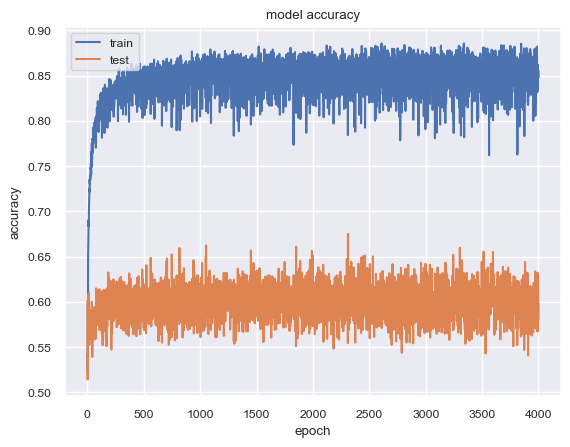

In [230]:
# summarize history for accuracy
plt.plot(ann_ros.history['accuracy'])
plt.plot(ann_ros.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

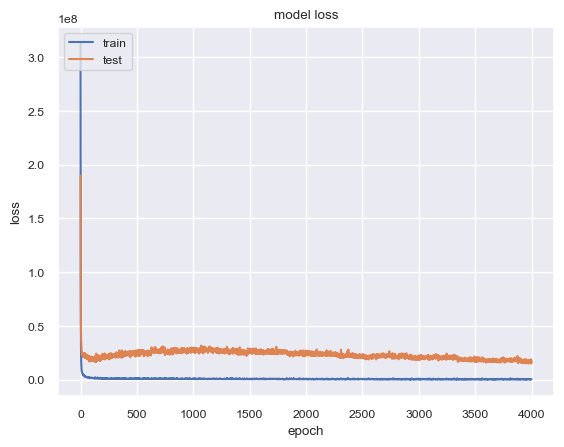

In [229]:
# summarize history for loss
plt.plot(ann_ros.history['loss'])
plt.plot(ann_ros.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

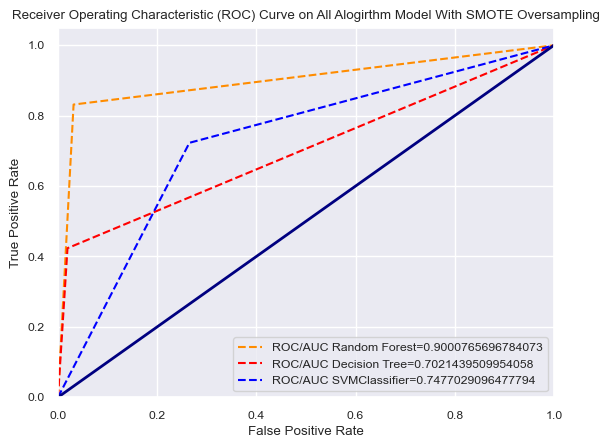

In [201]:
lw = 2

#create ROC curve
plt.plot(fpr_random_forest_sm,tpr_random_forest_sm,label="ROC/AUC Random Forest="+str(auc_random_forest_sm),color="darkorange",linestyle='--')
plt.plot(fpr_decision_tree_sm,tpr_decision_tree_sm,label="ROC/AUC Decision Tree="+str(auc_decision_tree_sm),color="red",linestyle='--')
plt.plot(fpr_svmc,tpr_svmc_sm,label="ROC/AUC SVMClassifier="+str(auc_svmc_sm),color="Blue",linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on All Alogirthm Model With SMOTE Oversampling")
plt.show()